In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/vijay-0107/quantum_ml_classifier.git

Cloning into 'quantum_ml_classifier'...
remote: Enumerating objects: 5651, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 5651 (delta 17), reused 42 (delta 10), pack-reused 5602
Receiving objects: 100% (5651/5651), 77.74 MiB | 7.64 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (5651/5651), done.


In [ ]:
!pip install opencv-python

In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 15.6 MB/s eta 0:00:00


In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 58.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import cv2
import random
import pennylane as qml
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.circuit import Parameter
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pennylane.templates import RandomLayers
from google.colab.patches import cv2_imshow
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split
import torch

In [ ]:
SAVE_PATH_1 = "/content/quantum_ml_classifier/Encoded_data/size_28/"
SAVE_PATH_2 = "/content/drive/MyDrive/BTP/Encoded_data/size_28/"

In [ ]:
# Check if GPU is available, if not, use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')

print(device)


cuda


In [ ]:
train_color_images = np.load(SAVE_PATH_1 + "train_color_images.npy")
test_color_images = np.load(SAVE_PATH_1 + "test_color_images.npy")
train_label = np.load(SAVE_PATH_1 + "train_label.npy")
test_label = np.load(SAVE_PATH_1 + "test_label.npy")

#Calculate_Metrics

In [ ]:
def calculate_classification_metrics(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return f1, precision, recall, accuracy

def calculate_t_score_and_p_value(array1, array2):
    t_stat, p_value = ttest_rel(array1, array2)
    return t_stat, p_value

#BasicNN6

In [ ]:
def MyModel6():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN5

In [ ]:
def MyModel5():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN4

In [ ]:
def MyModel4():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN3

In [ ]:
def MyModel3():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN2

In [ ]:
def MyModel2():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN1

In [ ]:
def MyModel1():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN

In [ ]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#CNN

In [ ]:
# Define your CNN model function
def MyCNNModel():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#ResNET 50

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def MyResNet50Model(input_shape=(224, 224, 3), num_classes=1000):
    # Load ResNet50 architecture with pre-trained weights from ImageNet
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze the pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification head
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    # Combine the base model with custom classification head
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model


#SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def MySVMModel():
    """Initializes and returns a custom SVM model."""
    # Create an SVM classifier with a linear kernel
    svm_classifier = SVC(kernel='linear', probability=True)

    # Create a pipeline with scaling and the SVM classifier
    model = make_pipeline(StandardScaler(), svm_classifier)

    return model


#Comparision Graph

In [ ]:
def plot_comparison(q_history, c_history):
    plt.style.use("seaborn")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))

    ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
    ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
    ax1.set_ylabel("Accuracy")
    ax1.set_ylim([0, 1])
    ax1.set_xlabel("Epoch")
    ax1.legend()

    ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
    ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
    ax2.set_ylabel("Loss")
    ax2.set_ylim(top=2.5)
    ax2.set_xlabel("Epoch")
    ax2.legend()
    plt.tight_layout()
    plt.show()

#Classic


##Basic_NN6

In [ ]:
c_model_NN6 = MyModel6()

n_epochs = 75

c_history_NN6 = c_model_NN6.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 7s - loss: 1.2822 - accuracy: 0.3708 - val_loss: 0.9460 - val_accuracy: 0.4220 - 7s/epoch - 12ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9356 - accuracy: 0.5192 - val_loss: 0.7435 - val_accuracy: 0.5560 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.8002 - accuracy: 0.5624 - val_loss: 0.7150 - val_accuracy: 0.6660 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 3s - loss: 0.7704 - accuracy: 0.5916 - val_loss: 0.7898 - val_accuracy: 0.4820 - 3s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.7507 - accuracy: 0.6092 - val_loss: 0.5852 - val_accuracy: 0.6900 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6921 - accuracy: 0.6408 - val_loss: 0.5778 - val_accuracy: 0.6800 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.7311 - accuracy: 0.6004 - val_loss: 0.5871 - val_accuracy: 0.6720 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.7029 - accuracy: 0.6116 - val_loss: 0.8095 - val_accuracy: 0.5080 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 3s

In [ ]:
c_y_pred_NN6 = np.argmax(c_model_NN6.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN6, c_precision_NN6, c_recall_NN6, c_accuracy_NN6 = calculate_classification_metrics(test_label, c_y_pred_NN6)
print("F1 Score:", c_f1_NN6)
print("Precision:", c_precision_NN6)
print("Recall:", c_recall_NN6)
print("Accuracy:", c_accuracy_NN6)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.5832692683753029
Precision: 0.6991329505582137
Recall: 0.658
Accuracy: 0.658


##Basic_NN5

In [ ]:
c_model_NN5 = MyModel5()

n_epochs = 75

c_history_NN5 = c_model_NN5.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.3585 - accuracy: 0.3308 - val_loss: 1.1348 - val_accuracy: 0.3640 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 3s - loss: 1.1518 - accuracy: 0.4700 - val_loss: 0.9429 - val_accuracy: 0.6740 - 3s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 1.0163 - accuracy: 0.4964 - val_loss: 0.7921 - val_accuracy: 0.6640 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.9398 - accuracy: 0.5360 - val_loss: 0.7414 - val_accuracy: 0.6760 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.9499 - accuracy: 0.5440 - val_loss: 0.7199 - val_accuracy: 0.6600 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.9377 - accuracy: 0.5500 - val_loss: 0.7125 - val_accuracy: 0.6780 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.9224 - accuracy: 0.5576 - val_loss: 0.7135 - val_accuracy: 0.6620 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.9490 - accuracy: 0.5552 - val_loss: 0.6835 - val_accuracy: 0.6820 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_NN5 = np.argmax(c_model_NN5.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN5, c_precision_NN5, c_recall_NN5, c_accuracy_NN5 = calculate_classification_metrics(test_label, c_y_pred_NN5)
print("F1 Score:", c_f1_NN5)
print("Precision:", c_precision_NN5)
print("Recall:", c_recall_NN5)
print("Accuracy:", c_accuracy_NN5)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.5090704586663599
Precision: 0.497924140699117
Recall: 0.62
Accuracy: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Basic_NN4

In [ ]:
c_model_NN4 = MyModel4()

n_epochs = 75

c_history_NN4 = c_model_NN4.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 7s - loss: 1.1780 - accuracy: 0.3984 - val_loss: 0.7898 - val_accuracy: 0.4380 - 7s/epoch - 11ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9296 - accuracy: 0.4496 - val_loss: 0.7510 - val_accuracy: 0.5260 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.8658 - accuracy: 0.4980 - val_loss: 0.6855 - val_accuracy: 0.6780 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8430 - accuracy: 0.5448 - val_loss: 0.6619 - val_accuracy: 0.6720 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8431 - accuracy: 0.5520 - val_loss: 0.6341 - val_accuracy: 0.7960 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8120 - accuracy: 0.5760 - val_loss: 0.6050 - val_accuracy: 0.6840 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.7851 - accuracy: 0.5872 - val_loss: 0.6013 - val_accuracy: 0.6700 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.7832 - accuracy: 0.5888 - val_loss: 0.6420 - val_accuracy: 0.6340 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s

In [ ]:
c_y_pred_NN4 = np.argmax(c_model_NN4.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN4, c_precision_NN4, c_recall_NN4, c_accuracy_NN4 = calculate_classification_metrics(test_label, c_y_pred_NN4)
print("F1 Score:", c_f1_NN4)
print("Precision:", c_precision_NN4)
print("Recall:", c_recall_NN4)
print("Accuracy:", c_accuracy_NN4)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.7318378439716312
Precision: 0.8384689137607556
Recall: 0.762
Accuracy: 0.762


##Basic_NN3

In [ ]:
c_model_NN3 = MyModel3()

n_epochs = 75

c_history_NN3 = c_model_NN3.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.3917 - accuracy: 0.2492 - val_loss: 1.3746 - val_accuracy: 0.2820 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 1.3835 - accuracy: 0.2568 - val_loss: 1.3705 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.3832 - accuracy: 0.2640 - val_loss: 1.3689 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2588 - val_loss: 1.3675 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2540 - val_loss: 1.3671 - val_accuracy: 0.2820 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3830 - accuracy: 0.2488 - val_loss: 1.3660 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3830 - accuracy: 0.2640 - val_loss: 1.3667 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2528 - val_loss: 1.3669 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_NN3 = np.argmax(c_model_NN3.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN3, c_precision_NN3, c_recall_NN3, c_accuracy_NN3 = calculate_classification_metrics(test_label, c_y_pred_NN3)
print("F1 Score:", c_f1_NN3)
print("Precision:", c_precision_NN3)
print("Recall:", c_recall_NN3)
print("Accuracy:", c_accuracy_NN3)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Basic_NN2

In [ ]:
c_model_NN2 = MyModel2()

n_epochs = 75

c_history_NN2 = c_model_NN2.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.3907 - accuracy: 0.2364 - val_loss: 1.3760 - val_accuracy: 0.2820 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 1.3836 - accuracy: 0.2584 - val_loss: 1.3710 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.3832 - accuracy: 0.2620 - val_loss: 1.3688 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2508 - val_loss: 1.3681 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2620 - val_loss: 1.3671 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2580 - val_loss: 1.3670 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2640 - val_loss: 1.3669 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2624 - val_loss: 1.3666 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_NN2 = np.argmax(c_model_NN2.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN2, c_precision_NN2, c_recall_NN2, c_accuracy_NN2 = calculate_classification_metrics(test_label, c_y_pred_NN2)
print("F1 Score:", c_f1_NN2)
print("Precision:", c_precision_NN2)
print("Recall:", c_recall_NN2)
print("Accuracy:", c_accuracy_NN2)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.13520987654320987
Precision: 0.087616
Recall: 0.296
Accuracy: 0.296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Basic_NN1

In [ ]:
c_model_NN1 = MyModel1()

n_epochs = 75

c_history_NN1 = c_model_NN1.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 1.1010 - accuracy: 0.4228 - val_loss: 0.9971 - val_accuracy: 0.4160 - 2s/epoch - 4ms/step
Epoch 2/75
625/625 - 1s - loss: 0.9940 - accuracy: 0.4848 - val_loss: 0.9185 - val_accuracy: 0.6600 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 1s - loss: 0.9605 - accuracy: 0.5284 - val_loss: 0.8446 - val_accuracy: 0.6580 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 0.9144 - accuracy: 0.5756 - val_loss: 0.8269 - val_accuracy: 0.6460 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 2s - loss: 0.9097 - accuracy: 0.5752 - val_loss: 0.7696 - val_accuracy: 0.6760 - 2s/epoch - 2ms/step
Epoch 6/75
625/625 - 2s - loss: 0.9162 - accuracy: 0.5864 - val_loss: 0.7493 - val_accuracy: 0.6660 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 1s - loss: 0.8912 - accuracy: 0.5872 - val_loss: 0.7402 - val_accuracy: 0.6800 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 1s - loss: 0.8947 - accuracy: 0.5868 - val_loss: 0.8251 - val_accuracy: 0.6480 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
c_y_pred_NN1 = np.argmax(c_model_NN1.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN1, c_precision_NN1, c_recall_NN1, c_accuracy_NN1 = calculate_classification_metrics(test_label, c_y_pred_NN1)
print("F1 Score:", c_f1_NN1)
print("Precision:", c_precision_NN1)
print("Recall:", c_recall_NN1)
print("Accuracy:", c_accuracy_NN1)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.6028231989166376
Precision: 0.8308286810551558
Recall: 0.688
Accuracy: 0.688


##Basic_NN

In [ ]:
c_model_NN = MyModel()

n_epochs = 75

c_history_NN = c_model_NN.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 0.7520 - accuracy: 0.6104 - val_loss: 0.5736 - val_accuracy: 0.6620 - 2s/epoch - 3ms/step
Epoch 2/75
625/625 - 1s - loss: 0.6387 - accuracy: 0.6744 - val_loss: 0.5799 - val_accuracy: 0.7480 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 1s - loss: 0.5689 - accuracy: 0.7020 - val_loss: 0.5819 - val_accuracy: 0.6520 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 0.5787 - accuracy: 0.7116 - val_loss: 0.6755 - val_accuracy: 0.6840 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 0.5437 - accuracy: 0.7288 - val_loss: 0.4900 - val_accuracy: 0.7120 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 2s - loss: 0.5615 - accuracy: 0.7272 - val_loss: 0.4760 - val_accuracy: 0.7900 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 1s - loss: 0.5446 - accuracy: 0.7204 - val_loss: 0.5533 - val_accuracy: 0.7540 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 1s - loss: 0.5228 - accuracy: 0.7472 - val_loss: 0.4838 - val_accuracy: 0.7840 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
c_y_pred_NN = np.argmax(c_model_NN.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN, c_precision_NN, c_recall_NN, c_accuracy_NN = calculate_classification_metrics(test_label, c_y_pred_NN)
print("F1 Score:", c_f1_NN)
print("Precision:", c_precision_NN)
print("Recall:", c_recall_NN)
print("Accuracy:", c_accuracy_NN)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.8008319978116739
Precision: 0.8100209258272965
Recall: 0.802
Accuracy: 0.802


##CNN

In [ ]:
c_model_CNN = MyCNNModel()

n_epochs = 75

c_history_CNN = c_model_CNN.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 5s - loss: 0.6723 - accuracy: 0.6464 - val_loss: 0.4684 - val_accuracy: 0.7420 - 5s/epoch - 8ms/step
Epoch 2/75
625/625 - 2s - loss: 0.5435 - accuracy: 0.7056 - val_loss: 0.4782 - val_accuracy: 0.7340 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.5046 - accuracy: 0.7456 - val_loss: 0.4351 - val_accuracy: 0.8060 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 3s - loss: 0.4296 - accuracy: 0.8144 - val_loss: 0.4162 - val_accuracy: 0.8220 - 3s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.4005 - accuracy: 0.8272 - val_loss: 0.3895 - val_accuracy: 0.8220 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.3754 - accuracy: 0.8288 - val_loss: 0.2891 - val_accuracy: 0.8800 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.3481 - accuracy: 0.8568 - val_loss: 0.2919 - val_accuracy: 0.8900 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.3184 - accuracy: 0.8636 - val_loss: 0.2734 - val_accuracy: 0.8760 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_CNN = np.argmax(c_model_CNN.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 10ms/step


In [ ]:
# Calculate classification metrics
c_f1_CNN, c_precision_CNN, c_recall_CNN, c_accuracy_CNN = calculate_classification_metrics(test_label, c_y_pred_CNN)
print("F1 Score:", c_f1_CNN)
print("Precision:", c_precision_CNN)
print("Recall:", c_recall_CNN)
print("Accuracy:", c_accuracy_CNN)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.9452363545712658
Precision: 0.9472435214211077
Recall: 0.946
Accuracy: 0.946


##SVM

In [ ]:
# Reshape the input data to flatten the color channels
train_color_images_flattened = train_color_images.reshape(train_color_images.shape[0], -1)
test_color_images_flattened = test_color_images.reshape(test_color_images.shape[0], -1)

In [ ]:
c_svm_model = MySVMModel()

n_epochs = 75

c_svm_history = c_svm_model.fit(
    train_color_images_flattened,
    train_label
)

In [ ]:
c_y_pred_SVM = c_svm_model.predict(test_color_images_flattened)

In [ ]:
# Calculate classification metrics
c_f1_SVM, c_precision_SVM, c_recall_SVM, c_accuracy_SVM = calculate_classification_metrics(test_label, c_y_pred_SVM)
print("F1 Score:", c_f1_SVM)
print("Precision:", c_precision_SVM)
print("Recall:", c_recall_SVM)
print("Accuracy:", c_accuracy_SVM)

F1 Score: 0.7670459201497565
Precision: 0.791243446471342
Recall: 0.77
Accuracy: 0.77


#Angle_Encoded



##Basic_NN6



###Quantum

In [ ]:
q_train_color_images_angle = np.load(SAVE_PATH_1 + "q_train_color_images_angle.npy")
q_test_color_images_angle = np.load(SAVE_PATH_1 + "q_test_color_images_angle.npy")
q_train_label_angle = np.load(SAVE_PATH_1 + "q_train_label_angle.npy")
q_test_label_angle = np.load(SAVE_PATH_1 + "q_test_label_angle.npy")

In [ ]:
q_model_NN6_ang = MyModel6()

n_epochs = 75

q_history_NN6_ang = q_model_NN6_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.0527 - accuracy: 0.4628 - val_loss: 0.7065 - val_accuracy: 0.5480 - 4s/epoch - 7ms/step
Epoch 2/75
625/625 - 2s - loss: 0.8192 - accuracy: 0.6068 - val_loss: 0.5063 - val_accuracy: 0.7380 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 3s - loss: 0.6896 - accuracy: 0.6676 - val_loss: 0.5169 - val_accuracy: 0.7220 - 3s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6615 - accuracy: 0.6872 - val_loss: 0.5570 - val_accuracy: 0.6020 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.5980 - accuracy: 0.7012 - val_loss: 0.4533 - val_accuracy: 0.7440 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.5840 - accuracy: 0.7156 - val_loss: 0.4421 - val_accuracy: 0.7580 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5973 - accuracy: 0.7292 - val_loss: 0.4320 - val_accuracy: 0.7400 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 3s - loss: 0.5659 - accuracy: 0.7216 - val_loss: 0.4350 - val_accuracy: 0.8100 - 3s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN6_ang = np.argmax(q_model_NN6_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN6, q_precision_ang_NN6, q_recall_ang_NN6, q_accuracy_ang_NN6 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN6_ang)
print("F1 Score:", q_f1_ang_NN6)
print("Precision:", q_precision_ang_NN6)
print("Recall:", q_recall_ang_NN6)
print("Accuracy:", q_accuracy_ang_NN6)

F1 Score: 0.8508450921867694
Precision: 0.880056119075002
Recall: 0.854
Accuracy: 0.854


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


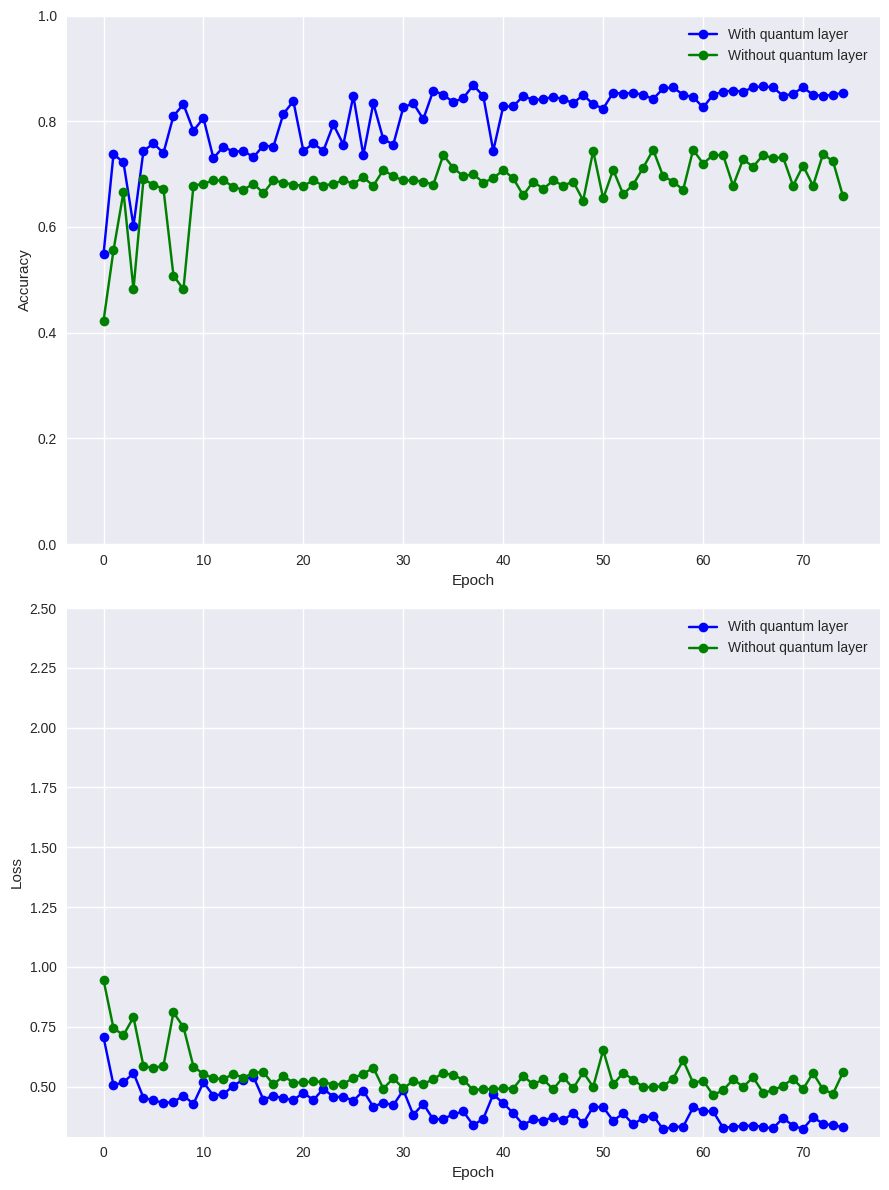

In [ ]:
plot_comparison(q_history_NN6_ang, c_history_NN6)

##Basic_NN5



###Quantum

In [ ]:
q_model_NN5_ang = MyModel5()

n_epochs = 75

q_history_NN5_ang = q_model_NN5_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.1823 - accuracy: 0.4652 - val_loss: 0.7856 - val_accuracy: 0.6440 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.8698 - accuracy: 0.5924 - val_loss: 0.5454 - val_accuracy: 0.7580 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.7674 - accuracy: 0.6376 - val_loss: 0.5263 - val_accuracy: 0.7360 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.7026 - accuracy: 0.6668 - val_loss: 0.4942 - val_accuracy: 0.7340 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6578 - accuracy: 0.6936 - val_loss: 0.4946 - val_accuracy: 0.8320 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6075 - accuracy: 0.7100 - val_loss: 0.3994 - val_accuracy: 0.8120 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5714 - accuracy: 0.7544 - val_loss: 0.4016 - val_accuracy: 0.8600 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5648 - accuracy: 0.7660 - val_loss: 0.4873 - val_accuracy: 0.7320 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN5_ang = np.argmax(q_model_NN5_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN5, q_precision_ang_NN5, q_recall_ang_NN5, q_accuracy_ang_NN5 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN5_ang)
print("F1 Score:", q_f1_ang_NN5)
print("Precision:", q_precision_ang_NN5)
print("Recall:", q_recall_ang_NN5)
print("Accuracy:", q_accuracy_ang_NN5)

F1 Score: 0.8718135405924466
Precision: 0.8788425532424919
Recall: 0.872
Accuracy: 0.872


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


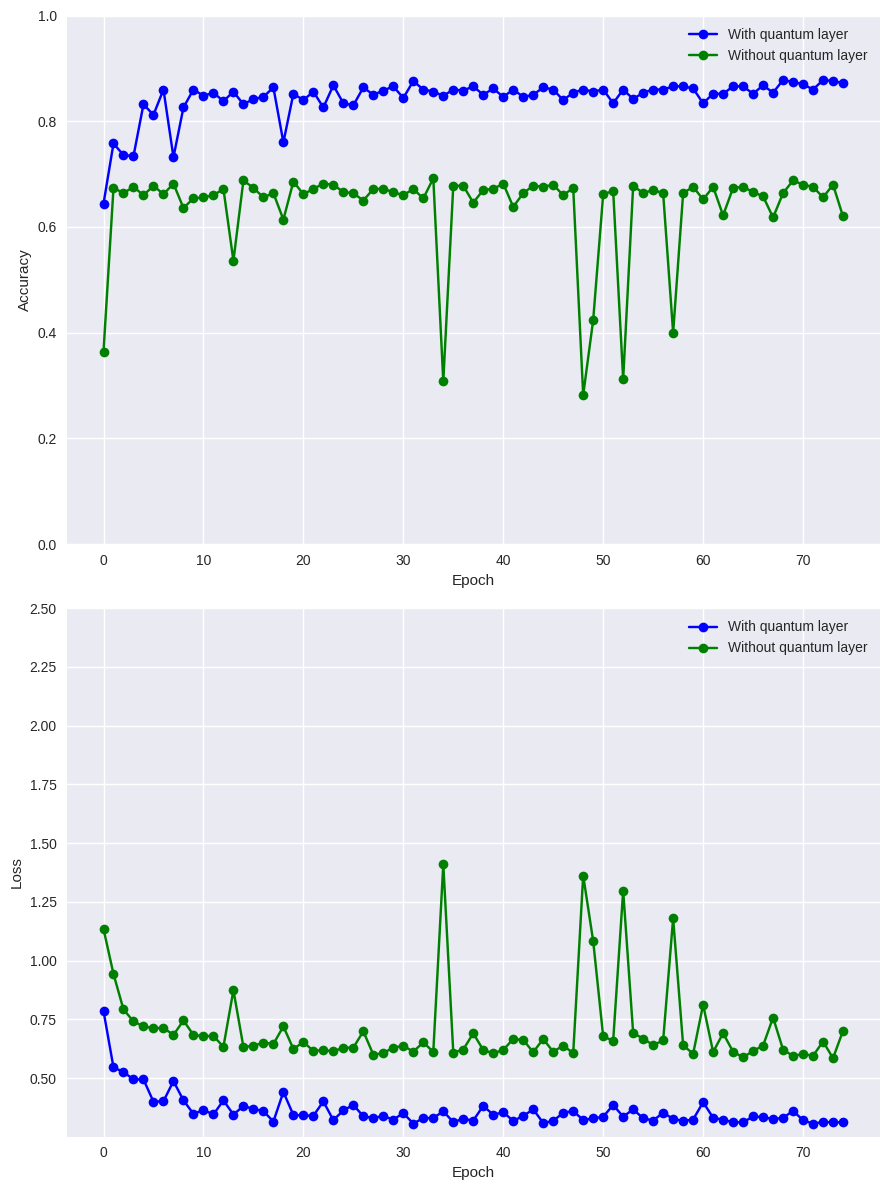

In [ ]:
plot_comparison(q_history_NN5_ang, c_history_NN5)

##Basic_NN4



###Quantum

In [ ]:
q_model_NN4_ang = MyModel4()

n_epochs = 75

q_history_NN4_ang = q_model_NN4_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 7s - loss: 1.0293 - accuracy: 0.5128 - val_loss: 0.7900 - val_accuracy: 0.5120 - 7s/epoch - 11ms/step
Epoch 2/75
625/625 - 4s - loss: 0.8411 - accuracy: 0.5772 - val_loss: 0.6146 - val_accuracy: 0.6740 - 4s/epoch - 6ms/step
Epoch 3/75
625/625 - 3s - loss: 0.7216 - accuracy: 0.6488 - val_loss: 0.4858 - val_accuracy: 0.7540 - 3s/epoch - 5ms/step
Epoch 4/75
625/625 - 3s - loss: 0.6944 - accuracy: 0.6656 - val_loss: 0.5603 - val_accuracy: 0.6980 - 3s/epoch - 5ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6389 - accuracy: 0.6888 - val_loss: 0.4854 - val_accuracy: 0.7280 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6193 - accuracy: 0.6996 - val_loss: 0.4506 - val_accuracy: 0.7520 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6069 - accuracy: 0.7012 - val_loss: 0.4575 - val_accuracy: 0.7580 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5825 - accuracy: 0.7084 - val_loss: 0.4750 - val_accuracy: 0.7360 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s

In [ ]:
q_y_pred_NN4_ang = np.argmax(q_model_NN4_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 5ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN4, q_precision_ang_NN4, q_recall_ang_NN4, q_accuracy_ang_NN4 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN4_ang)
print("F1 Score:", q_f1_ang_NN4)
print("Precision:", q_precision_ang_NN4)
print("Recall:", q_recall_ang_NN4)
print("Accuracy:", q_accuracy_ang_NN4)

F1 Score: 0.855150527820269
Precision: 0.8817874063092003
Recall: 0.858
Accuracy: 0.858


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


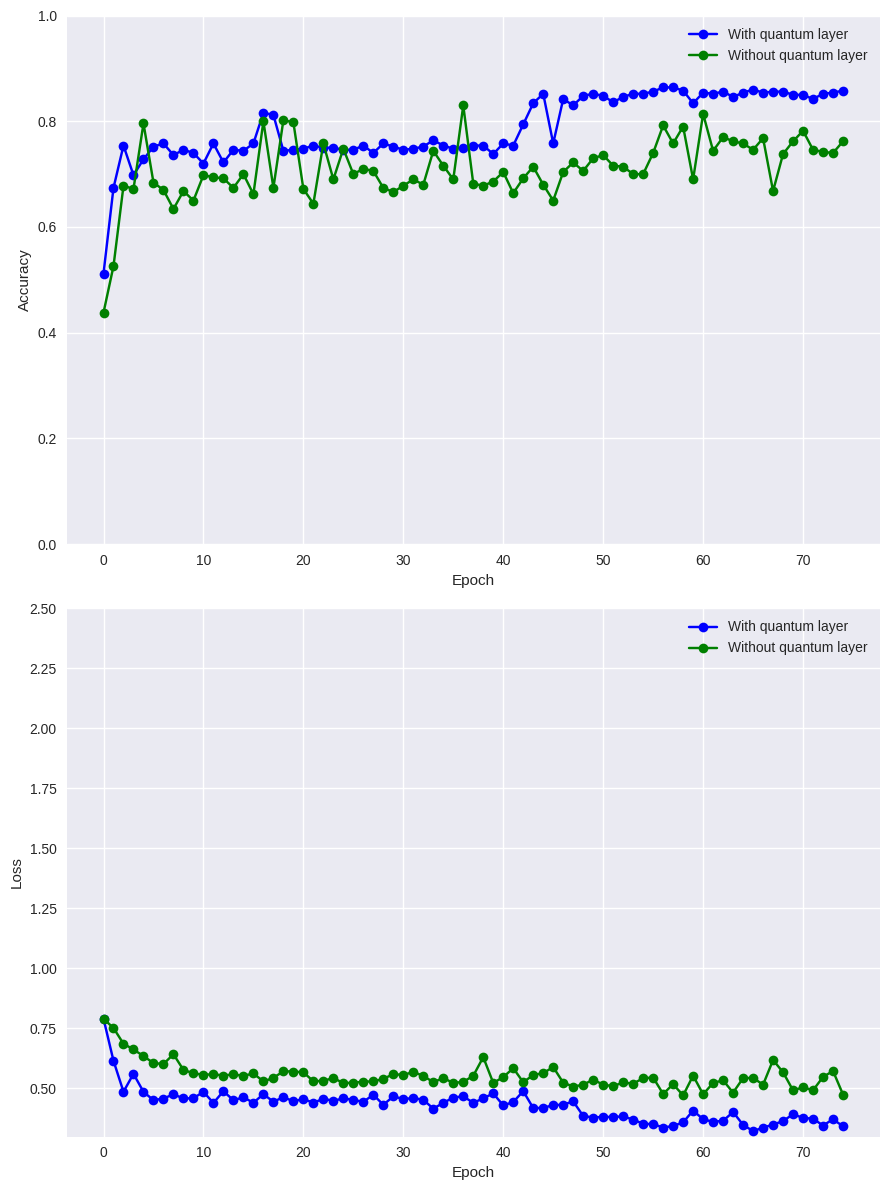

In [ ]:
plot_comparison(q_history_NN4_ang, c_history_NN4)

##Basic_NN3



###Quantum

In [ ]:
q_model_NN3_ang = MyModel3()

n_epochs = 75

q_history_NN3_ang = q_model_NN3_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 0.9242 - accuracy: 0.5204 - val_loss: 0.6169 - val_accuracy: 0.7440 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7285 - accuracy: 0.6408 - val_loss: 0.4281 - val_accuracy: 0.8420 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.6730 - accuracy: 0.6896 - val_loss: 0.4138 - val_accuracy: 0.8320 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6164 - accuracy: 0.7140 - val_loss: 0.4149 - val_accuracy: 0.8280 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6023 - accuracy: 0.7508 - val_loss: 0.3745 - val_accuracy: 0.8440 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.5844 - accuracy: 0.7440 - val_loss: 0.3733 - val_accuracy: 0.8460 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5575 - accuracy: 0.7644 - val_loss: 0.3733 - val_accuracy: 0.8440 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5429 - accuracy: 0.7804 - val_loss: 0.3691 - val_accuracy: 0.8600 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN3_ang = np.argmax(q_model_NN3_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN3, q_precision_ang_NN3, q_recall_ang_NN3, q_accuracy_ang_NN3 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN3_ang)
print("F1 Score:", q_f1_ang_NN3)
print("Precision:", q_precision_ang_NN3)
print("Recall:", q_recall_ang_NN3)
print("Accuracy:", q_accuracy_ang_NN3)

F1 Score: 0.8573285268756712
Precision: 0.8803815184815185
Recall: 0.86
Accuracy: 0.86


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


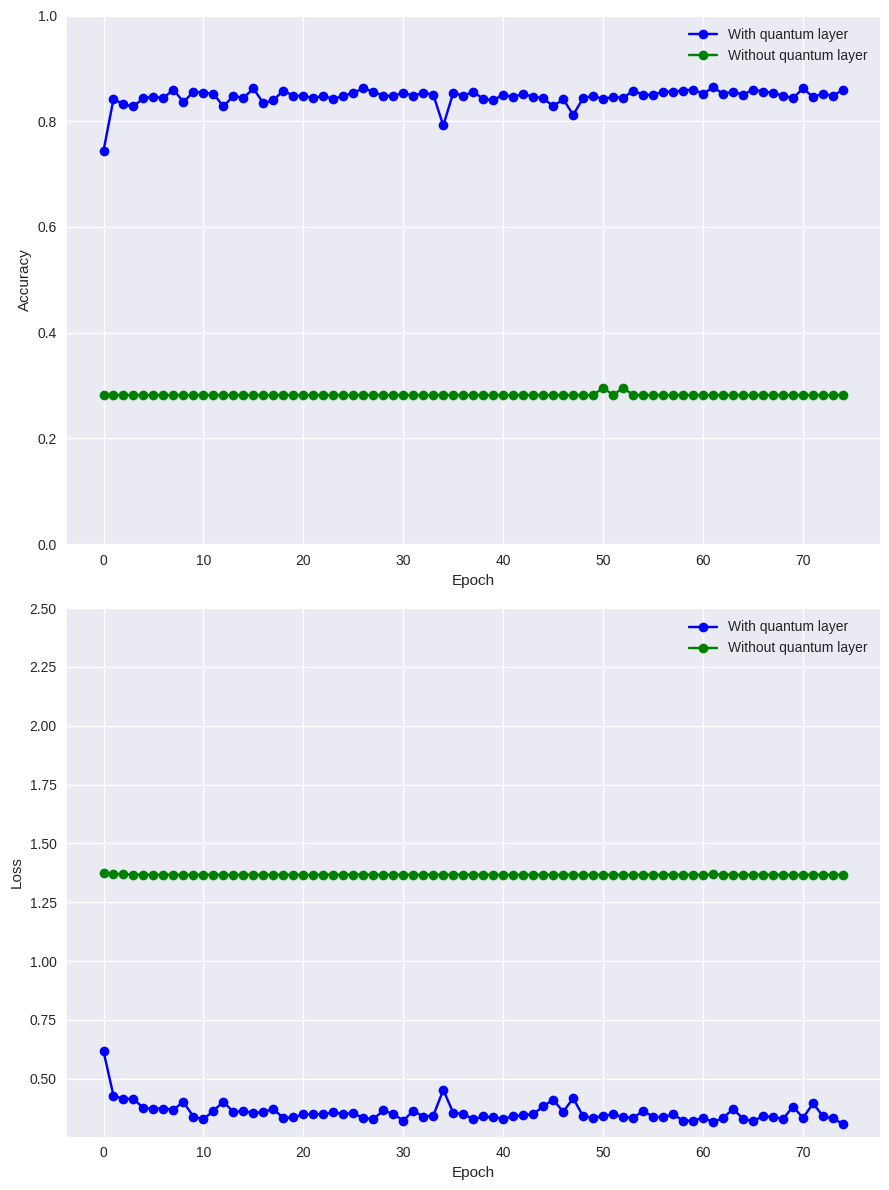

In [ ]:
plot_comparison(q_history_NN3_ang, c_history_NN3)

##Basic_NN2



###Quantum

In [ ]:
q_model_NN2_ang = MyModel2()

n_epochs = 75

q_history_NN2_ang = q_model_NN2_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 0.8988 - accuracy: 0.5528 - val_loss: 0.5211 - val_accuracy: 0.7400 - 3s/epoch - 4ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7350 - accuracy: 0.6488 - val_loss: 0.4853 - val_accuracy: 0.7720 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.7070 - accuracy: 0.6564 - val_loss: 0.5296 - val_accuracy: 0.7260 - 2s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6738 - accuracy: 0.6772 - val_loss: 0.4741 - val_accuracy: 0.7520 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6646 - accuracy: 0.6632 - val_loss: 0.4815 - val_accuracy: 0.7500 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6369 - accuracy: 0.6848 - val_loss: 0.4896 - val_accuracy: 0.7400 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6173 - accuracy: 0.7020 - val_loss: 0.4563 - val_accuracy: 0.7960 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.6221 - accuracy: 0.6980 - val_loss: 0.4572 - val_accuracy: 0.8120 - 2s/epoch - 2ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN2_ang = np.argmax(q_model_NN2_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN2, q_precision_ang_NN2, q_recall_ang_NN2, q_accuracy_ang_NN2 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN2_ang)
print("F1 Score:", q_f1_ang_NN2)
print("Precision:", q_precision_ang_NN2)
print("Recall:", q_recall_ang_NN2)
print("Accuracy:", q_accuracy_ang_NN2)

F1 Score: 0.8471147467289695
Precision: 0.8710625035668693
Recall: 0.85
Accuracy: 0.85


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


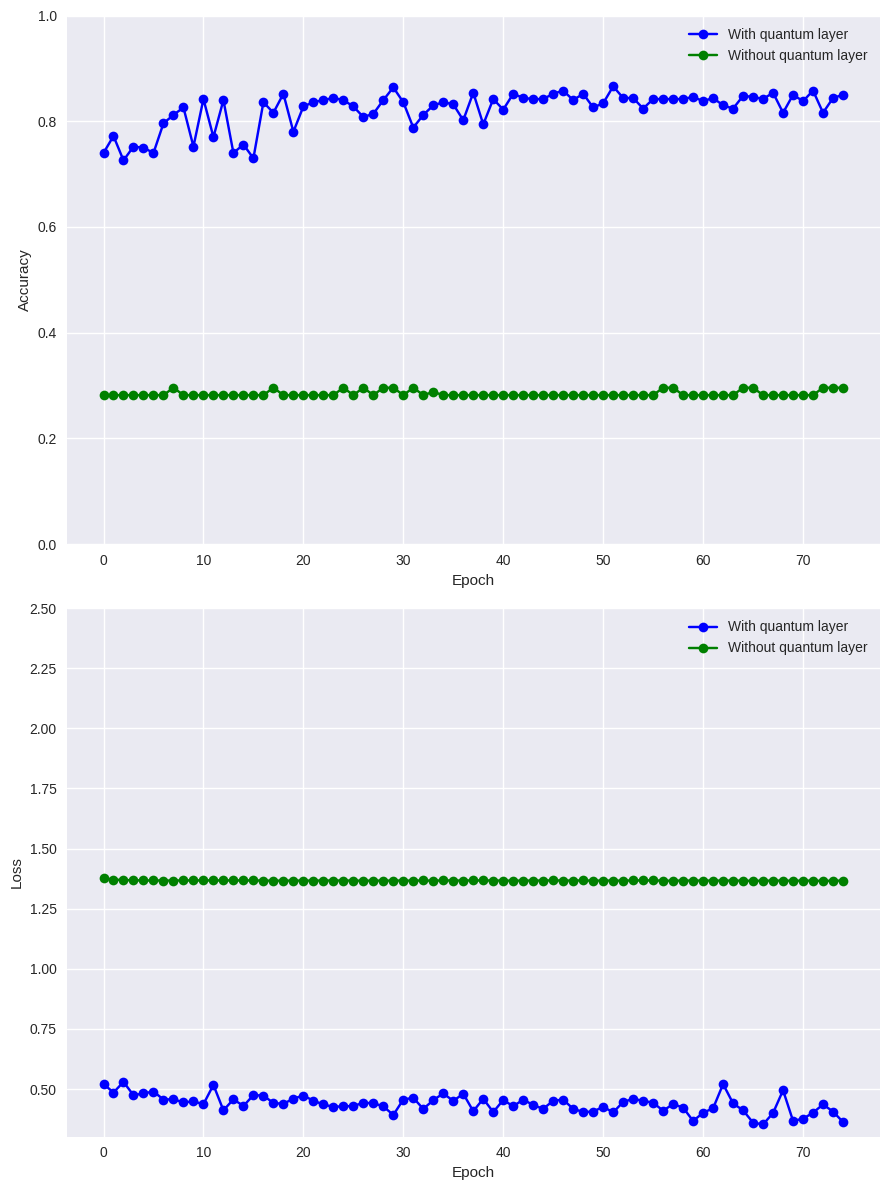

In [ ]:
plot_comparison(q_history_NN2_ang, c_history_NN2)

##Basic_NN1



###Quantum

In [ ]:
q_model_NN1_ang = MyModel1()

n_epochs = 75

q_history_NN1_ang = q_model_NN1_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.0976 - accuracy: 0.5508 - val_loss: 0.7519 - val_accuracy: 0.7520 - 3s/epoch - 4ms/step
Epoch 2/75
625/625 - 2s - loss: 0.8835 - accuracy: 0.6572 - val_loss: 0.6642 - val_accuracy: 0.7980 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 1s - loss: 0.8478 - accuracy: 0.6624 - val_loss: 0.5998 - val_accuracy: 0.7920 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8400 - accuracy: 0.6568 - val_loss: 0.5938 - val_accuracy: 0.7840 - 2s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 0.8030 - accuracy: 0.6780 - val_loss: 0.5790 - val_accuracy: 0.7640 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8159 - accuracy: 0.6736 - val_loss: 0.5729 - val_accuracy: 0.7720 - 2s/epoch - 2ms/step
Epoch 7/75
625/625 - 1s - loss: 0.7933 - accuracy: 0.6772 - val_loss: 0.5666 - val_accuracy: 0.7920 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 2s - loss: 0.8209 - accuracy: 0.6500 - val_loss: 0.5656 - val_accuracy: 0.8100 - 2s/epoch - 2ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN1_ang = np.argmax(q_model_NN1_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN1, q_precision_ang_NN1, q_recall_ang_NN1, q_accuracy_ang_NN1 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN1_ang)
print("F1 Score:", q_f1_ang_NN1)
print("Precision:", q_precision_ang_NN1)
print("Recall:", q_recall_ang_NN1)
print("Accuracy:", q_accuracy_ang_NN1)

F1 Score: 0.8231395341965716
Precision: 0.8285201001723261
Recall: 0.824
Accuracy: 0.824


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


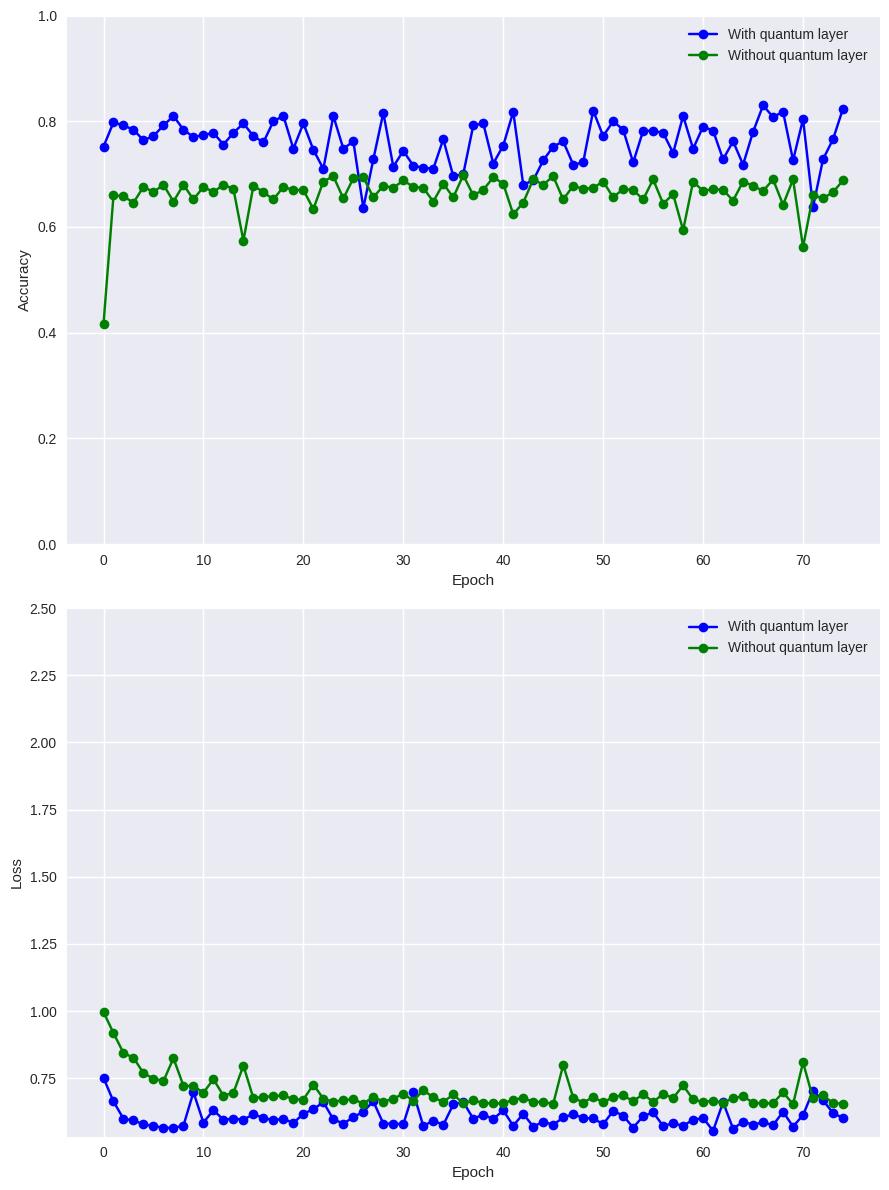

In [ ]:
plot_comparison(q_history_NN1_ang, c_history_NN1)

##Basic_NN



###Quantum

In [ ]:
q_model_NN_ang = MyModel()

n_epochs = 75

q_history_NN_ang = q_model_NN_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 0.7726 - accuracy: 0.6484 - val_loss: 0.6696 - val_accuracy: 0.7320 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7356 - accuracy: 0.6808 - val_loss: 0.6262 - val_accuracy: 0.6680 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 4s - loss: 0.7254 - accuracy: 0.6940 - val_loss: 0.6018 - val_accuracy: 0.7440 - 4s/epoch - 6ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6681 - accuracy: 0.7104 - val_loss: 0.6288 - val_accuracy: 0.6340 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6680 - accuracy: 0.7264 - val_loss: 0.5254 - val_accuracy: 0.7520 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 3s - loss: 0.6783 - accuracy: 0.7080 - val_loss: 0.7162 - val_accuracy: 0.6020 - 3s/epoch - 4ms/step
Epoch 7/75
625/625 - 3s - loss: 0.6256 - accuracy: 0.7356 - val_loss: 0.6017 - val_accuracy: 0.7020 - 3s/epoch - 4ms/step
Epoch 8/75
625/625 - 3s - loss: 0.6117 - accuracy: 0.7360 - val_loss: 0.5129 - val_accuracy: 0.8120 - 3s/epoch - 5ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN_ang = np.argmax(q_model_NN_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN, q_precision_ang_NN, q_recall_ang_NN, q_accuracy_ang_NN = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN_ang)
print("F1 Score:", q_f1_ang_NN)
print("Precision:", q_precision_ang_NN)
print("Recall:", q_recall_ang_NN)
print("Accuracy:", q_accuracy_ang_NN)

F1 Score: 0.7920117966698492
Precision: 0.8022290931171828
Recall: 0.798
Accuracy: 0.798


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


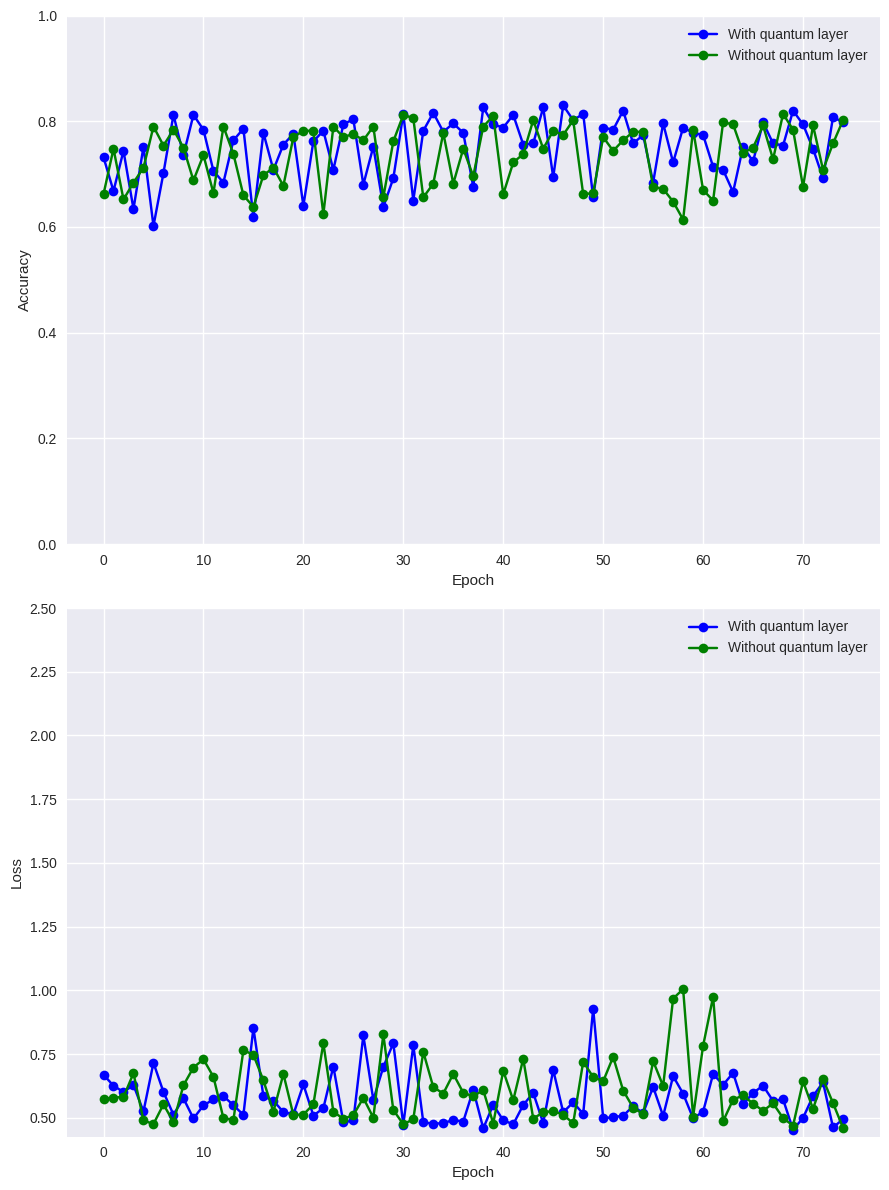

In [ ]:
plot_comparison(q_history_NN_ang, c_history_NN)

##CNN

###Quantum

In [ ]:
q_CNN_model_ang = MyCNNModel()

n_epochs = 75

q_history_CNN_ang = q_CNN_model_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 0.5997 - accuracy: 0.7388 - val_loss: 0.3454 - val_accuracy: 0.8580 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 3s - loss: 0.4079 - accuracy: 0.8384 - val_loss: 0.4346 - val_accuracy: 0.8360 - 3s/epoch - 5ms/step
Epoch 3/75
625/625 - 2s - loss: 0.3763 - accuracy: 0.8584 - val_loss: 0.3057 - val_accuracy: 0.9220 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.3181 - accuracy: 0.8884 - val_loss: 0.3817 - val_accuracy: 0.8620 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.2866 - accuracy: 0.8984 - val_loss: 0.2403 - val_accuracy: 0.9200 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.2664 - accuracy: 0.9124 - val_loss: 0.2177 - val_accuracy: 0.9180 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.2507 - accuracy: 0.9156 - val_loss: 0.2163 - val_accuracy: 0.9260 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.2483 - accuracy: 0.9184 - val_loss: 0.1729 - val_accuracy: 0.9420 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_CNN_ang = np.argmax(q_CNN_model_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
# Calculate classification metrics
q_f1_CNN_ang, q_precision_CNN_ang, q_recall_CNN_ang, q_accuracy_CNN_ang = calculate_classification_metrics(q_test_label_angle, q_y_pred_CNN_ang)
print("F1 Score:", q_f1_CNN_ang)
print("Precision:", q_precision_CNN_ang)
print("Recall:", q_recall_CNN_ang)
print("Accuracy:", q_accuracy_CNN_ang)

F1 Score: 0.9759658259670748
Precision: 0.9760580455259027
Recall: 0.976
Accuracy: 0.976


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


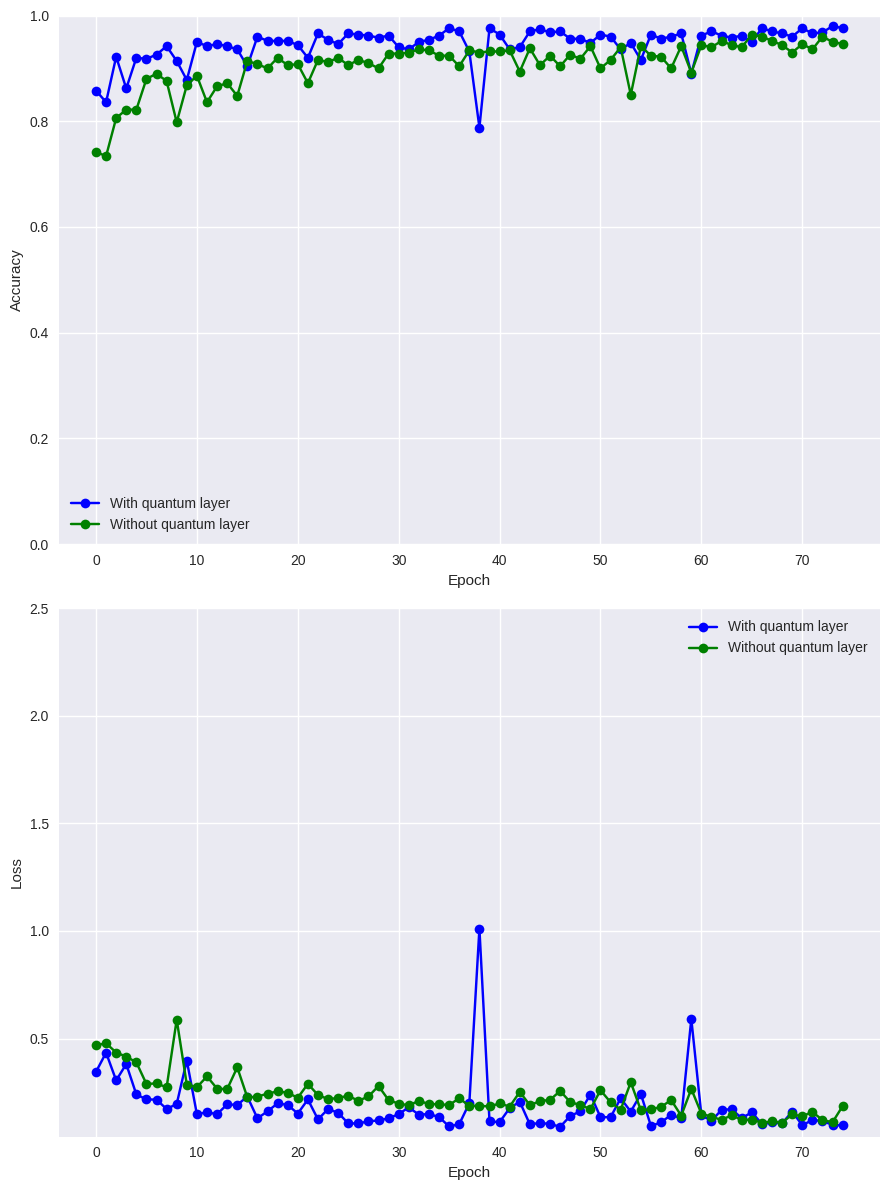

In [ ]:
plot_comparison(q_history_CNN_ang, c_history_CNN)

##SVM

###Quantum

In [ ]:
# Reshape the input data to flatten the color channels
q_train_color_images_angle_flattened = q_train_color_images_angle.reshape(q_train_color_images_angle.shape[0], -1)
q_test_color_images_angle_flattened = q_test_color_images_angle.reshape(q_test_color_images_angle.shape[0], -1)

In [ ]:
q_svm_model_ang = MySVMModel()

n_epochs = 75

q_svm_history_ang = q_svm_model_ang.fit(
    q_train_color_images_angle_flattened,
    q_train_label_angle
)

In [ ]:
q_y_predSVM_ang = q_svm_model_ang.predict(q_test_color_images_angle_flattened)

In [ ]:
# Calculate classification metrics
q_f1_SVM_ang, q_precision_SVM_ang, q_recall_SVM_ang, q_accuracy_SVM_ang = calculate_classification_metrics(q_test_label_angle, q_y_predSVM_ang)
print("F1 Score:", q_f1_SVM_ang)
print("Precision:", q_precision_SVM_ang)
print("Recall:", q_recall_SVM_ang)
print("Accuracy:", q_accuracy_SVM_ang)

F1 Score: 0.7310162165975446
Precision: 0.7565986257148523
Recall: 0.736
Accuracy: 0.736


#Amplitude_Encoded

##Basic_NN6

###Quantum

In [ ]:
q_train_color_images_amp = np.load(SAVE_PATH_1 + "q_train_color_images_amplitude.npy")
q_test_color_images_amp = np.load(SAVE_PATH_1 + "q_test_color_images_amplitude.npy")
q_train_label_amp = np.load(SAVE_PATH_1 + "q_train_label_amplitude.npy")
q_test_label_amp = np.load(SAVE_PATH_1 + "q_test_label_amplitude.npy")

In [ ]:
q_model_NN6_amp = MyModel6()

n_epochs = 75

q_history_NN6_amp = q_model_NN6_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 5s - loss: 1.3701 - accuracy: 0.3188 - val_loss: 1.0516 - val_accuracy: 0.5600 - 5s/epoch - 8ms/step
Epoch 2/75
625/625 - 3s - loss: 1.1548 - accuracy: 0.4628 - val_loss: 0.9805 - val_accuracy: 0.5340 - 3s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 1.0965 - accuracy: 0.4524 - val_loss: 0.9083 - val_accuracy: 0.6280 - 2s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 1.0777 - accuracy: 0.4460 - val_loss: 0.9159 - val_accuracy: 0.5280 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 1.0619 - accuracy: 0.4560 - val_loss: 0.9268 - val_accuracy: 0.5520 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 1.0500 - accuracy: 0.4644 - val_loss: 0.8692 - val_accuracy: 0.5480 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 3s - loss: 1.0596 - accuracy: 0.4468 - val_loss: 0.8520 - val_accuracy: 0.5560 - 3s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 1.0518 - accuracy: 0.4552 - val_loss: 0.8808 - val_accuracy: 0.5980 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN6_amp = np.argmax(q_model_NN6_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN6, q_precision_amp_NN6, q_recall_amp_NN6, q_accuracy_amp_NN6 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN6_amp)
print("F1 Score:", q_f1_amp_NN6)
print("Precision:", q_precision_amp_NN6)
print("Recall:", q_recall_amp_NN6)
print("Accuracy:", q_accuracy_amp_NN6)

F1 Score: 0.368010209551035
Precision: 0.29118687936446924
Recall: 0.5
Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


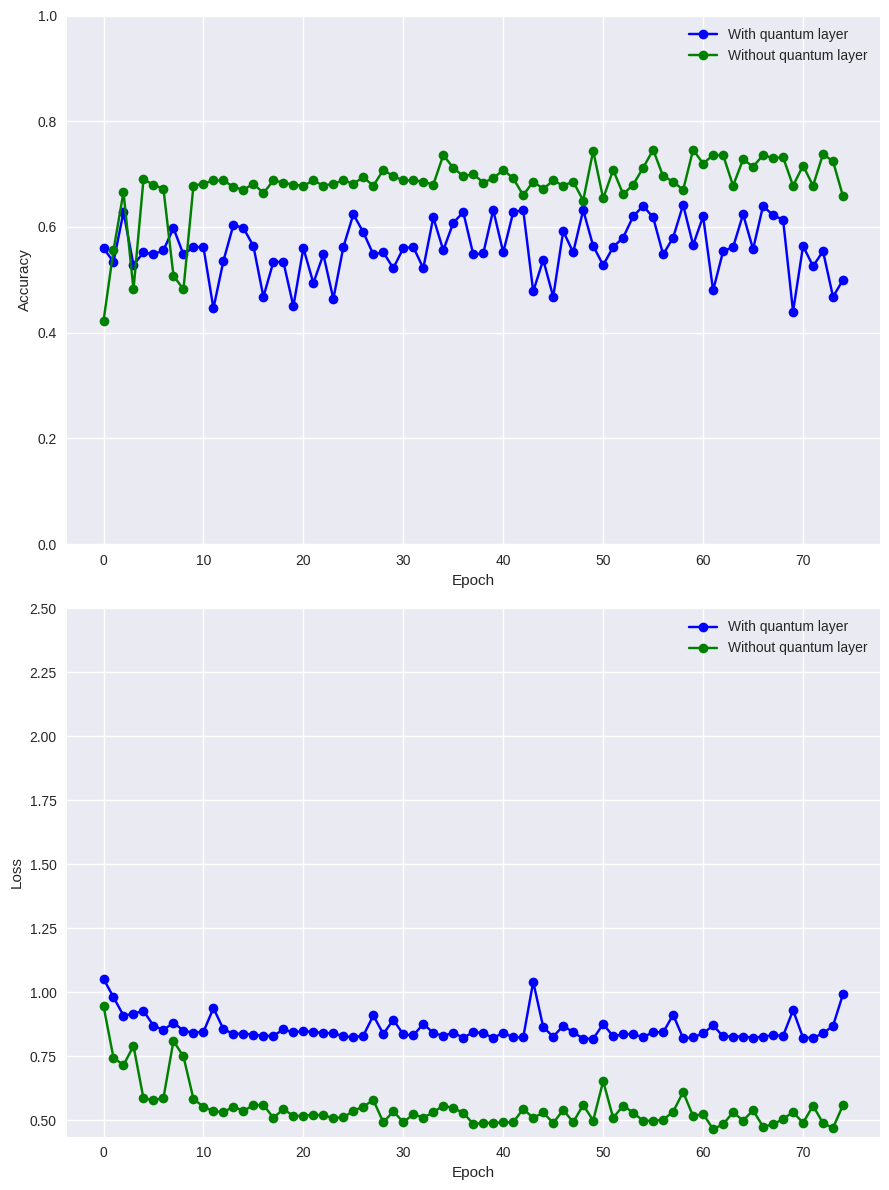

In [ ]:
plot_comparison(q_history_NN6_amp, c_history_NN6)

##Basic_NN5

###Quantum

In [ ]:
q_model_NN5_amp = MyModel5()

n_epochs = 75

q_history_NN5_amp = q_model_NN5_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.2767 - accuracy: 0.3360 - val_loss: 0.8872 - val_accuracy: 0.5540 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9831 - accuracy: 0.4448 - val_loss: 0.8579 - val_accuracy: 0.5320 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.8894 - accuracy: 0.4900 - val_loss: 0.7592 - val_accuracy: 0.5020 - 2s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8865 - accuracy: 0.4832 - val_loss: 0.8053 - val_accuracy: 0.5620 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8549 - accuracy: 0.5164 - val_loss: 0.7422 - val_accuracy: 0.6220 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8383 - accuracy: 0.4868 - val_loss: 0.7596 - val_accuracy: 0.5080 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.8408 - accuracy: 0.5040 - val_loss: 0.7478 - val_accuracy: 0.5660 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.8647 - accuracy: 0.4888 - val_loss: 1.0384 - val_accuracy: 0.5120 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 3s 

In [ ]:
q_y_pred_NN5_amp = np.argmax(q_model_NN5_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 4ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN5, q_precision_amp_NN5, q_recall_amp_NN5, q_accuracy_amp_NN5 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN5_amp)
print("F1 Score:", q_f1_amp_NN5)
print("Precision:", q_precision_amp_NN5)
print("Recall:", q_recall_amp_NN5)
print("Accuracy:", q_accuracy_amp_NN5)

F1 Score: 0.5324846073205663
Precision: 0.5674755538579068
Recall: 0.622
Accuracy: 0.622


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


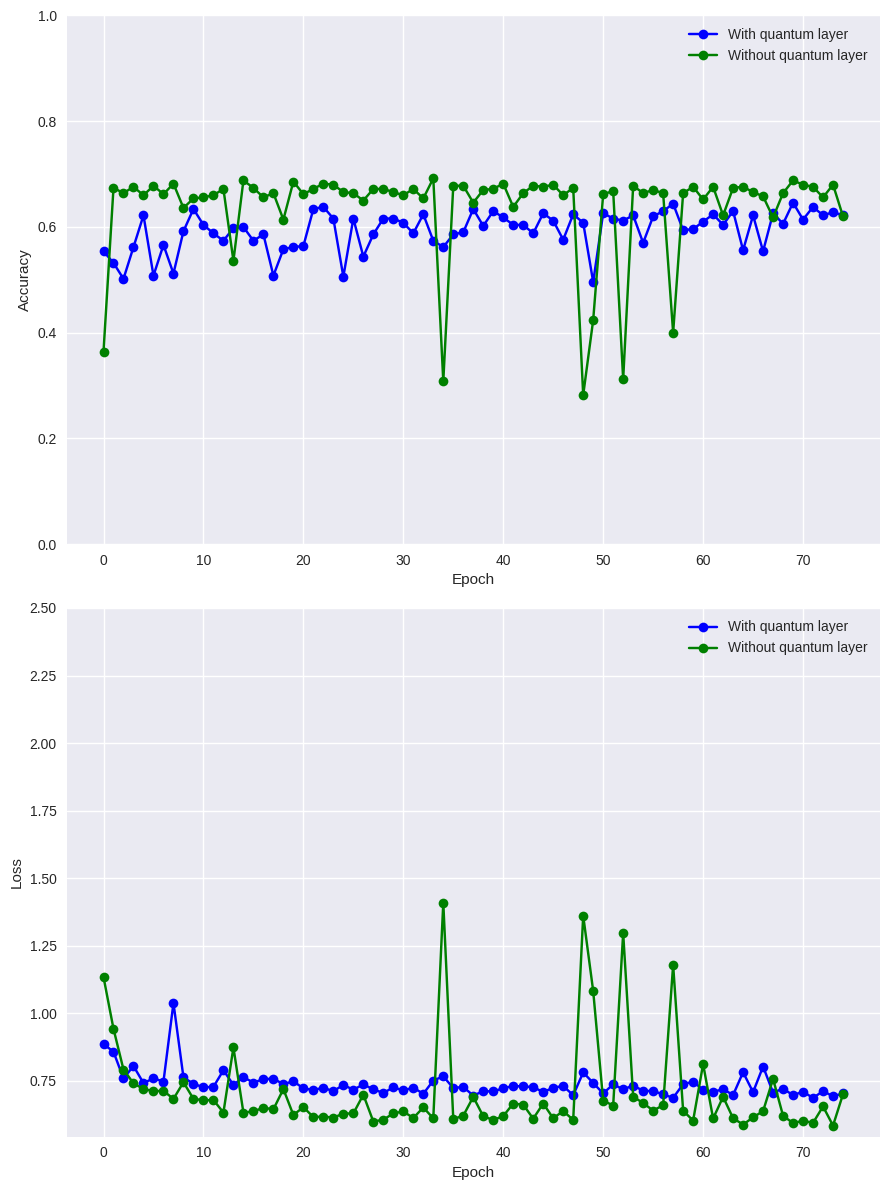

In [ ]:
plot_comparison(q_history_NN5_amp, c_history_NN5)

##Basic_NN4

###Quantum

In [ ]:
q_model_NN4_amp = MyModel4()

n_epochs = 75

q_history_NN4_amp = q_model_NN4_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.2398 - accuracy: 0.3664 - val_loss: 0.8932 - val_accuracy: 0.5320 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9811 - accuracy: 0.4224 - val_loss: 0.7471 - val_accuracy: 0.5660 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.9076 - accuracy: 0.4824 - val_loss: 0.7697 - val_accuracy: 0.5820 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8777 - accuracy: 0.4900 - val_loss: 0.7353 - val_accuracy: 0.6680 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.0268 - accuracy: 0.4412 - val_loss: 0.9385 - val_accuracy: 0.5440 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.0800 - accuracy: 0.4444 - val_loss: 0.8890 - val_accuracy: 0.5320 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.0175 - accuracy: 0.4720 - val_loss: 0.8465 - val_accuracy: 0.5700 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 1.0543 - accuracy: 0.4556 - val_loss: 0.8667 - val_accuracy: 0.5240 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN4_amp = np.argmax(q_model_NN4_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN4, q_precision_amp_NN4, q_recall_amp_NN4, q_accuracy_amp_NN4 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN4_amp)
print("F1 Score:", q_f1_amp_NN4)
print("Precision:", q_precision_amp_NN4)
print("Recall:", q_recall_amp_NN4)
print("Accuracy:", q_accuracy_amp_NN4)

F1 Score: 0.5248136454906849
Precision: 0.5500549820069612
Recall: 0.614
Accuracy: 0.614


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


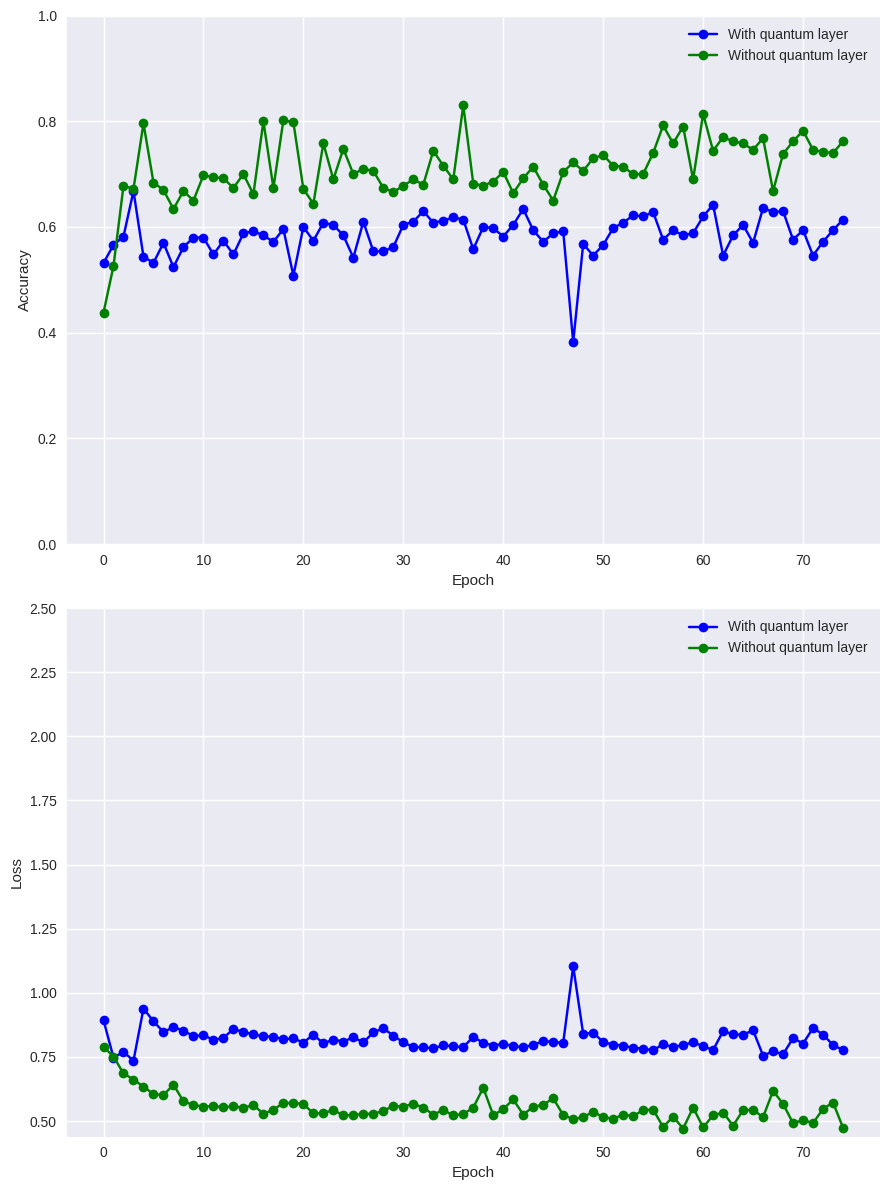

In [ ]:
plot_comparison(q_history_NN4_amp, c_history_NN4)

##Basic_NN3

###Quantum

In [ ]:
q_model_NN3_amp = MyModel3()

n_epochs = 75

q_history_NN3_amp = q_model_NN3_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.1536 - accuracy: 0.3900 - val_loss: 0.8701 - val_accuracy: 0.5940 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 1.0013 - accuracy: 0.4492 - val_loss: 0.7878 - val_accuracy: 0.4080 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.9107 - accuracy: 0.4800 - val_loss: 0.7319 - val_accuracy: 0.6000 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.9049 - accuracy: 0.4872 - val_loss: 0.8736 - val_accuracy: 0.4500 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8923 - accuracy: 0.4764 - val_loss: 0.7400 - val_accuracy: 0.5760 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8605 - accuracy: 0.4912 - val_loss: 0.8043 - val_accuracy: 0.5520 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.8551 - accuracy: 0.5168 - val_loss: 0.7458 - val_accuracy: 0.5980 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 3s - loss: 0.8706 - accuracy: 0.4936 - val_loss: 0.7536 - val_accuracy: 0.6140 - 3s/epoch - 4ms/step
Epoch 9/75
625/625 - 3s 

In [ ]:
q_y_pred_NN3_amp = np.argmax(q_model_NN3_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN3, q_precision_amp_NN3, q_recall_amp_NN3, q_accuracy_amp_NN3 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN3_amp)
print("F1 Score:", q_f1_amp_NN3)
print("Precision:", q_precision_amp_NN3)
print("Recall:", q_recall_amp_NN3)
print("Accuracy:", q_accuracy_amp_NN3)

F1 Score: 0.5076799660227894
Precision: 0.587451520262807
Recall: 0.61
Accuracy: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


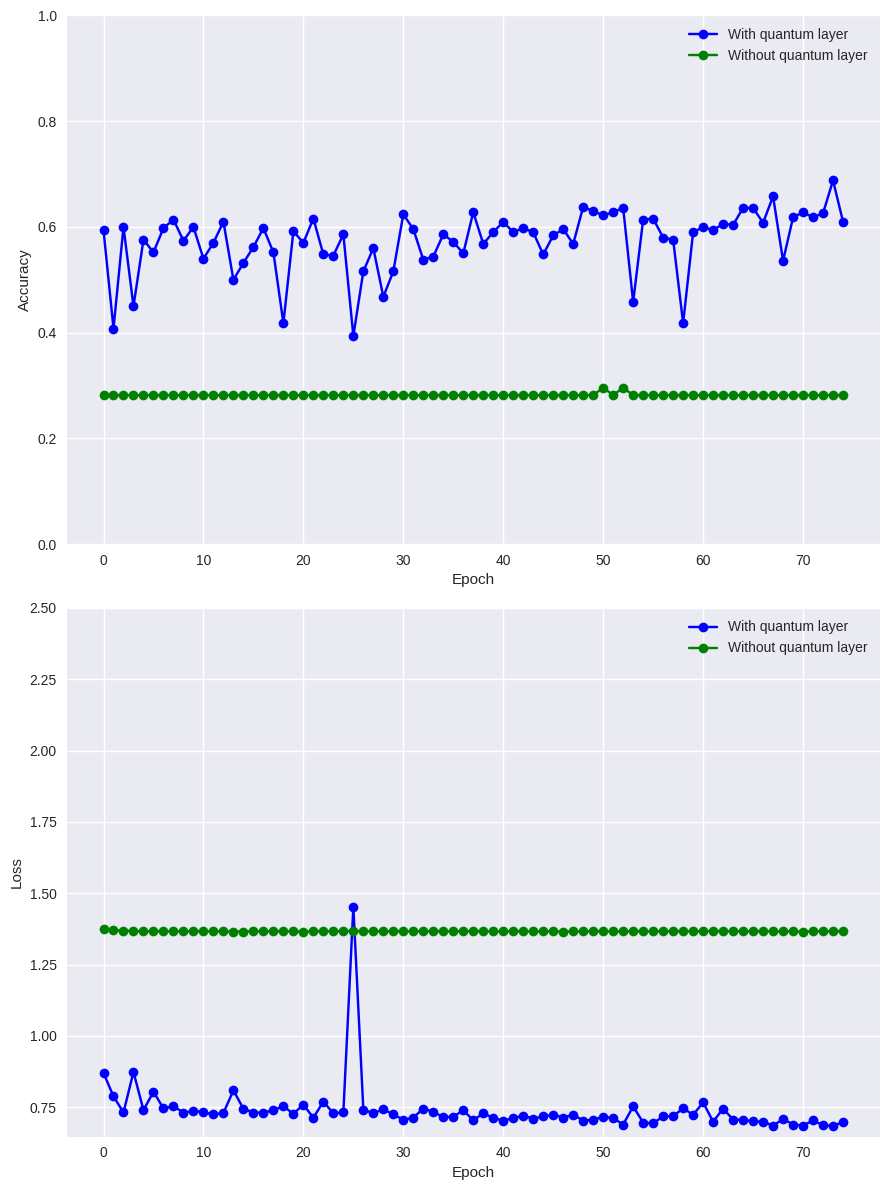

In [ ]:
plot_comparison(q_history_NN3_amp, c_history_NN3)

##Basic_NN2

###Quantum

In [ ]:
q_model_NN2_amp = MyModel2()

n_epochs = 75

q_history_NN2_amp = q_model_NN2_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.3916 - accuracy: 0.2412 - val_loss: 1.3749 - val_accuracy: 0.2840 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 1.3838 - accuracy: 0.2600 - val_loss: 1.3713 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 3/75
625/625 - 2s - loss: 1.3832 - accuracy: 0.2548 - val_loss: 1.3685 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2640 - val_loss: 1.3677 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2528 - val_loss: 1.3666 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3832 - accuracy: 0.2472 - val_loss: 1.3670 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2500 - val_loss: 1.3666 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2620 - val_loss: 1.3668 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 3s 

In [ ]:
q_y_pred_NN2_amp = np.argmax(q_model_NN2_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN2, q_precision_amp_NN2, q_recall_amp_NN2, q_accuracy_amp_NN2 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN2_amp)
print("F1 Score:", q_f1_amp_NN2)
print("Precision:", q_precision_amp_NN2)
print("Recall:", q_recall_amp_NN2)
print("Accuracy:", q_accuracy_amp_NN2)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


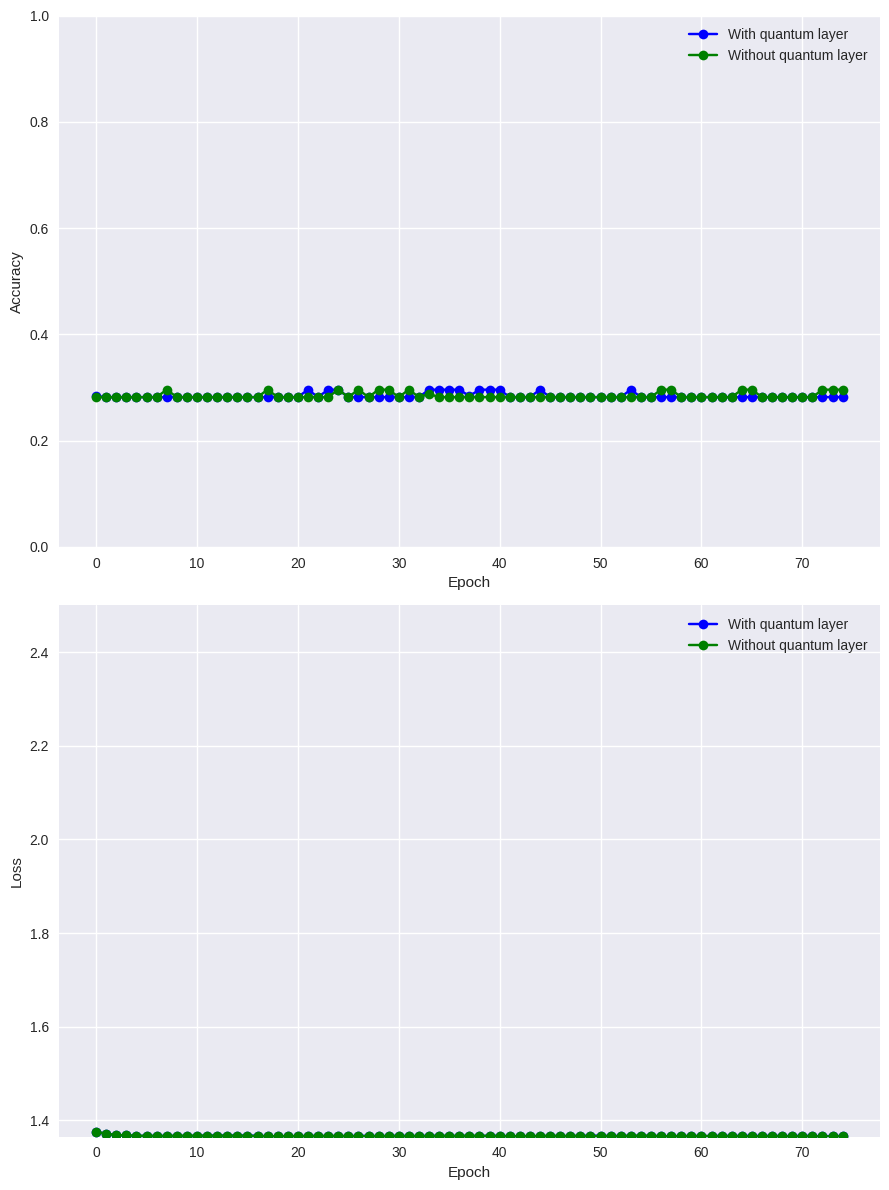

In [ ]:
plot_comparison(q_history_NN2_amp, c_history_NN2)

##Basic_NN1

###Quantum

In [ ]:
q_model_NN1_amp = MyModel1()

n_epochs = 75

q_history_NN1_amp = q_model_NN1_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 1.3869 - accuracy: 0.2592 - val_loss: 1.3752 - val_accuracy: 0.2960 - 2s/epoch - 4ms/step
Epoch 2/75
625/625 - 1s - loss: 1.3835 - accuracy: 0.2620 - val_loss: 1.3704 - val_accuracy: 0.2960 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2584 - val_loss: 1.3682 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3830 - accuracy: 0.2560 - val_loss: 1.3666 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 1.3831 - accuracy: 0.2640 - val_loss: 1.3669 - val_accuracy: 0.2820 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3832 - accuracy: 0.2468 - val_loss: 1.3667 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2560 - val_loss: 1.3674 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2612 - val_loss: 1.3669 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN1_amp = np.argmax(q_model_NN1_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN1, q_precision_amp_NN1, q_recall_amp_NN1, q_accuracy_amp_NN1 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN1_amp)
print("F1 Score:", q_f1_amp_NN1)
print("Precision:", q_precision_amp_NN1)
print("Recall:", q_recall_amp_NN1)
print("Accuracy:", q_accuracy_amp_NN1)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


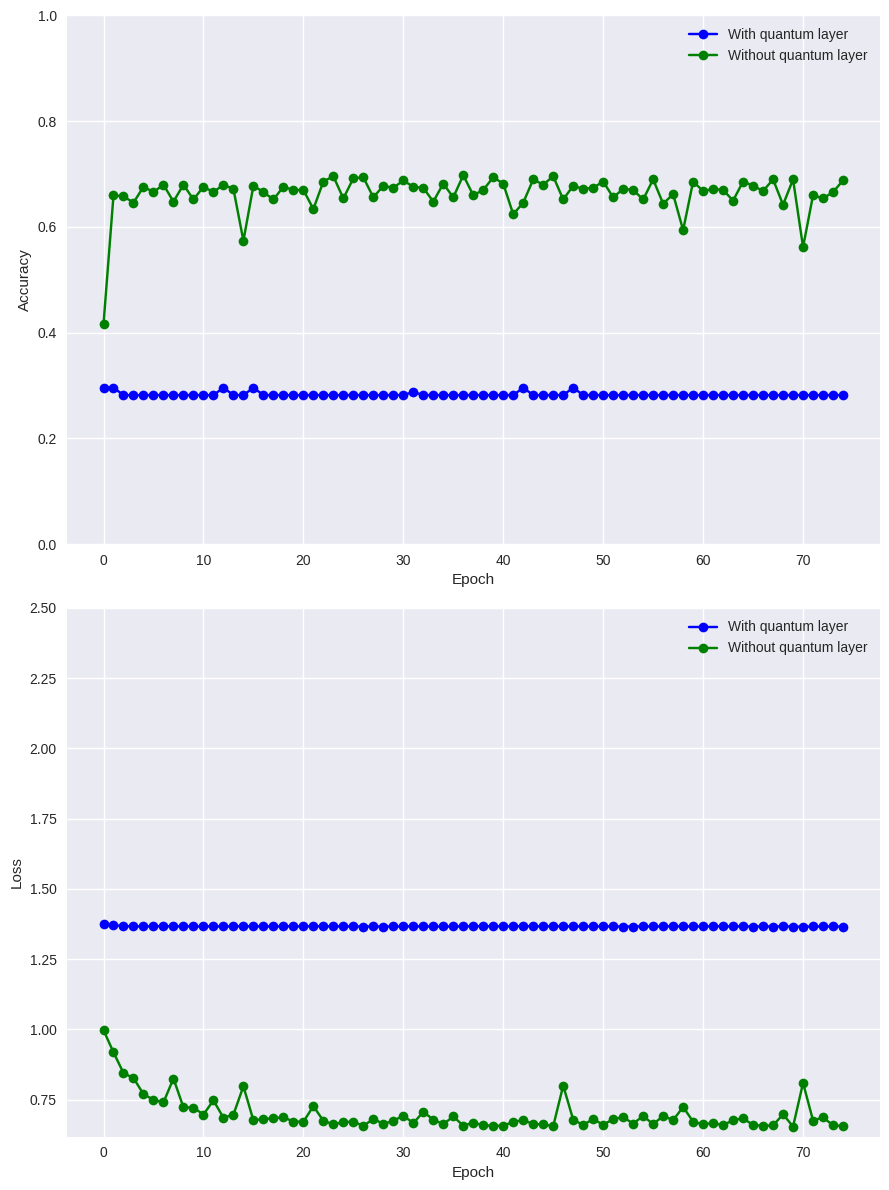

In [ ]:
plot_comparison(q_history_NN1_amp, c_history_NN1)

##Basic_NN

###Quantum

In [ ]:
q_model_NN_amp = MyModel()

n_epochs = 75

q_history_NN_amp = q_model_NN_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 1.0510 - accuracy: 0.5076 - val_loss: 0.7448 - val_accuracy: 0.4680 - 2s/epoch - 3ms/step
Epoch 2/75
625/625 - 1s - loss: 0.9600 - accuracy: 0.5356 - val_loss: 1.0041 - val_accuracy: 0.4280 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 1s - loss: 0.9027 - accuracy: 0.5328 - val_loss: 0.8497 - val_accuracy: 0.4600 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 0.9238 - accuracy: 0.5512 - val_loss: 0.8365 - val_accuracy: 0.4320 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 0.8627 - accuracy: 0.5996 - val_loss: 0.9299 - val_accuracy: 0.6180 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 1s - loss: 0.8204 - accuracy: 0.5824 - val_loss: 0.6892 - val_accuracy: 0.6100 - 1s/epoch - 2ms/step
Epoch 7/75
625/625 - 1s - loss: 0.8488 - accuracy: 0.5972 - val_loss: 0.6927 - val_accuracy: 0.6400 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 2s - loss: 0.8281 - accuracy: 0.6004 - val_loss: 0.6662 - val_accuracy: 0.6560 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
q_y_pred_NN_amp = np.argmax(q_model_NN_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 1ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN, q_precision_amp_NN, q_recall_amp_NN, q_accuracy_amp_NN = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN_amp)
print("F1 Score:", q_f1_amp_NN)
print("Precision:", q_precision_amp_NN)
print("Recall:", q_recall_amp_NN)
print("Accuracy:", q_accuracy_amp_NN)

F1 Score: 0.5720984957165194
Precision: 0.5348509585132765
Recall: 0.66
Accuracy: 0.66


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


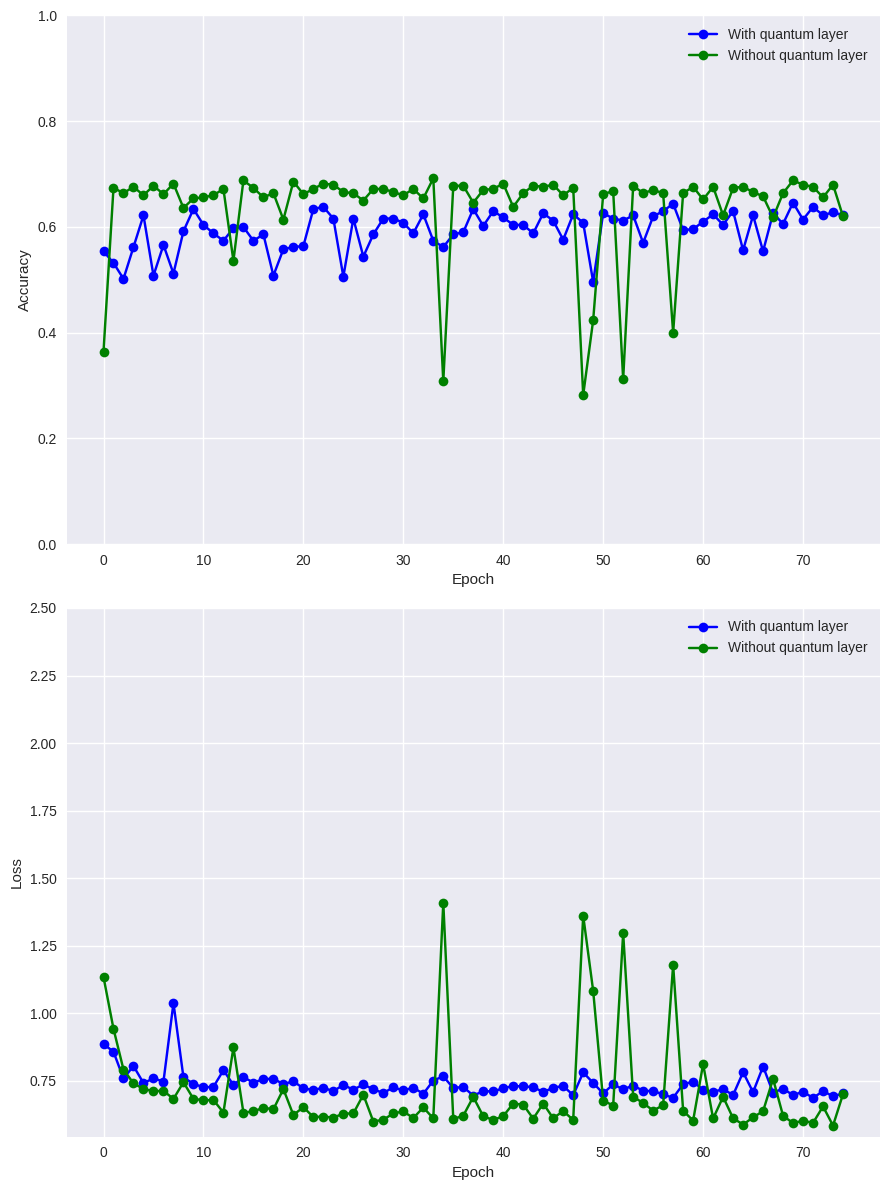

In [ ]:
plot_comparison(q_history_NN5_amp, c_history_NN5)

##CNN

###Quantum

In [ ]:
q_CNN_model_amp = MyCNNModel()

n_epochs = 75

q_history_CNN_amp = q_CNN_model_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 0.8791 - accuracy: 0.4860 - val_loss: 0.7812 - val_accuracy: 0.5280 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7639 - accuracy: 0.5240 - val_loss: 0.6850 - val_accuracy: 0.6220 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.7345 - accuracy: 0.5472 - val_loss: 0.7437 - val_accuracy: 0.5320 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.7287 - accuracy: 0.5716 - val_loss: 0.7654 - val_accuracy: 0.5100 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.7135 - accuracy: 0.5884 - val_loss: 0.6856 - val_accuracy: 0.5700 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6933 - accuracy: 0.5960 - val_loss: 0.6408 - val_accuracy: 0.5880 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 3s - loss: 0.6538 - accuracy: 0.6236 - val_loss: 0.5859 - val_accuracy: 0.6820 - 3s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.6678 - accuracy: 0.6260 - val_loss: 0.5986 - val_accuracy: 0.6660 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 3s 

In [ ]:
q_y_pred_CNN_amp = np.argmax(q_CNN_model_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
# Calculate classification metrics
q_f1_CNN_amp, q_precision_CNN_amp, q_recall_CNN_amp, q_accuracy_CNN_amp = calculate_classification_metrics(q_test_label_amp, q_y_pred_CNN_amp)
print("F1 Score:", q_f1_CNN_amp)
print("Precision:", q_precision_CNN_amp)
print("Recall:", q_recall_CNN_amp)
print("Accuracy:", q_accuracy_CNN_amp)

F1 Score: 0.8289056156378569
Precision: 0.8360830734154127
Recall: 0.828
Accuracy: 0.828


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


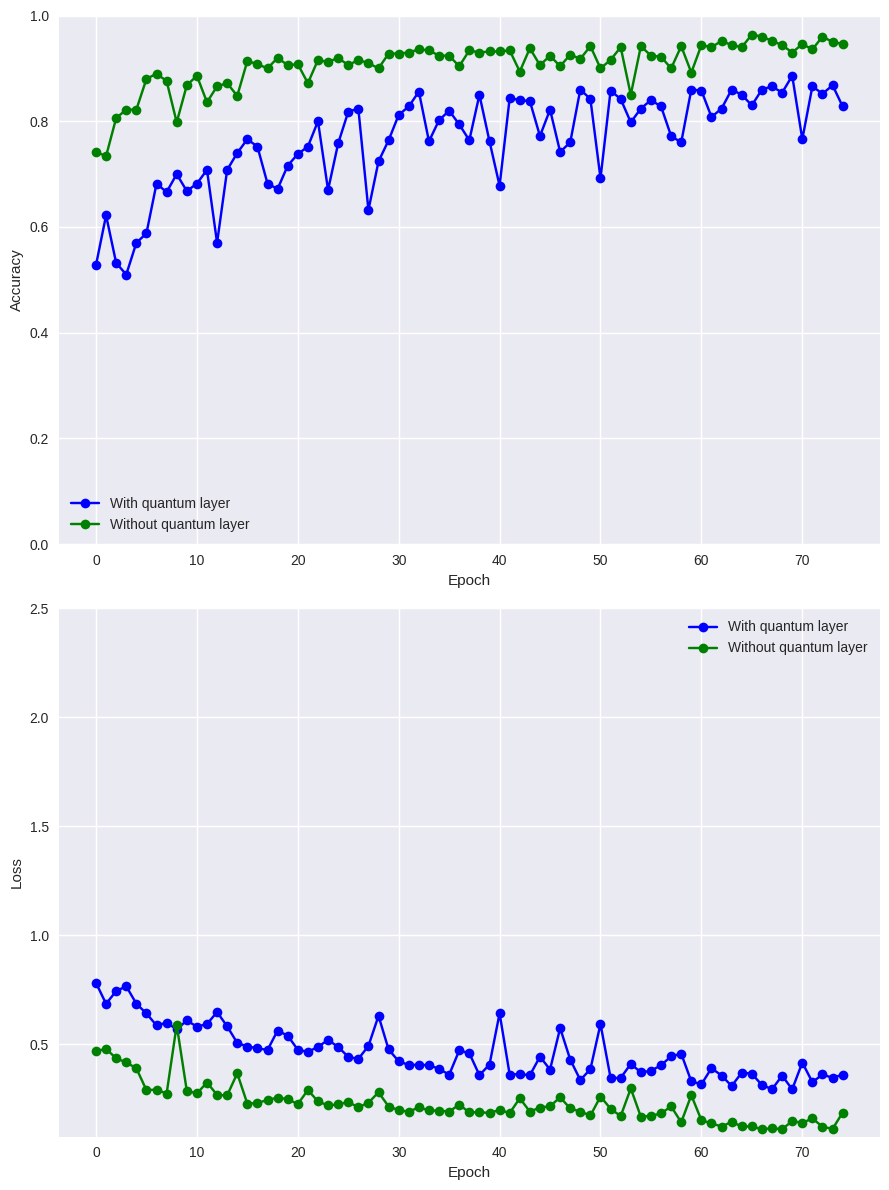

In [ ]:
plot_comparison(q_history_CNN_amp, c_history_CNN)

##SVM

###Quantum

In [ ]:
# Reshape the input data to flatten the color channels
q_train_color_images_amp_flattened = q_train_color_images_amp.reshape(q_train_color_images_amp.shape[0], -1)
q_test_color_images_amp_flattened = q_test_color_images_amp.reshape(q_test_color_images_amp.shape[0], -1)

In [ ]:
q_svm_model_amp = MySVMModel()

n_epochs = 75

q_svm_history_amp = q_svm_model_amp.fit(
    q_train_color_images_amp_flattened,
    q_train_label_amp
)

In [ ]:
q_y_predSVM_amp = q_svm_model_amp.predict(q_test_color_images_amp_flattened)

In [ ]:
# Calculate classification metrics
q_f1_SVM_amp, q_precision_SVM_amp, q_recall_SVM_amp, q_accuracy_SVM_amp = calculate_classification_metrics(q_test_label_amp, q_y_predSVM_amp)
print("F1 Score:", q_f1_SVM_amp)
print("Precision:", q_precision_SVM_amp)
print("Recall:", q_recall_SVM_amp)
print("Accuracy:", q_accuracy_SVM_amp)

F1 Score: 0.7682752682762494
Precision: 0.7905203788186066
Recall: 0.77
Accuracy: 0.77


#Basis_Encoded

##Basic_NN6

###Quantum

In [ ]:
q_train_color_images_basis = np.load(SAVE_PATH_1 + "q_train_color_images_basis.npy")
q_test_color_images_basis = np.load(SAVE_PATH_1 + "q_test_color_images_basis.npy")
q_train_label_basis = np.load(SAVE_PATH_1 + "q_train_label_basis.npy")
q_test_label_basis = np.load(SAVE_PATH_1 + "q_test_label_basis.npy")

In [ ]:
q_model_NN6_basis = MyModel6()

n_epochs = 75

q_history_NN6_basis = q_model_NN6_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.4373 - accuracy: 0.2336 - val_loss: 1.3698 - val_accuracy: 0.2880 - 4s/epoch - 7ms/step
Epoch 2/75
625/625 - 3s - loss: 1.3848 - accuracy: 0.2544 - val_loss: 1.3343 - val_accuracy: 0.2880 - 3s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 1.2195 - accuracy: 0.3884 - val_loss: 0.9730 - val_accuracy: 0.6140 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.1084 - accuracy: 0.4496 - val_loss: 0.9106 - val_accuracy: 0.6080 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.0880 - accuracy: 0.4424 - val_loss: 0.8901 - val_accuracy: 0.6140 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 1.0875 - accuracy: 0.4404 - val_loss: 0.8616 - val_accuracy: 0.5740 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 3s - loss: 1.0752 - accuracy: 0.4472 - val_loss: 0.9001 - val_accuracy: 0.4400 - 3s/epoch - 4ms/step
Epoch 8/75
625/625 - 4s - loss: 1.0561 - accuracy: 0.4444 - val_loss: 0.8753 - val_accuracy: 0.5280 - 4s/epoch - 6ms/step
Epoch 9/75
625/625 - 3s 

In [ ]:
q_y_pred_NN6_basis = np.argmax(q_model_NN6_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN6, q_precision_basis_NN6, q_recall_basis_NN6, q_accuracy_basis_NN6 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN6_basis)
print("F1 Score:", q_f1_basis_NN6)
print("Precision:", q_precision_basis_NN6)
print("Recall:", q_recall_basis_NN6)
print("Accuracy:", q_accuracy_basis_NN6)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


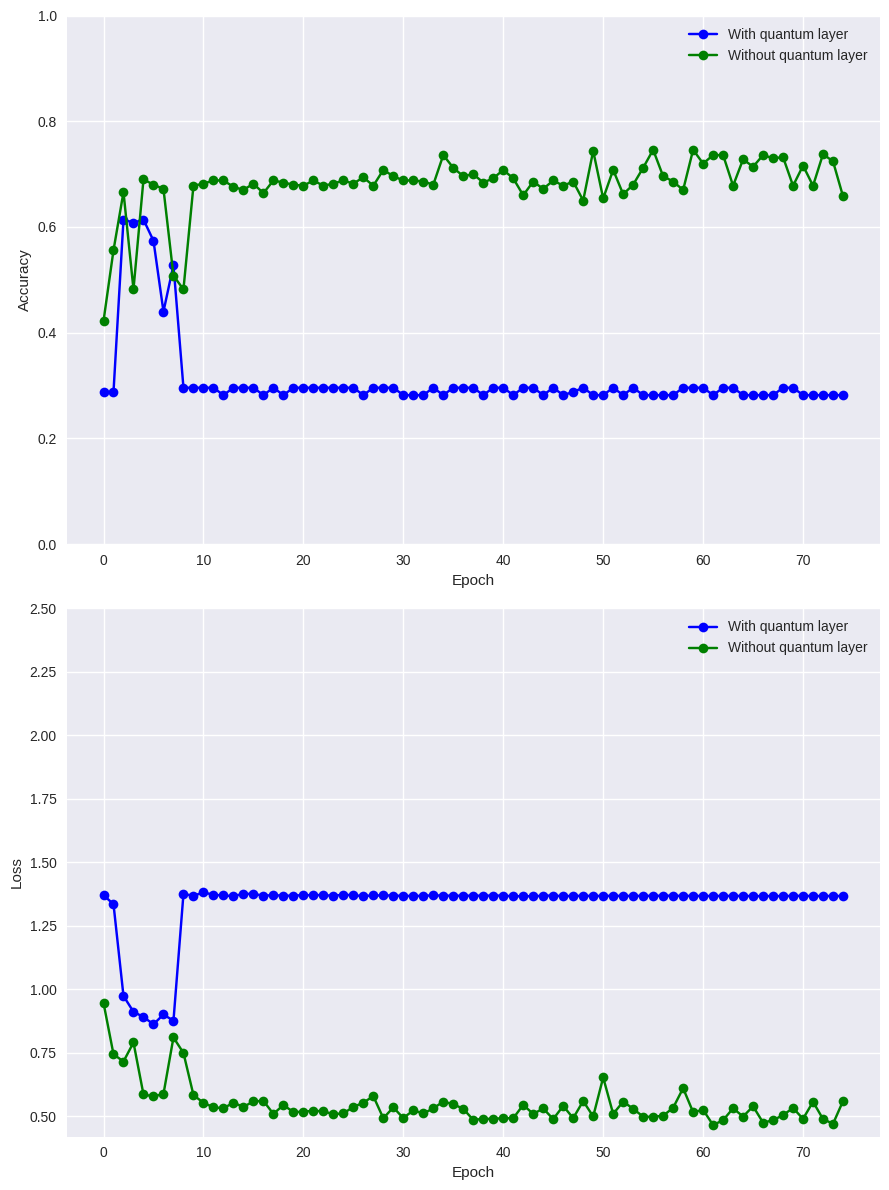

In [ ]:
plot_comparison(q_history_NN6_basis, c_history_NN6)

##Basic_NN5

###Quantum

In [ ]:
q_model_NN5_basis = MyModel5()

n_epochs = 75

q_history_NN5_basis = q_model_NN5_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.4253 - accuracy: 0.2436 - val_loss: 1.3755 - val_accuracy: 0.2820 - 4s/epoch - 7ms/step
Epoch 2/75
625/625 - 2s - loss: 1.3834 - accuracy: 0.2572 - val_loss: 1.3684 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.3836 - accuracy: 0.2576 - val_loss: 1.3692 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3833 - accuracy: 0.2604 - val_loss: 1.3686 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 3s - loss: 1.3833 - accuracy: 0.2512 - val_loss: 1.3677 - val_accuracy: 0.2820 - 3s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3836 - accuracy: 0.2508 - val_loss: 1.3691 - val_accuracy: 0.2820 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3832 - accuracy: 0.2504 - val_loss: 1.3678 - val_accuracy: 0.2820 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3832 - accuracy: 0.2484 - val_loss: 1.3666 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN5_basis = np.argmax(q_model_NN5_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN5, q_precision_basis_NN5, q_recall_basis_NN5, q_accuracy_basis_NN5 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN5_basis)
print("F1 Score:", q_f1_basis_NN5)
print("Precision:", q_precision_basis_NN5)
print("Recall:", q_recall_basis_NN5)
print("Accuracy:", q_accuracy_basis_NN5)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


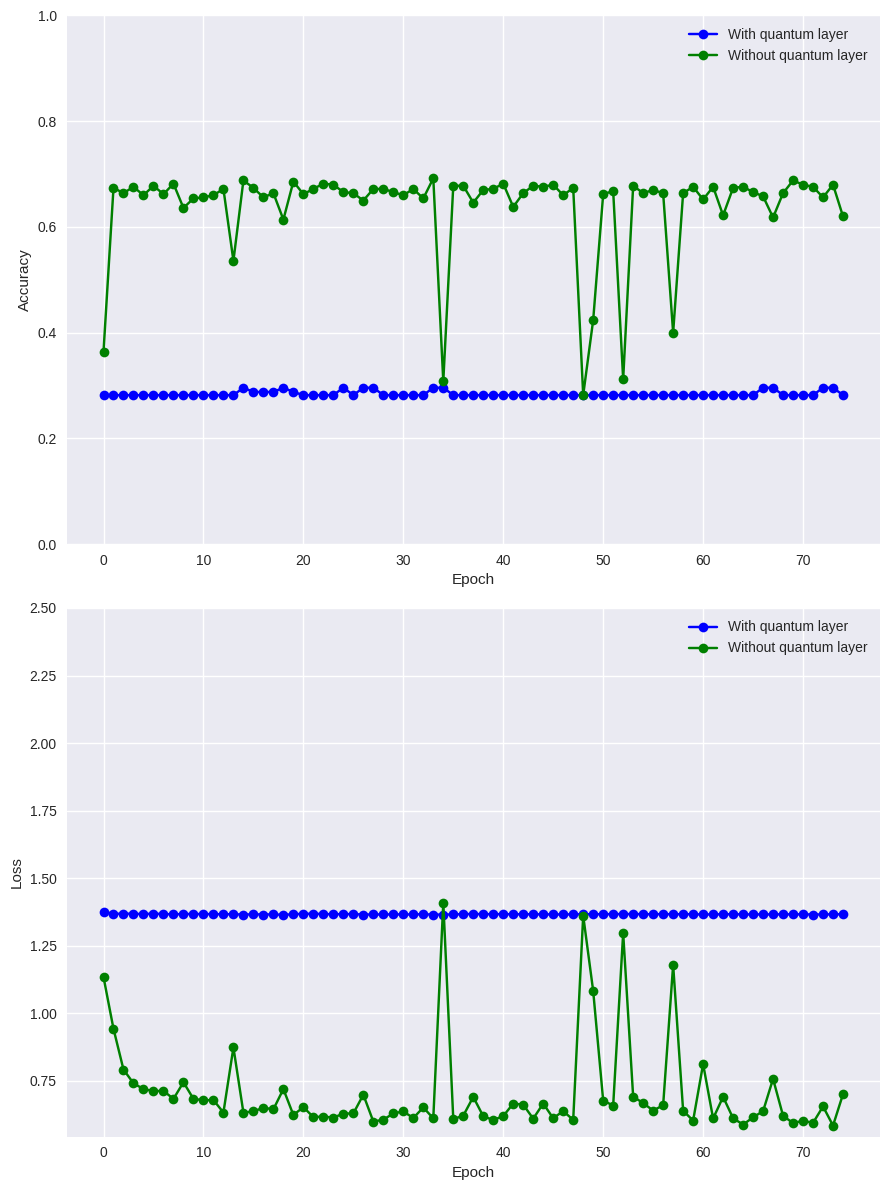

In [ ]:
plot_comparison(q_history_NN5_basis, c_history_NN5)

##Basic_NN4

###Quantum

In [ ]:
q_model_NN4_basis = MyModel4()

n_epochs = 75

q_history_NN4_basis = q_model_NN4_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 8s - loss: 1.3983 - accuracy: 0.2684 - val_loss: 1.3690 - val_accuracy: 0.2960 - 8s/epoch - 12ms/step
Epoch 2/75
625/625 - 4s - loss: 1.3845 - accuracy: 0.2612 - val_loss: 1.3693 - val_accuracy: 0.2820 - 4s/epoch - 6ms/step
Epoch 3/75
625/625 - 3s - loss: 1.3836 - accuracy: 0.2552 - val_loss: 1.3708 - val_accuracy: 0.2820 - 3s/epoch - 5ms/step
Epoch 4/75
625/625 - 4s - loss: 1.3835 - accuracy: 0.2560 - val_loss: 1.3700 - val_accuracy: 0.2820 - 4s/epoch - 7ms/step
Epoch 5/75
625/625 - 4s - loss: 1.3834 - accuracy: 0.2704 - val_loss: 1.3659 - val_accuracy: 0.2960 - 4s/epoch - 6ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3834 - accuracy: 0.2540 - val_loss: 1.3645 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3835 - accuracy: 0.2604 - val_loss: 1.3652 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3826 - accuracy: 0.2708 - val_loss: 1.3651 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s

In [ ]:
q_y_pred_NN4_basis = np.argmax(q_model_NN4_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 1s 7ms/step


In [ ]:
4# Calculate classification metrics
q_f1_basis_NN4, q_precision_basis_NN4, q_recall_basis_NN4, q_accuracy_basis_NN4 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN4_basis)
print("F1 Score:", q_f1_basis_NN4)
print("Precision:", q_precision_basis_NN4)
print("Recall:", q_recall_basis_NN4)
print("Accuracy:", q_accuracy_basis_NN4)

F1 Score: 0.12879503105590062
Precision: 0.08294399999999999
Recall: 0.288
Accuracy: 0.288


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


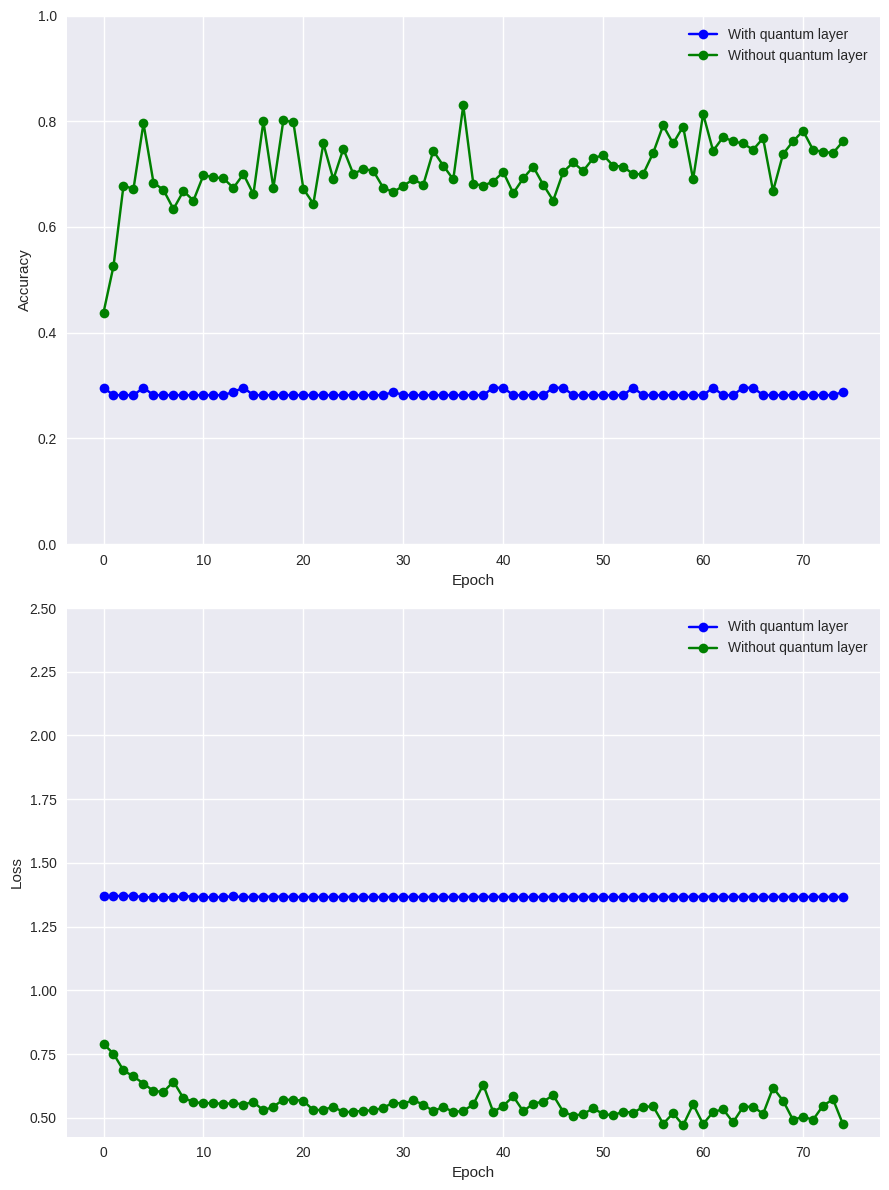

In [ ]:
plot_comparison(q_history_NN4_basis, c_history_NN4)

##Basic_NN3

###Quantum

In [ ]:
q_model_NN3_basis = MyModel3()

n_epochs = 75

q_history_NN3_basis = q_model_NN3_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.4033 - accuracy: 0.2584 - val_loss: 1.3785 - val_accuracy: 0.2960 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 1.3838 - accuracy: 0.2592 - val_loss: 1.3717 - val_accuracy: 0.2820 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 1.3835 - accuracy: 0.2648 - val_loss: 1.3690 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3834 - accuracy: 0.2440 - val_loss: 1.3674 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.3829 - accuracy: 0.2680 - val_loss: 1.3672 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3833 - accuracy: 0.2580 - val_loss: 1.3676 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3834 - accuracy: 0.2628 - val_loss: 1.3676 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2588 - val_loss: 1.3680 - val_accuracy: 0.2820 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN3_basis = np.argmax(q_model_NN3_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN3, q_precision_basis_NN3, q_recall_basis_NN3, q_accuracy_basis_NN3 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN3_basis)
print("F1 Score:", q_f1_basis_NN3)
print("Precision:", q_precision_basis_NN3)
print("Recall:", q_recall_basis_NN3)
print("Accuracy:", q_accuracy_basis_NN3)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


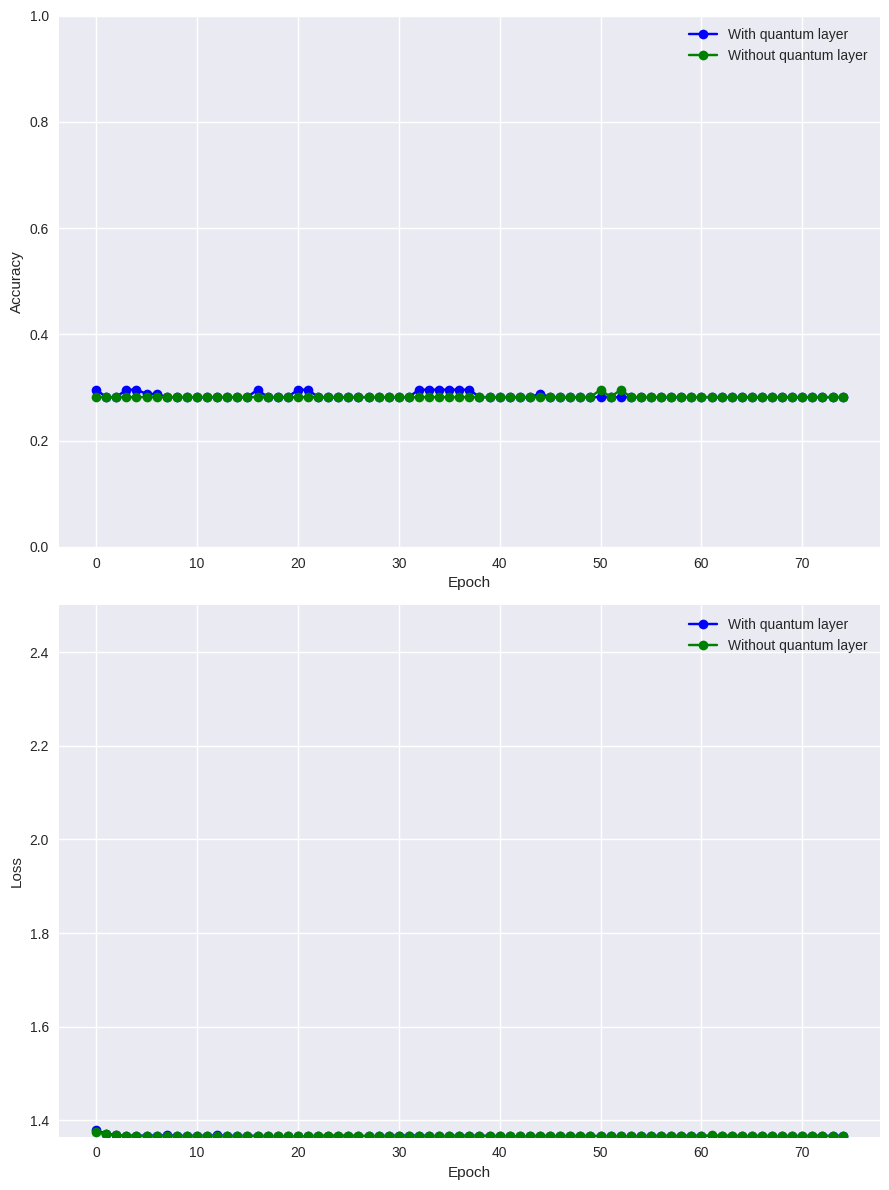

In [ ]:
plot_comparison(q_history_NN3_basis, c_history_NN3)

##Basic_NN2

###Quantum

In [ ]:
q_model_NN2_basis = MyModel2()

n_epochs = 75

q_history_NN2_basis = q_model_NN2_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.3996 - accuracy: 0.2512 - val_loss: 1.3734 - val_accuracy: 0.2960 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 1.3834 - accuracy: 0.2616 - val_loss: 1.3698 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.3832 - accuracy: 0.2604 - val_loss: 1.3677 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2564 - val_loss: 1.3669 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.3830 - accuracy: 0.2608 - val_loss: 1.3676 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3830 - accuracy: 0.2568 - val_loss: 1.3671 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3830 - accuracy: 0.2620 - val_loss: 1.3666 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2516 - val_loss: 1.3671 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN2_basis = np.argmax(q_model_NN2_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN2, q_precision_basis_NN2, q_recall_basis_NN2, q_accuracy_basis_NN2 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN2_basis)
print("F1 Score:", q_f1_basis_NN2)
print("Precision:", q_precision_basis_NN2)
print("Recall:", q_recall_basis_NN2)
print("Accuracy:", q_accuracy_basis_NN2)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


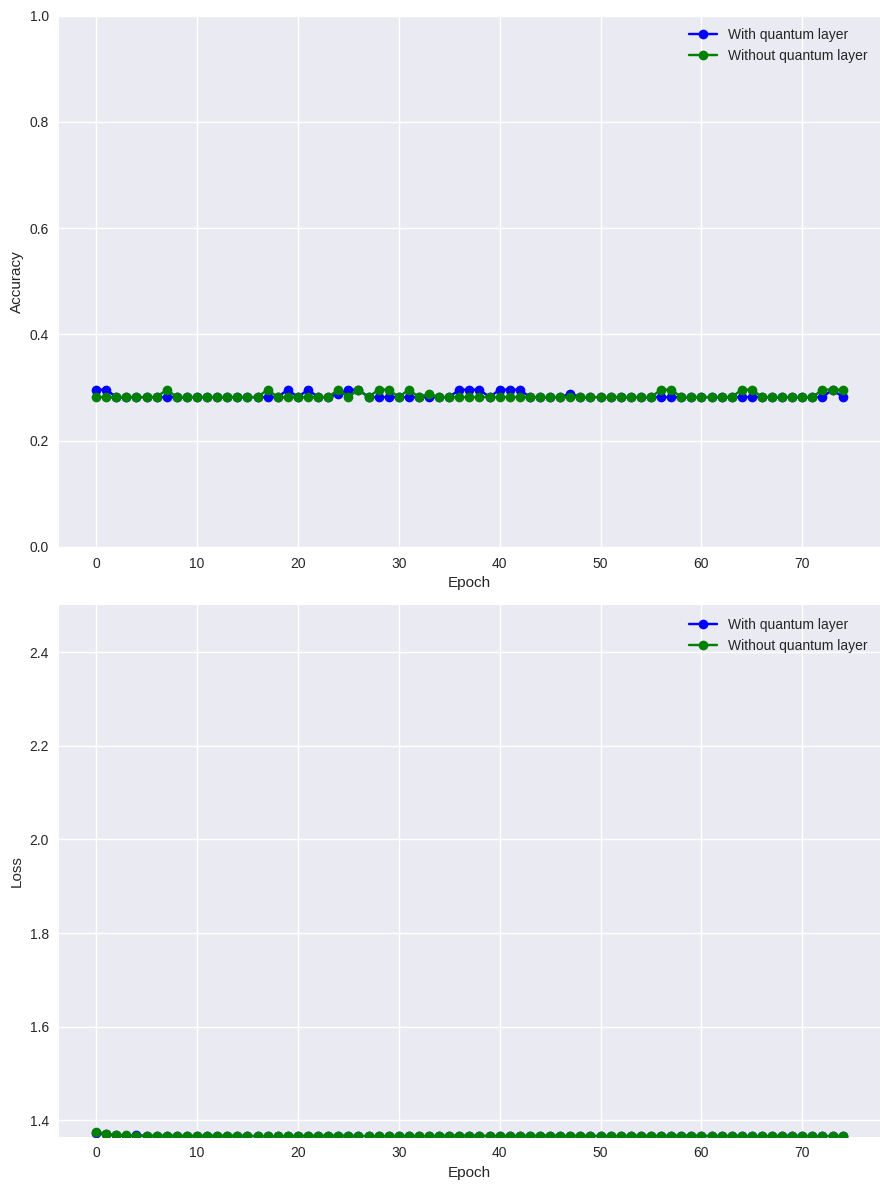

In [ ]:
plot_comparison(q_history_NN2_basis, c_history_NN2)

##Basic_NN1

###Quantum

In [ ]:
q_model_NN1_basis = MyModel1()

n_epochs = 75

q_history_NN1_basis = q_model_NN1_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 1.3844 - accuracy: 0.2532 - val_loss: 1.3748 - val_accuracy: 0.2820 - 2s/epoch - 4ms/step
Epoch 2/75
625/625 - 1s - loss: 1.3834 - accuracy: 0.2640 - val_loss: 1.3700 - val_accuracy: 0.2820 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2564 - val_loss: 1.3680 - val_accuracy: 0.2960 - 2s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 1.3830 - accuracy: 0.2608 - val_loss: 1.3678 - val_accuracy: 0.2820 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 1.3830 - accuracy: 0.2592 - val_loss: 1.3674 - val_accuracy: 0.2820 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 1s - loss: 1.3831 - accuracy: 0.2556 - val_loss: 1.3674 - val_accuracy: 0.2820 - 1s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2556 - val_loss: 1.3675 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2612 - val_loss: 1.3670 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
q_y_pred_NN1_basis = np.argmax(q_model_NN1_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN1, q_precision_basis_NN1, q_recall_basis_NN1, q_accuracy_basis_NN1 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN1_basis)
print("F1 Score:", q_f1_basis_NN1)
print("Precision:", q_precision_basis_NN1)
print("Recall:", q_recall_basis_NN1)
print("Accuracy:", q_accuracy_basis_NN1)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


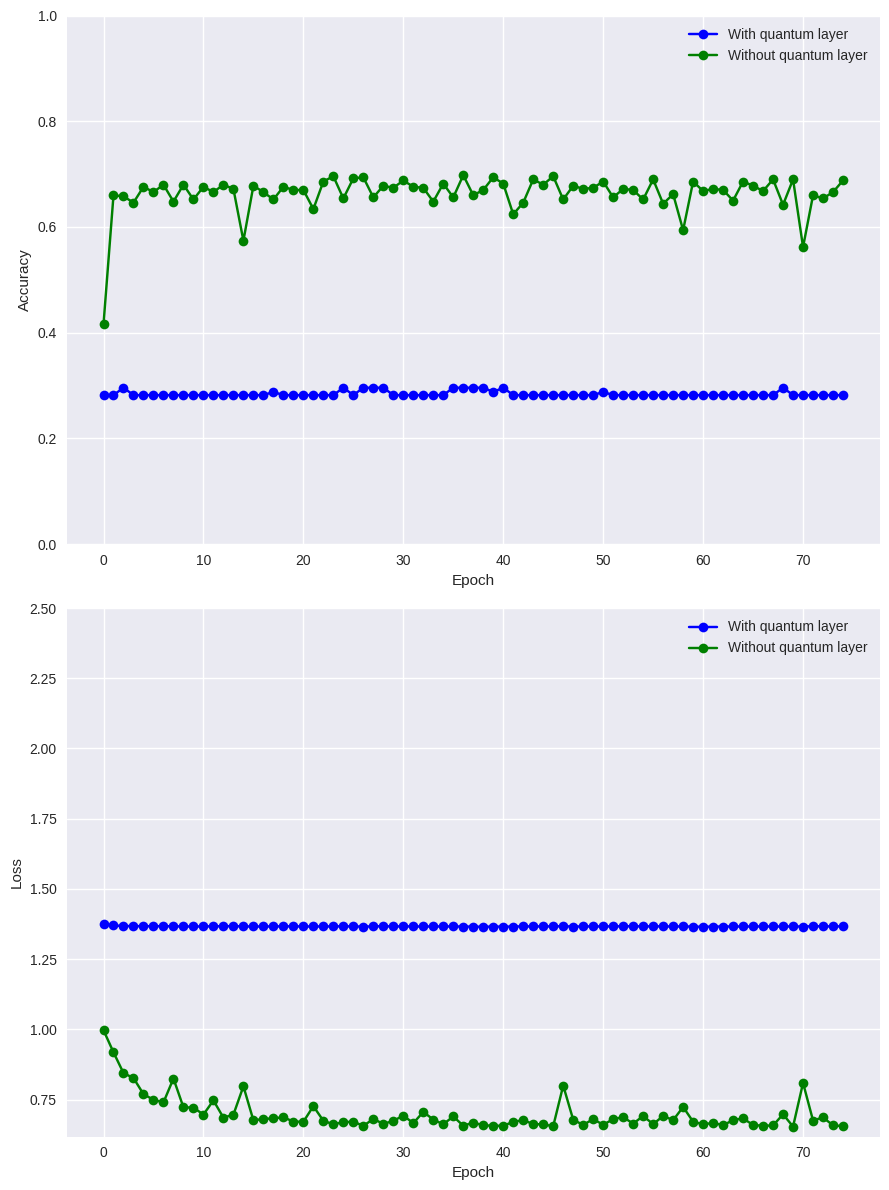

In [ ]:
plot_comparison(q_history_NN1_basis, c_history_NN1)

##Basic_NN

###Quantum

In [ ]:
q_model_NN_basis = MyModel()

n_epochs = 75

q_history_NN_basis = q_model_NN_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.1806 - accuracy: 0.4688 - val_loss: 1.2935 - val_accuracy: 0.6080 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9986 - accuracy: 0.5140 - val_loss: 0.7764 - val_accuracy: 0.5760 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 3s - loss: 1.0874 - accuracy: 0.5148 - val_loss: 1.1517 - val_accuracy: 0.4480 - 3s/epoch - 6ms/step
Epoch 4/75
625/625 - 3s - loss: 0.9450 - accuracy: 0.5432 - val_loss: 0.8902 - val_accuracy: 0.4520 - 3s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.9886 - accuracy: 0.5396 - val_loss: 0.7737 - val_accuracy: 0.5700 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.9599 - accuracy: 0.5428 - val_loss: 0.8028 - val_accuracy: 0.5180 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.9017 - accuracy: 0.5592 - val_loss: 0.9475 - val_accuracy: 0.4940 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.9333 - accuracy: 0.5756 - val_loss: 0.8475 - val_accuracy: 0.6280 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN_basis = np.argmax(q_model_NN_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN, q_precision_basis_NN, q_recall_basis_NN, q_accuracy_basis_NN = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN_basis)
print("F1 Score:", q_f1_basis_NN)
print("Precision:", q_precision_basis_NN)
print("Recall:", q_recall_basis_NN)
print("Accuracy:", q_accuracy_basis_NN)

F1 Score: 0.49145273534320516
Precision: 0.6461170438472418
Recall: 0.598
Accuracy: 0.598


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


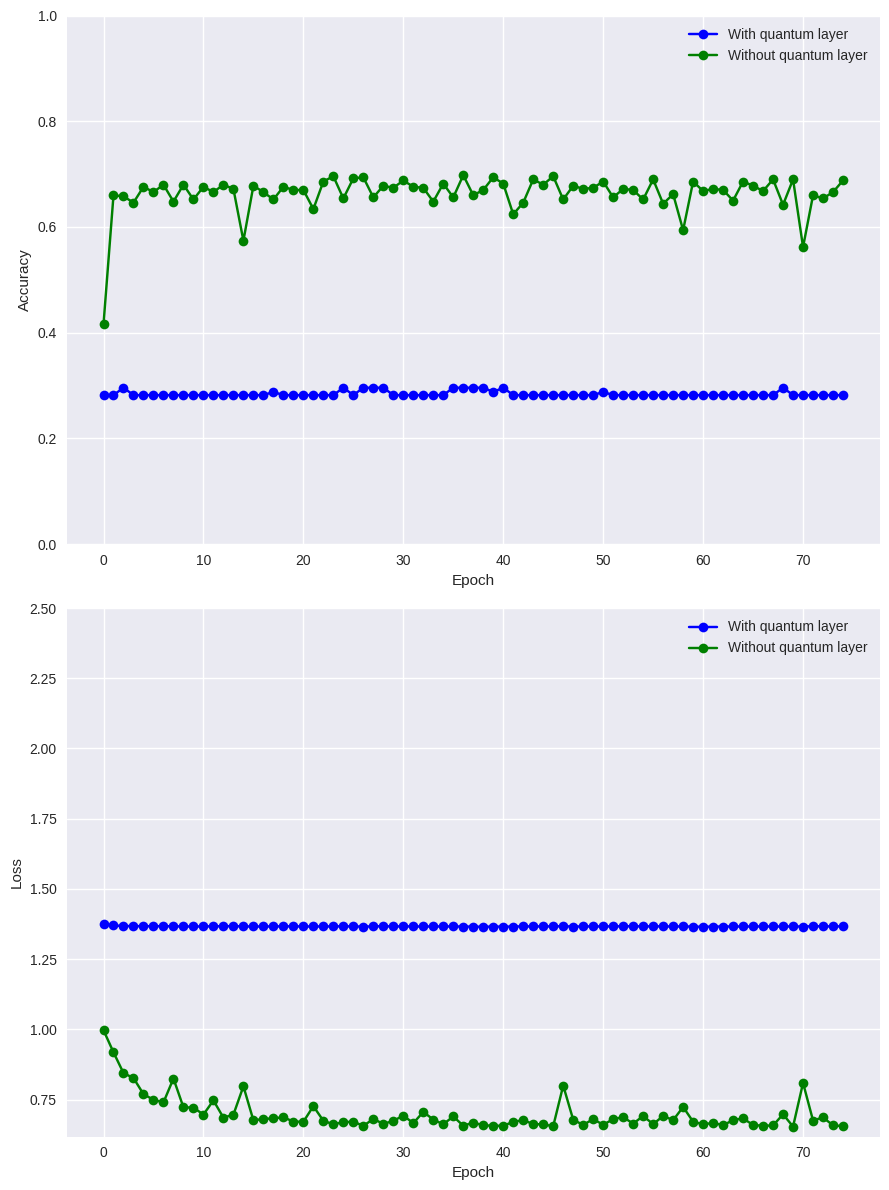

In [ ]:
plot_comparison(q_history_NN1_basis, c_history_NN1)

##CNN

###Quantum

In [ ]:
q_CNN_model_basis = MyCNNModel()

n_epochs = 75

q_history_CNN_basis = q_CNN_model_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 0.9402 - accuracy: 0.4636 - val_loss: 0.7361 - val_accuracy: 0.5820 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7736 - accuracy: 0.5280 - val_loss: 1.0130 - val_accuracy: 0.3540 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.7599 - accuracy: 0.5544 - val_loss: 0.7477 - val_accuracy: 0.5640 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.7400 - accuracy: 0.5464 - val_loss: 0.7077 - val_accuracy: 0.6280 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.7342 - accuracy: 0.5620 - val_loss: 0.9050 - val_accuracy: 0.5940 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.7118 - accuracy: 0.5760 - val_loss: 0.6723 - val_accuracy: 0.6280 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6931 - accuracy: 0.6024 - val_loss: 0.6994 - val_accuracy: 0.5040 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.6821 - accuracy: 0.6184 - val_loss: 0.6526 - val_accuracy: 0.6160 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_CNN_basis = np.argmax(q_CNN_model_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_CNN_basis, q_precision_CNN_basis, q_recall_CNN_basis, q_accuracy_CNN_basis = calculate_classification_metrics(q_test_label_basis, q_y_pred_CNN_basis)
print("F1 Score:", q_f1_CNN_basis)
print("Precision:", q_precision_CNN_basis)
print("Recall:", q_recall_CNN_basis)
print("Accuracy:", q_accuracy_CNN_basis)

F1 Score: 0.8462816229472232
Precision: 0.8501808636690068
Recall: 0.846
Accuracy: 0.846


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


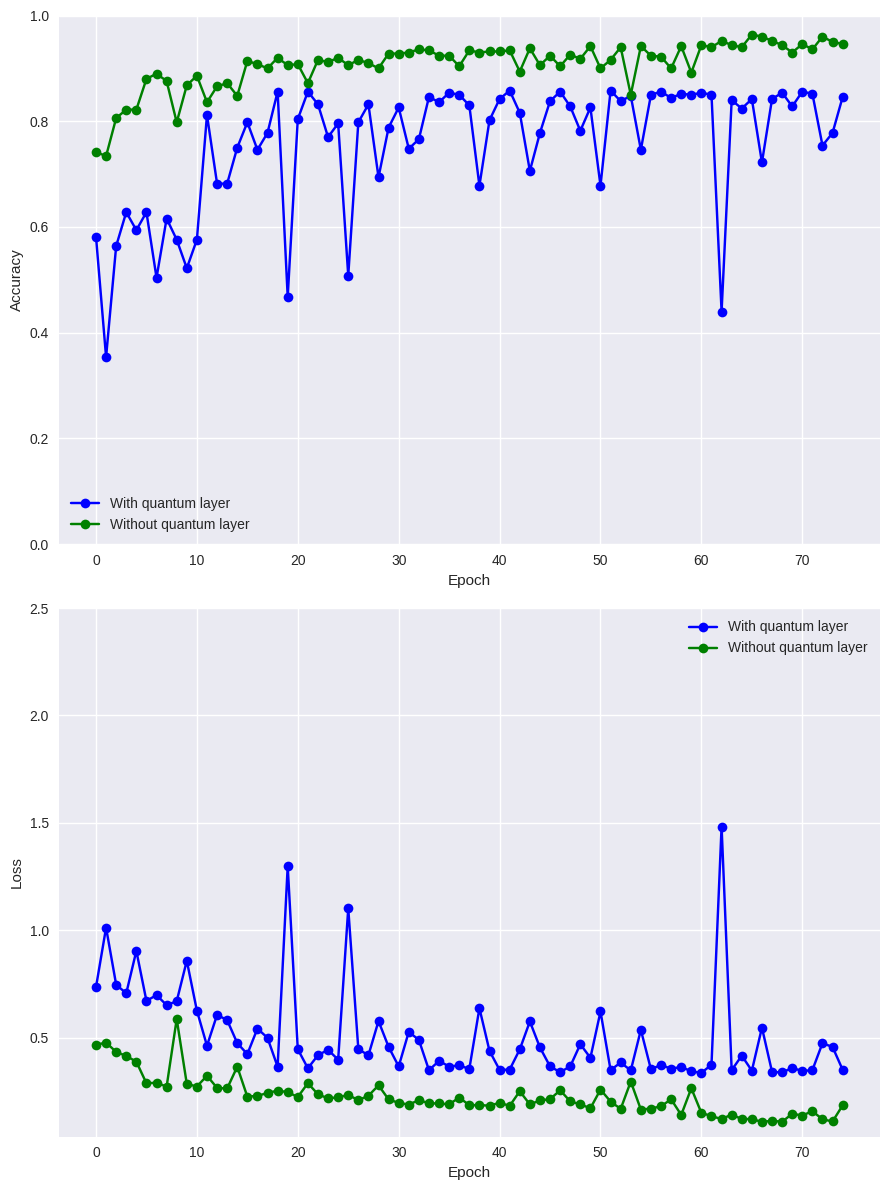

In [ ]:
plot_comparison(q_history_CNN_basis, c_history_CNN)

##SVM

###Quantum

In [ ]:
# Reshape the input data to flatten the color channels
q_train_color_images_basis_flattened = q_train_color_images_basis.reshape(q_train_color_images_basis.shape[0], -1)
q_test_color_images_basis_flattened = q_test_color_images_basis.reshape(q_test_color_images_basis.shape[0], -1)

In [ ]:
q_svm_model_basis = MySVMModel()

n_epochs = 75

q_svm_history_basis = q_svm_model_basis.fit(
    q_train_color_images_basis_flattened,
    q_train_label_basis
)

In [ ]:
q_y_predSVM_basis = q_svm_model_basis.predict(q_test_color_images_basis_flattened)

In [ ]:
# Calculate classification metrics
q_f1_SVM_basis, q_precision_SVM_basis, q_recall_SVM_basis, q_accuracy_SVM_basis = calculate_classification_metrics(q_test_label_basis, q_y_predSVM_basis)
print("F1 Score:", q_f1_SVM_basis)
print("Precision:", q_precision_SVM_basis)
print("Recall:", q_recall_SVM_basis)
print("Accuracy:", q_accuracy_SVM_basis)

F1 Score: 0.7552713058864942
Precision: 0.7873964648748281
Recall: 0.762
Accuracy: 0.762


#Graphs_ang


In [ ]:
import matplotlib.pyplot as plt

def plot_comparison_seven_plots(history_list, labels):
    plt.style.use("seaborn")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Define colors for the plots

    # num_colors = len(history_list)
    # colors = [plt.cm.tab10(i) for i in range(num_colors)]

    for i, history in enumerate(history_list):
        ax1.plot(history.history["val_accuracy"], f"-o{colors[i]}", label=labels[i])
        ax2.plot(history.history["val_loss"], f"-o{colors[i]}", label=labels[i])

    ax1.set_ylabel("Accuracy")
    ax1.set_ylim([0, 1])
    ax1.set_xlabel("Epoch")
    ax1.legend()

    ax2.set_ylabel("Loss")
    ax2.set_ylim(top=2.5)
    ax2.set_xlabel("Epoch")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_comparison([q1_history, q2_history, q3_history, c1_history, c2_history, c3_history],
#                 ["Q1", "Q2", "Q3", "C1", "C2", "C3"])


<ipython-input-168-052b3a70d6f4>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


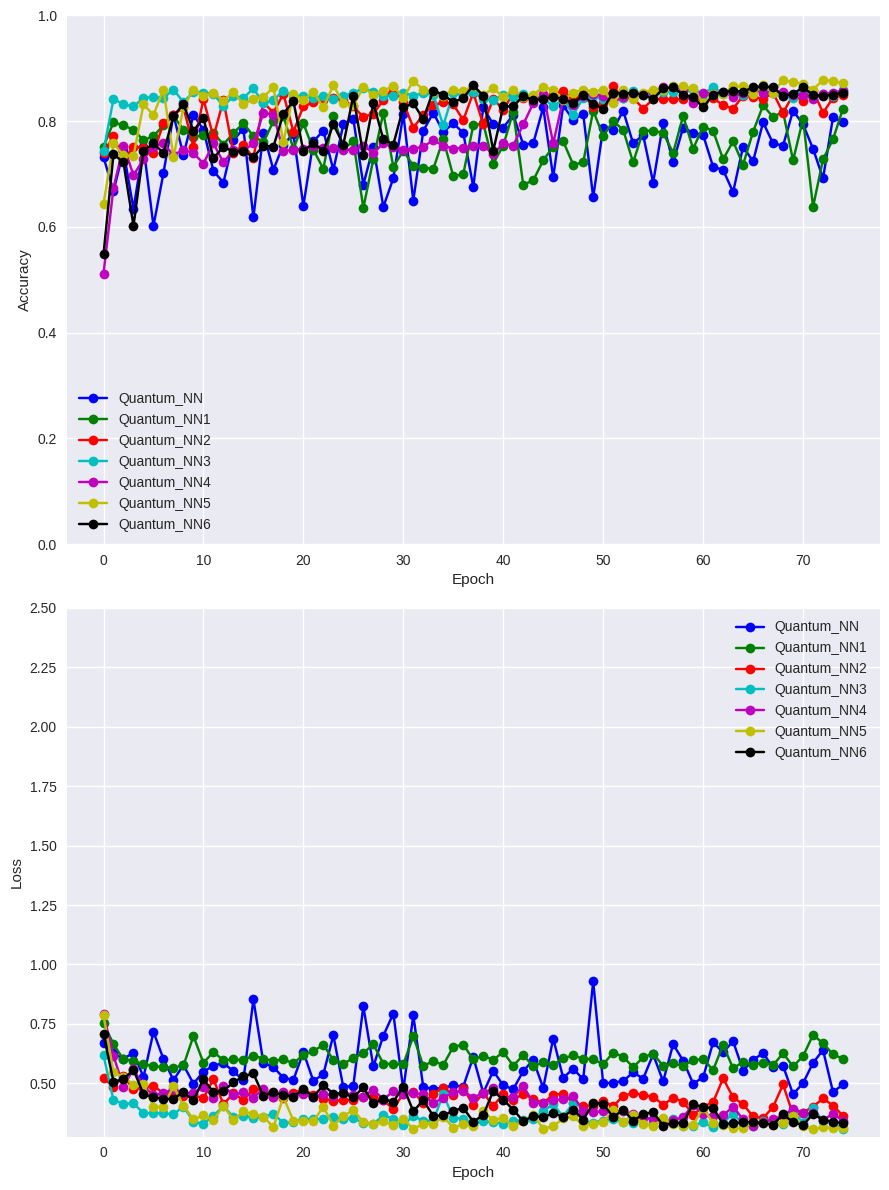

In [ ]:
Q_NN_history_ang_list = [q_history_NN_ang, q_history_NN1_ang, q_history_NN2_ang, q_history_NN3_ang, q_history_NN4_ang, q_history_NN5_ang, q_history_NN6_ang]
Q_NN_labels_ang = ["Quantum_NN", "Quantum_NN1", "Quantum_NN2", "Quantum_NN3", "Quantum_NN4", "Quantum_NN5", "Quantum_NN6"]
plot_comparison_seven_plots(Q_NN_history_ang_list, Q_NN_labels_ang)

<ipython-input-168-052b3a70d6f4>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


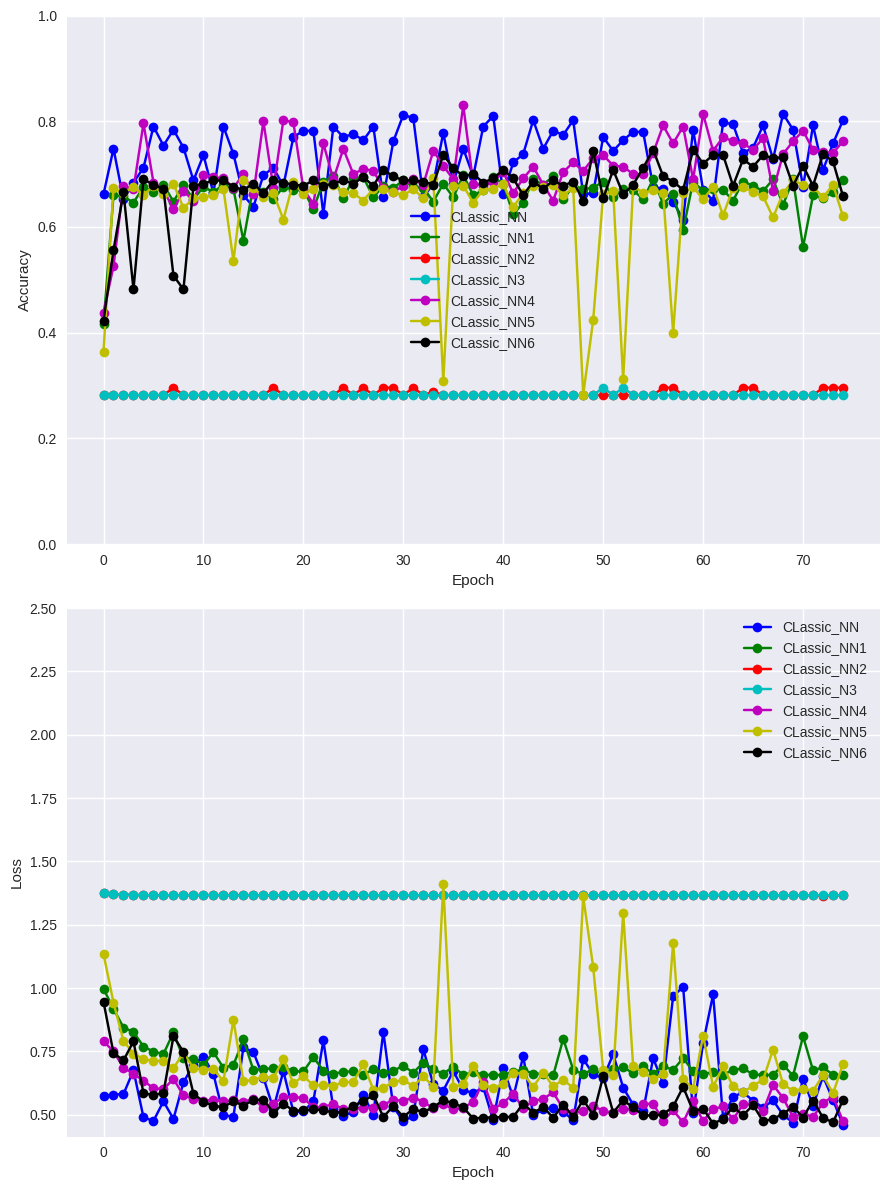

In [ ]:
C_NN_history_ang_list = [c_history_NN, c_history_NN1, c_history_NN2, c_history_NN3, c_history_NN4, c_history_NN5, c_history_NN6]
C_NN_labels_ang = ["CLassic_NN", "CLassic_NN1", "CLassic_NN2", "CLassic_N3", "CLassic_NN4", "CLassic_NN5", "CLassic_NN6"]
plot_comparison_seven_plots(C_NN_history_ang_list, C_NN_labels_ang)

In [ ]:
import matplotlib.pyplot as plt

def plot_comparison_six_plots(history_list, labels):
    plt.style.use("seaborn")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))

    colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Define colors for the plots

    # num_colors = len(history_list)
    # colors = [plt.cm.tab10(i) for i in range(num_colors)]

    for i, history in enumerate(history_list):
        ax1.plot(history.history["val_accuracy"], f"-o{colors[i]}", label=labels[i])
        ax2.plot(history.history["val_loss"], f"-o{colors[i]}", label=labels[i])

    ax1.set_ylabel("Accuracy")
    ax1.set_ylim([0, 1])
    ax1.set_xlabel("Epoch")
    ax1.legend()

    ax2.set_ylabel("Loss")
    ax2.set_ylim(top=2.5)
    ax2.set_xlabel("Epoch")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_comparison([q1_history, q2_history, q3_history, c1_history, c2_history, c3_history],
#                 ["Q1", "Q2", "Q3", "C1", "C2", "C3"])


<ipython-input-171-a8e4a9cffd47>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


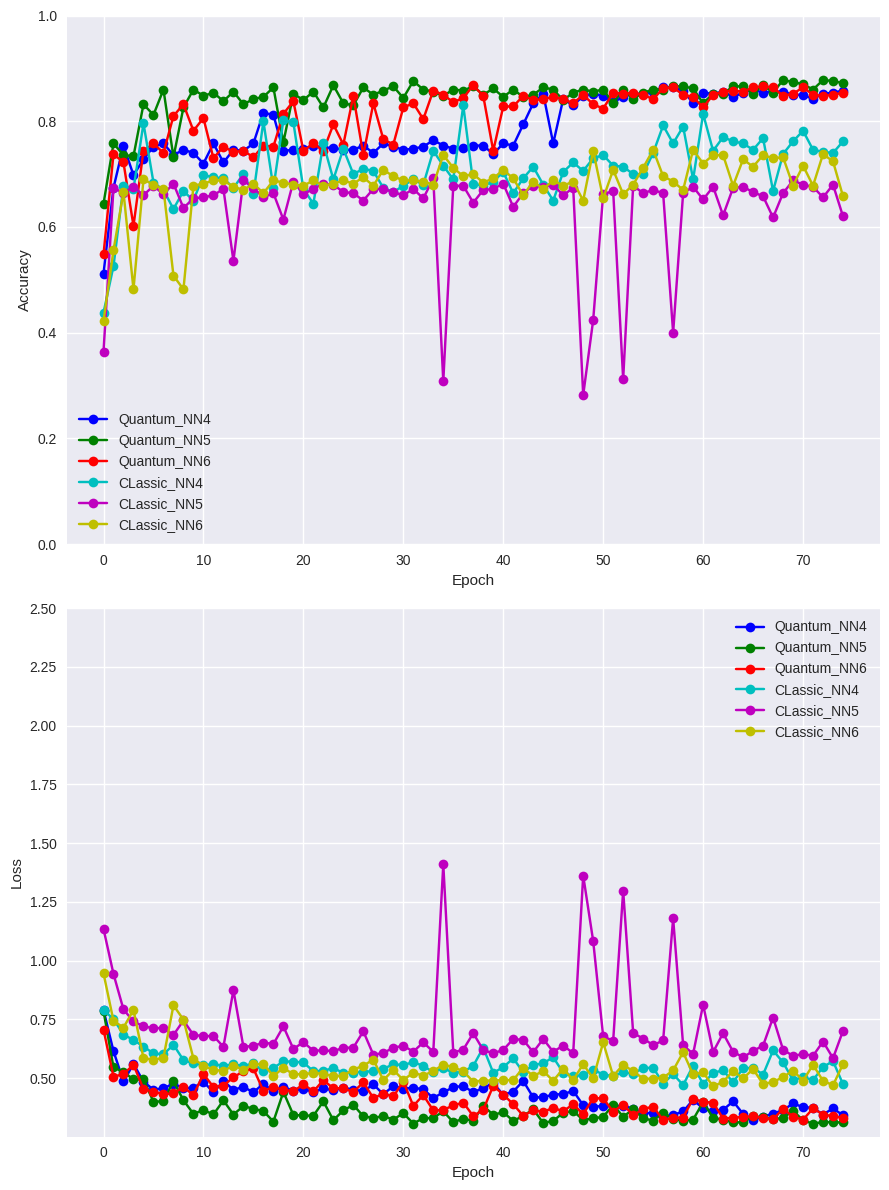

In [ ]:
NN_history_ang_list = [q_history_NN4_ang, q_history_NN5_ang, q_history_NN6_ang, c_history_NN4, c_history_NN5, c_history_NN6]
NN_labels_ang = ["Quantum_NN4", "Quantum_NN5", "Quantum_NN6", "CLassic_NN4", "CLassic_NN5", "CLassic_NN6"]
plot_comparison_six_plots(NN_history_ang_list, NN_labels_ang)

In [ ]:
import matplotlib.pyplot as plt

def plot_comparison_four_plots(history_list, labels):
    plt.style.use("seaborn")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))

    colors = ['b', 'g', 'r', 'c']  # Define colors for the plots

    # num_colors = len(history_list)
    # colors = [plt.cm.tab10(i) for i in range(num_colors)]

    for i, history in enumerate(history_list):
        ax1.plot(history.history["val_accuracy"], f"-o{colors[i]}", label=labels[i])
        ax2.plot(history.history["val_loss"], f"-o{colors[i]}", label=labels[i])

    ax1.set_ylabel("Accuracy")
    ax1.set_ylim([0, 1])
    ax1.set_xlabel("Epoch")
    ax1.legend()

    ax2.set_ylabel("Loss")
    ax2.set_ylim(top=2.5)
    ax2.set_xlabel("Epoch")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_comparison([q1_history, q2_history, q3_history, c1_history, c2_history, c3_history],
#                 ["Q1", "Q2", "Q3", "C1", "C2", "C3"])


<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


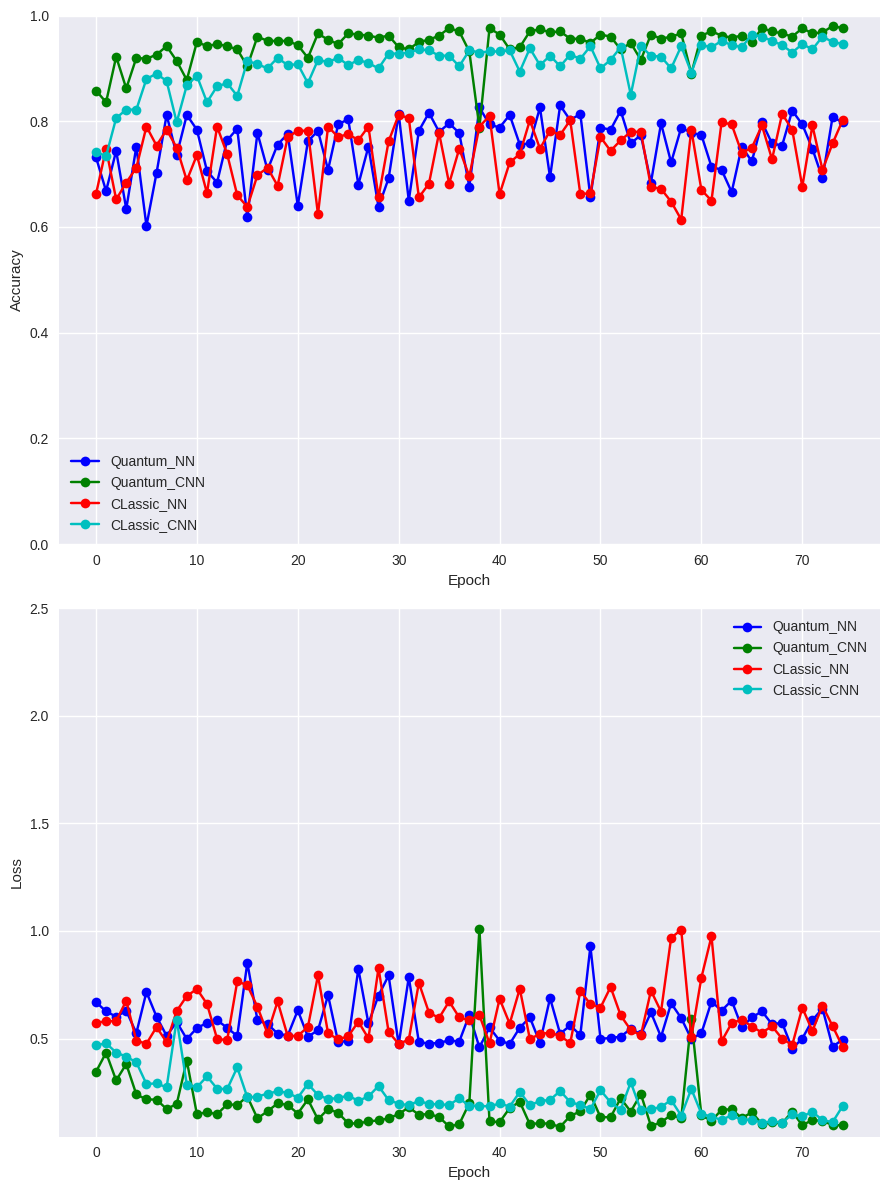

In [ ]:
NN_CNN_history_ang_list = [q_history_NN_ang, q_history_CNN_ang, c_history_NN, c_history_CNN]
NN_CNN_labels_ang = ["Quantum_NN", "Quantum_CNN", "CLassic_NN", "CLassic_CNN"]
plot_comparison_four_plots(NN_CNN_history_ang_list, NN_CNN_labels_ang)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


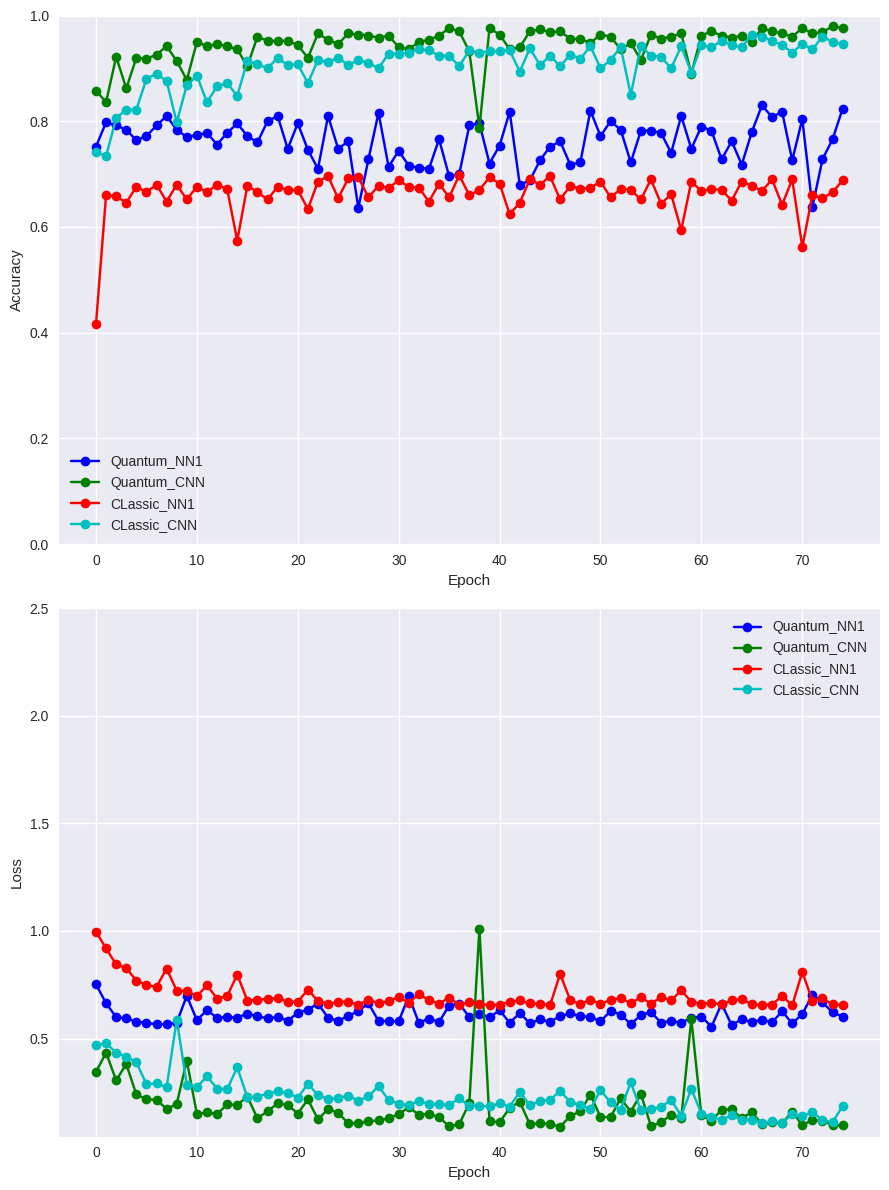

In [ ]:
NN1_CNN_history_ang_list = [q_history_NN1_ang, q_history_CNN_ang, c_history_NN1, c_history_CNN]
NN1_CNN_labels_ang = ["Quantum_NN1", "Quantum_CNN", "CLassic_NN1", "CLassic_CNN"]
plot_comparison_four_plots(NN1_CNN_history_ang_list, NN1_CNN_labels_ang)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


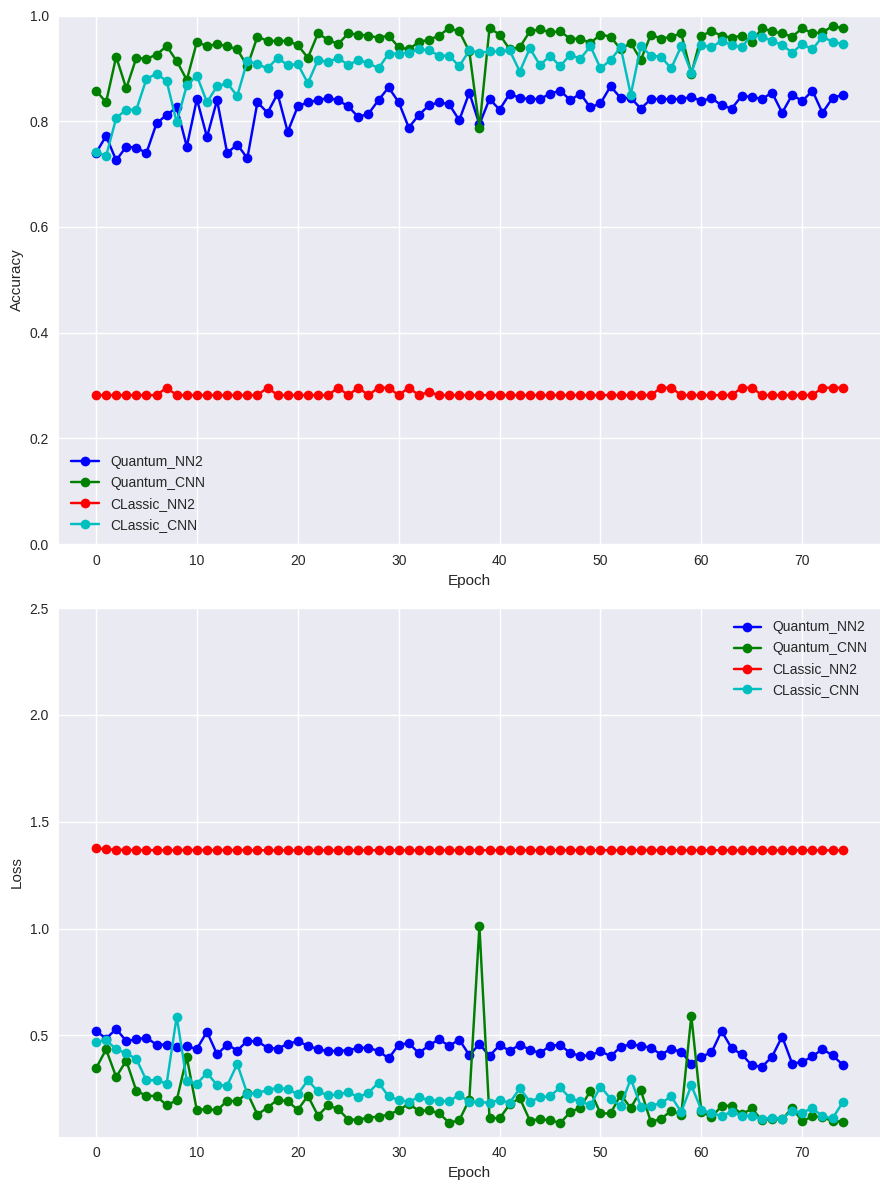

In [ ]:
NN2_CNN_history_ang_list = [q_history_NN2_ang, q_history_CNN_ang, c_history_NN2, c_history_CNN]
NN2_CNN_labels_ang = ["Quantum_NN2", "Quantum_CNN", "CLassic_NN2", "CLassic_CNN"]
plot_comparison_four_plots(NN2_CNN_history_ang_list, NN2_CNN_labels_ang)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


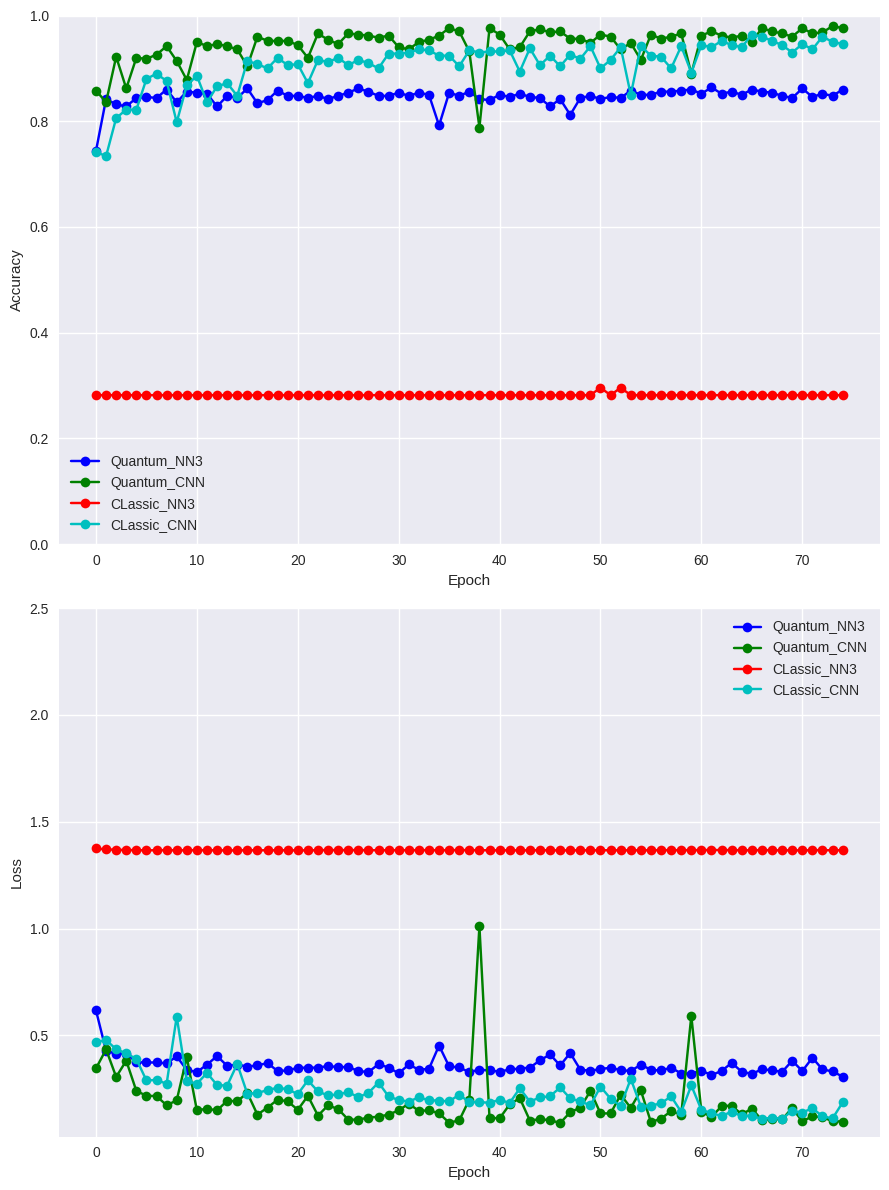

In [ ]:
NN3_CNN_history_ang_list = [q_history_NN3_ang, q_history_CNN_ang, c_history_NN3, c_history_CNN]
NN3_CNN_labels_ang = ["Quantum_NN3", "Quantum_CNN", "CLassic_NN3", "CLassic_CNN"]
plot_comparison_four_plots(NN3_CNN_history_ang_list, NN3_CNN_labels_ang)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


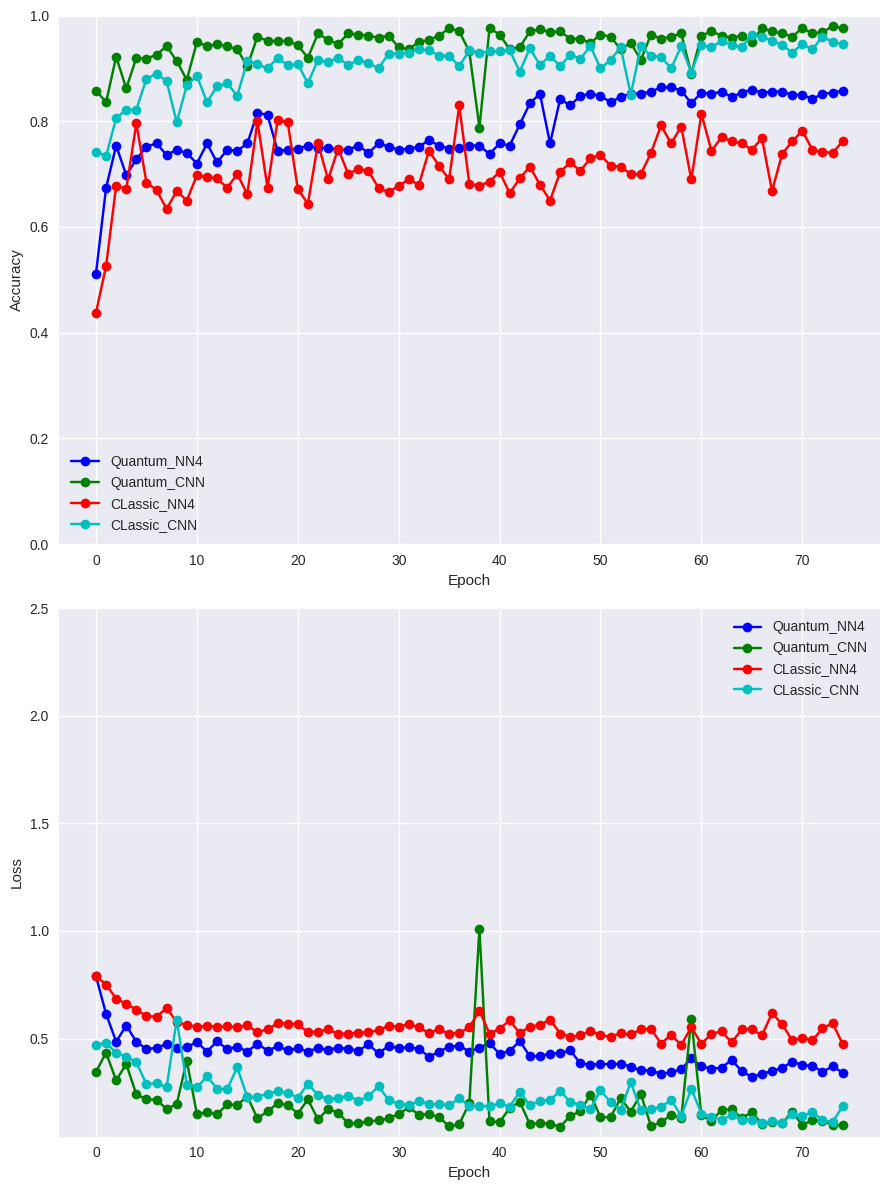

In [ ]:
NN4_CNN_history_ang_list = [q_history_NN4_ang, q_history_CNN_ang, c_history_NN4, c_history_CNN]
NN4_CNN_labels_ang = ["Quantum_NN4", "Quantum_CNN", "CLassic_NN4", "CLassic_CNN"]
plot_comparison_four_plots(NN4_CNN_history_ang_list, NN4_CNN_labels_ang)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


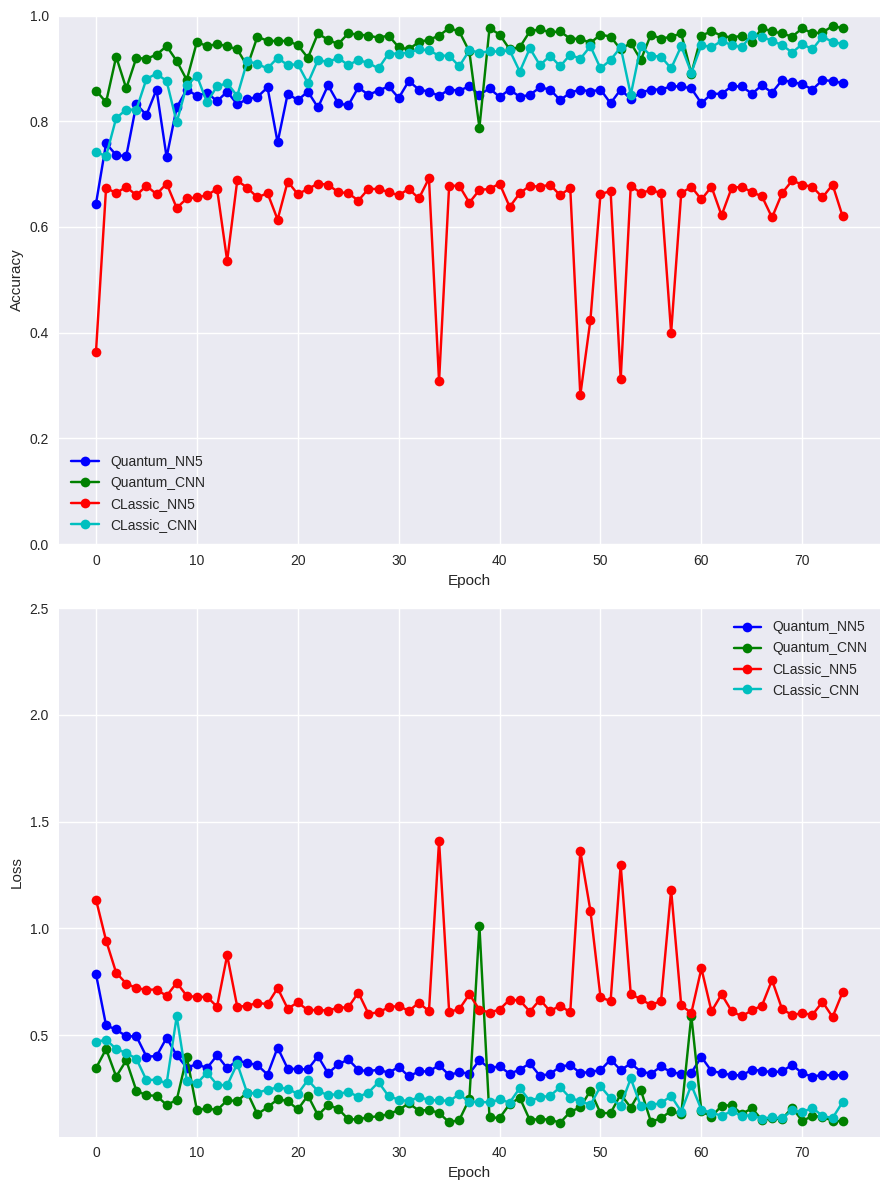

In [ ]:
NN5_CNN_history_ang_list = [q_history_NN5_ang, q_history_CNN_ang, c_history_NN5, c_history_CNN]
NN5_CNN_labels_ang = ["Quantum_NN5", "Quantum_CNN", "CLassic_NN5", "CLassic_CNN"]
plot_comparison_four_plots(NN5_CNN_history_ang_list, NN5_CNN_labels_ang)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


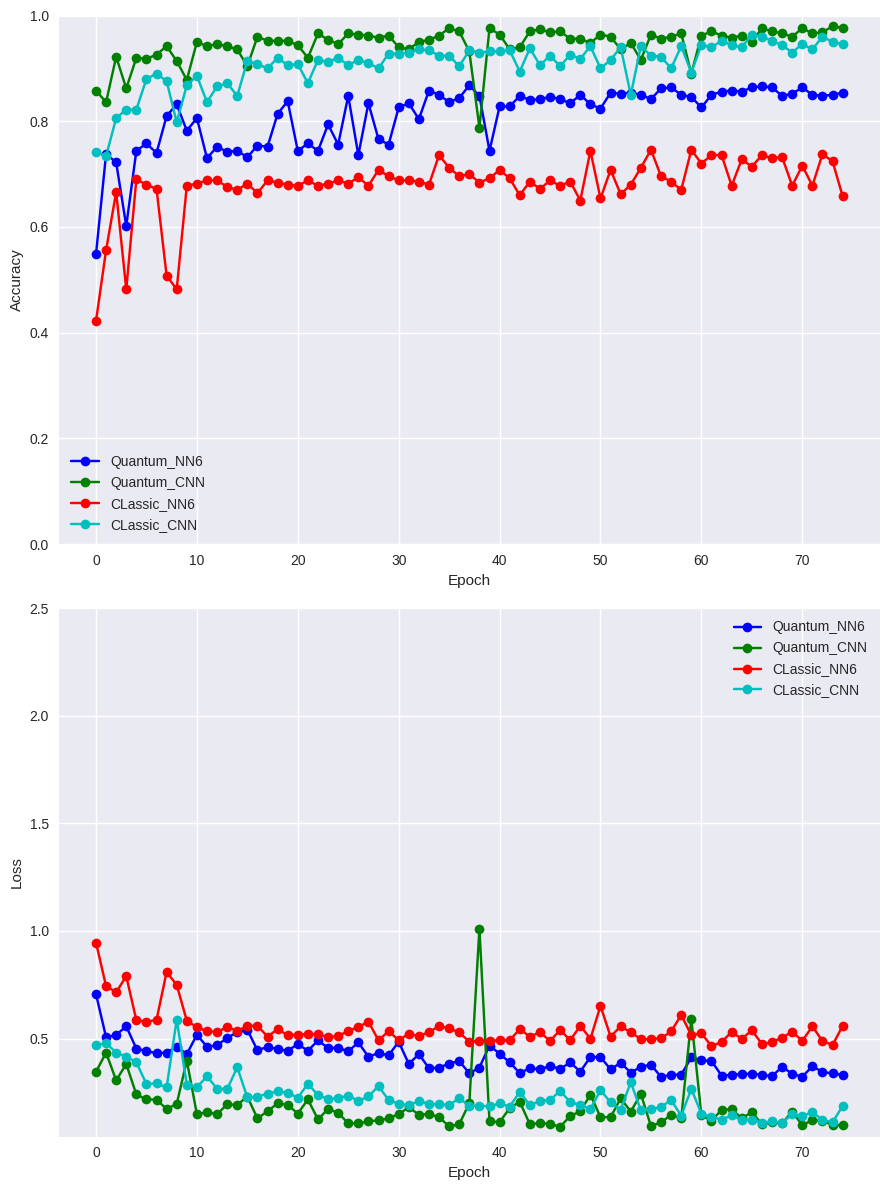

In [ ]:
NN6_CNN_history_ang_list = [q_history_NN6_ang, q_history_CNN_ang, c_history_NN6, c_history_CNN]
NN6_CNN_labels_ang = ["Quantum_NN6", "Quantum_CNN", "CLassic_NN6", "CLassic_CNN"]
plot_comparison_four_plots(NN6_CNN_history_ang_list, NN6_CNN_labels_ang)

#Graphs_amp


<ipython-input-168-052b3a70d6f4>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


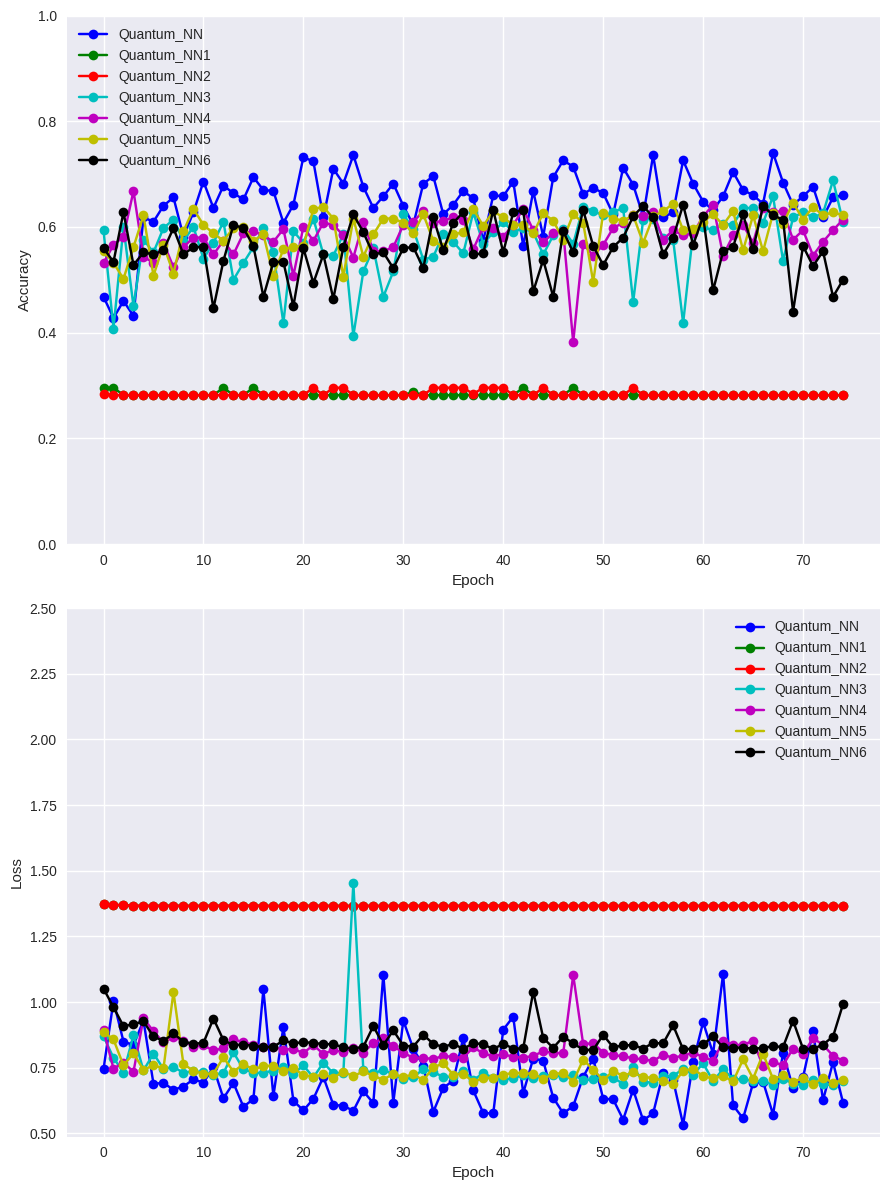

In [ ]:
Q_NN_history_amp_list = [q_history_NN_amp, q_history_NN1_amp, q_history_NN2_amp, q_history_NN3_amp, q_history_NN4_amp, q_history_NN5_amp, q_history_NN6_amp]
Q_NN_labels_amp = ["Quantum_NN", "Quantum_NN1", "Quantum_NN2", "Quantum_NN3", "Quantum_NN4", "Quantum_NN5", "Quantum_NN6"]
plot_comparison_seven_plots(Q_NN_history_amp_list, Q_NN_labels_amp)

<ipython-input-171-a8e4a9cffd47>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


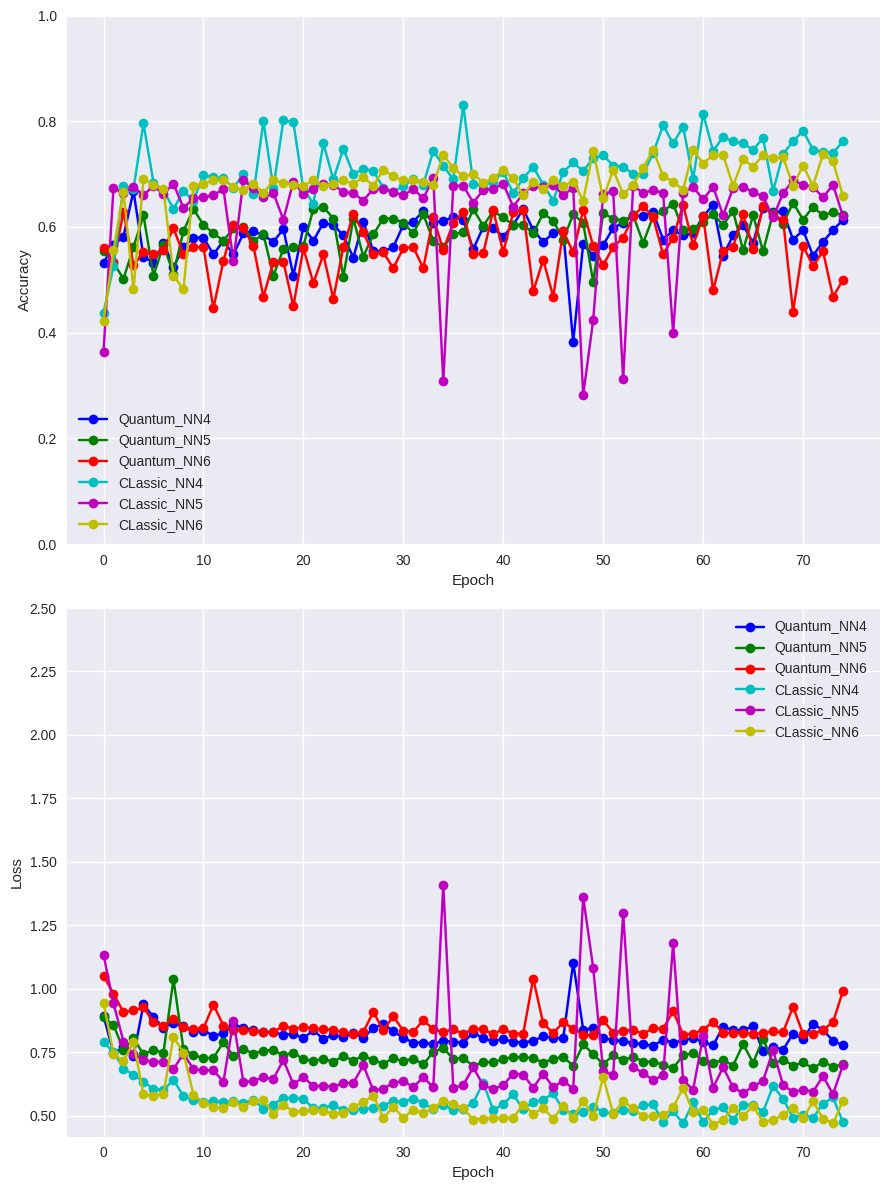

In [ ]:
NN_history_amp_list = [q_history_NN4_amp, q_history_NN5_amp, q_history_NN6_amp, c_history_NN4, c_history_NN5, c_history_NN6]
NN_labels_amp = ["Quantum_NN4", "Quantum_NN5", "Quantum_NN6", "CLassic_NN4", "CLassic_NN5", "CLassic_NN6"]
plot_comparison_six_plots(NN_history_amp_list, NN_labels_amp)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


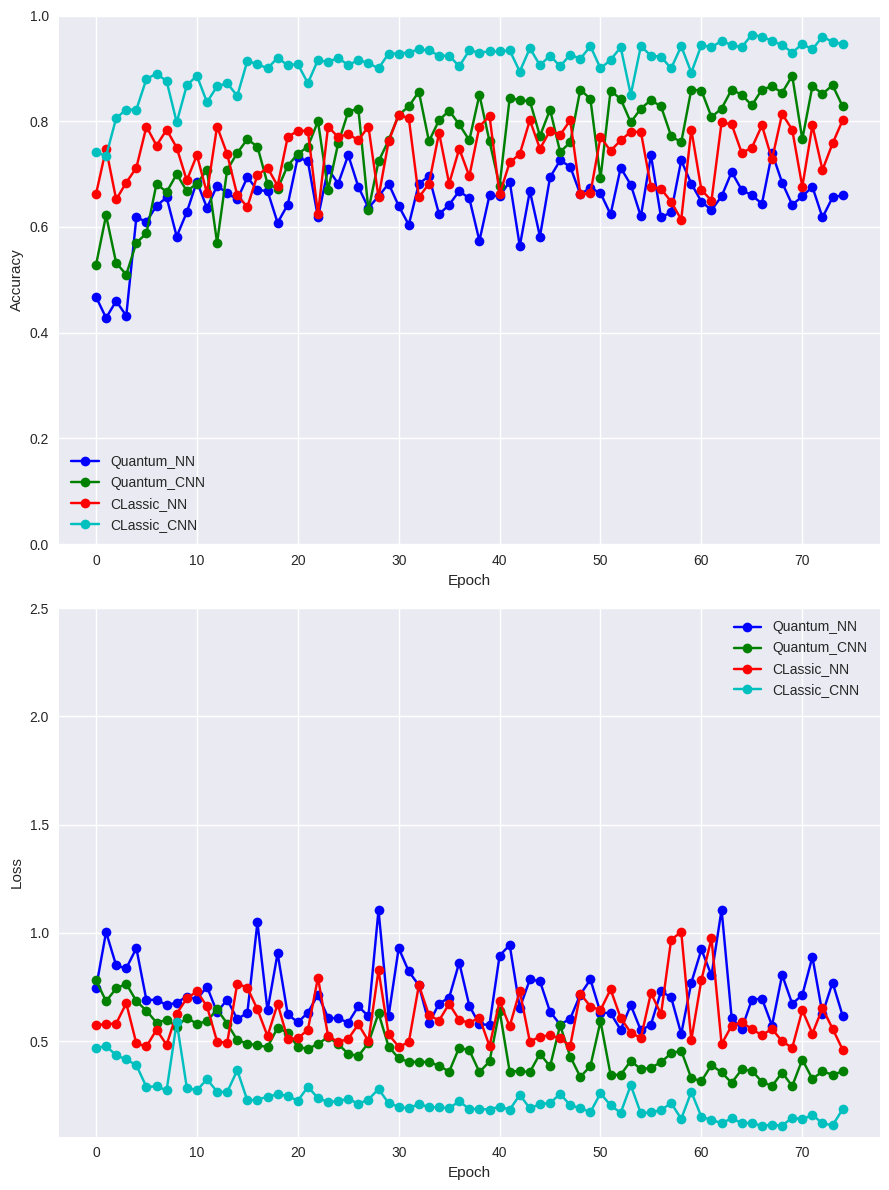

In [ ]:
NN_CNN_history_amp_list = [q_history_NN_amp, q_history_CNN_amp, c_history_NN, c_history_CNN]
NN_CNN_labels_amp = ["Quantum_NN", "Quantum_CNN", "CLassic_NN", "CLassic_CNN"]
plot_comparison_four_plots(NN_CNN_history_amp_list, NN_CNN_labels_amp)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


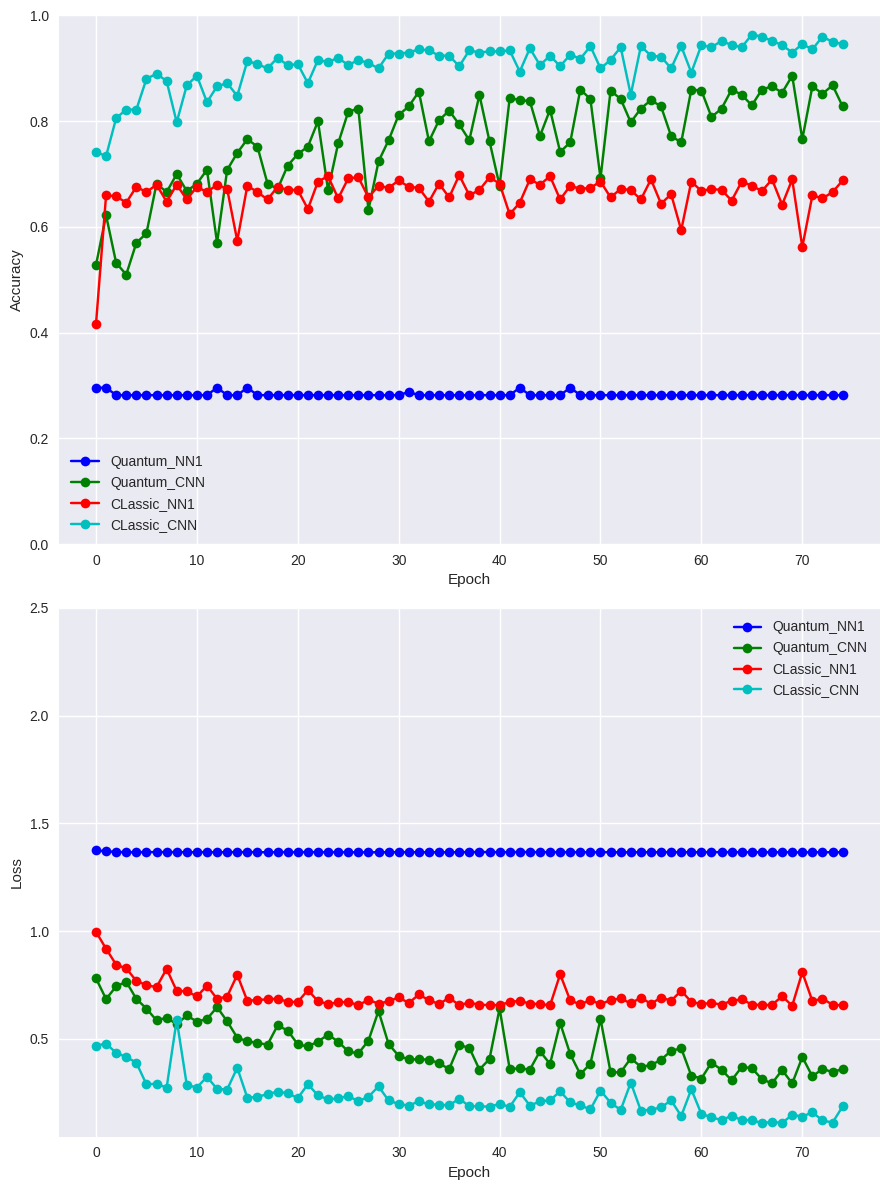

In [ ]:
NN1_CNN_history_amp_list = [q_history_NN1_amp, q_history_CNN_amp, c_history_NN1, c_history_CNN]
NN1_CNN_labels_amp = ["Quantum_NN1", "Quantum_CNN", "CLassic_NN1", "CLassic_CNN"]
plot_comparison_four_plots(NN1_CNN_history_amp_list, NN1_CNN_labels_amp)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


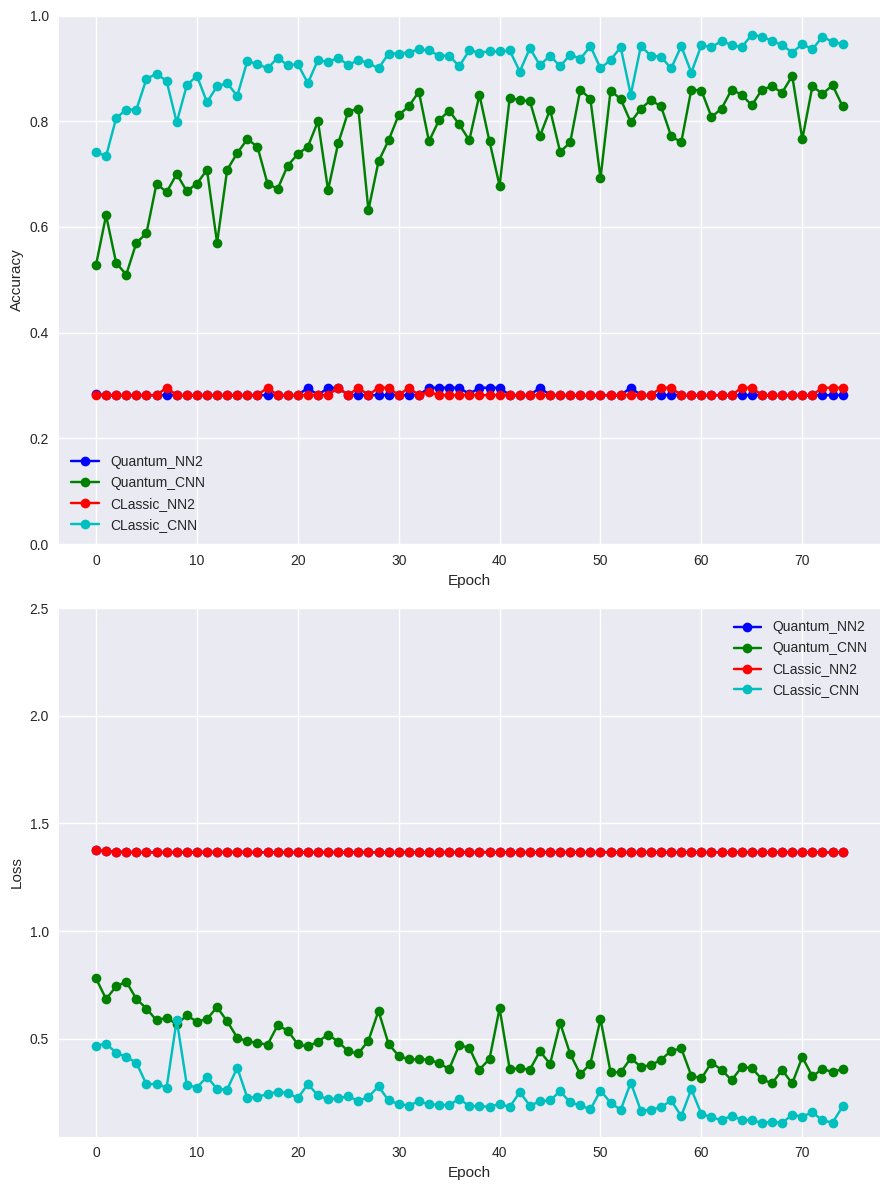

In [ ]:
NN2_CNN_history_amp_list = [q_history_NN2_amp, q_history_CNN_amp, c_history_NN2, c_history_CNN]
NN2_CNN_labels_amp = ["Quantum_NN2", "Quantum_CNN", "CLassic_NN2", "CLassic_CNN"]
plot_comparison_four_plots(NN2_CNN_history_amp_list, NN2_CNN_labels_amp)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


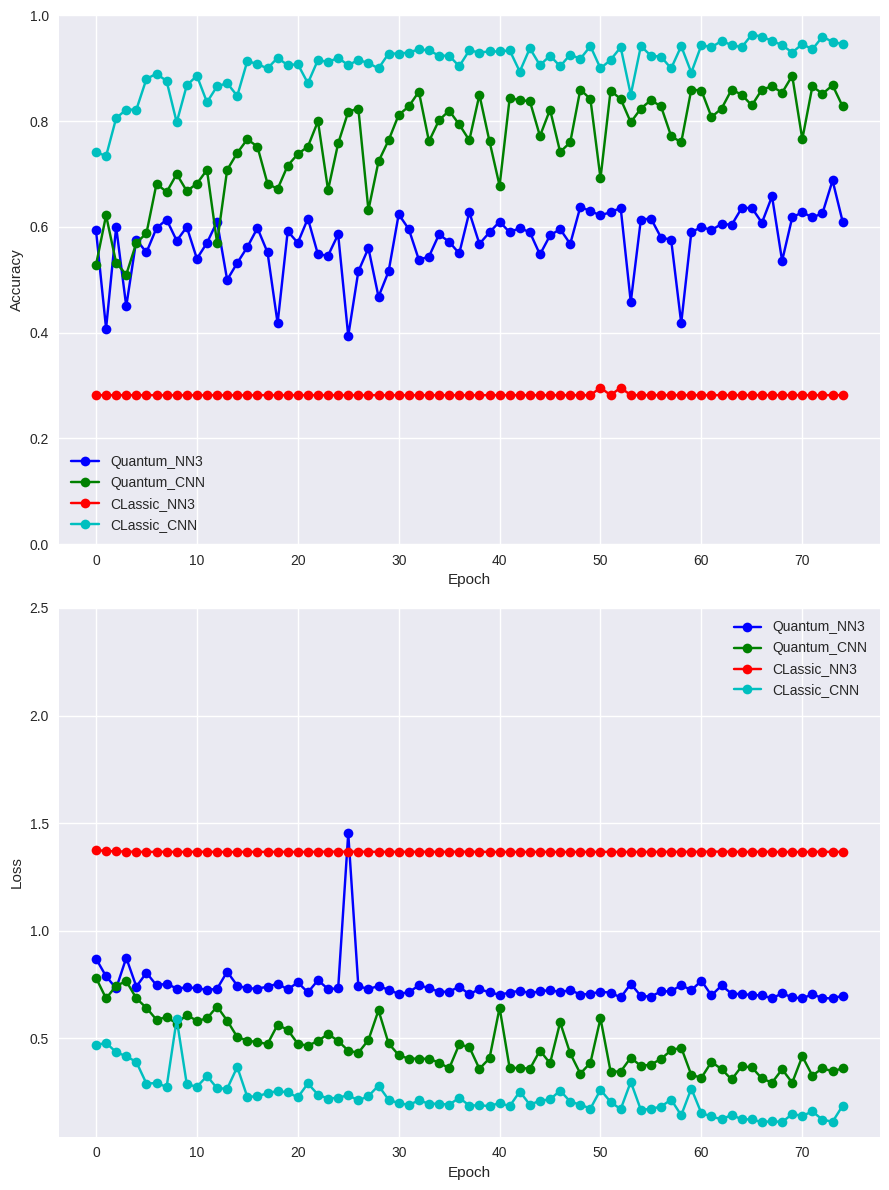

In [ ]:
NN3_CNN_history_amp_list = [q_history_NN3_amp, q_history_CNN_amp, c_history_NN3, c_history_CNN]
NN3_CNN_labels_amp = ["Quantum_NN3", "Quantum_CNN", "CLassic_NN3", "CLassic_CNN"]
plot_comparison_four_plots(NN3_CNN_history_amp_list, NN3_CNN_labels_amp)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


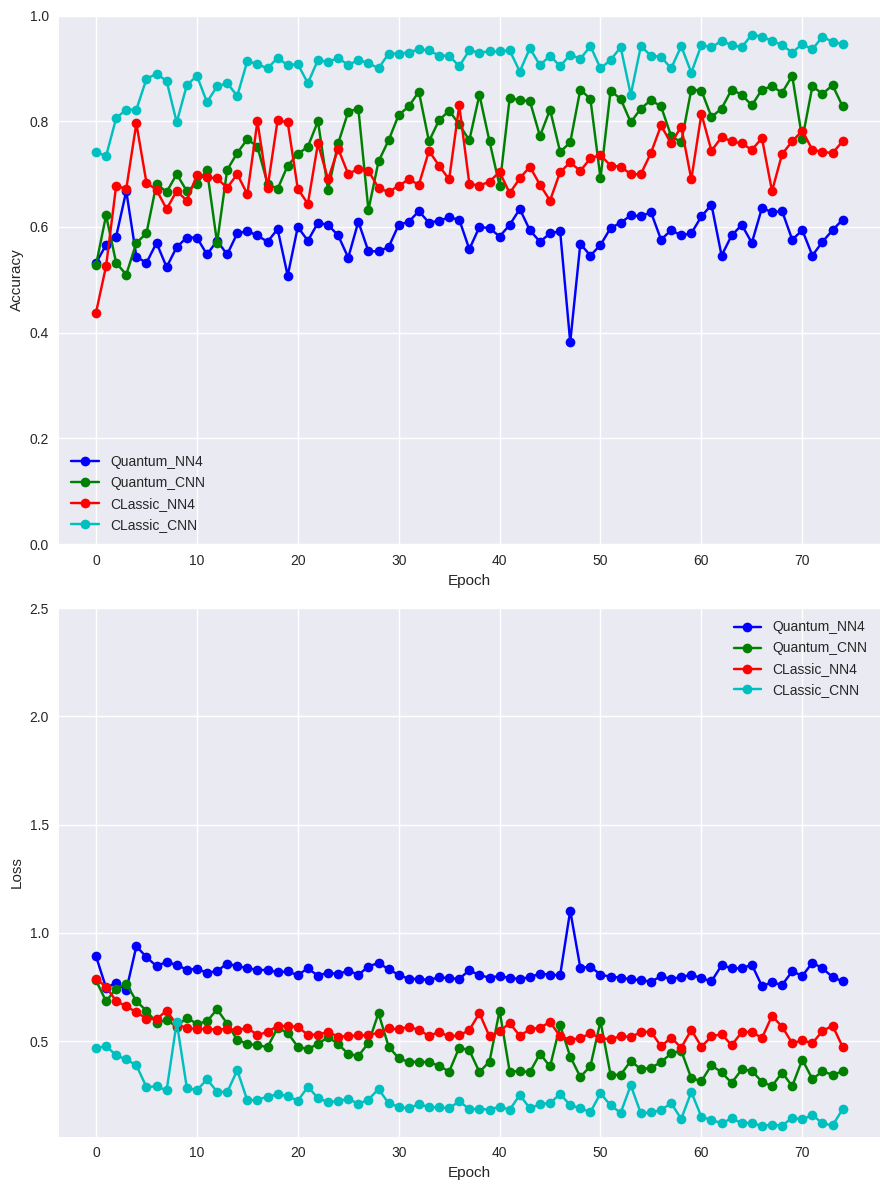

In [ ]:
NN4_CNN_history_amp_list = [q_history_NN4_amp, q_history_CNN_amp, c_history_NN4, c_history_CNN]
NN4_CNN_labels_amp = ["Quantum_NN4", "Quantum_CNN", "CLassic_NN4", "CLassic_CNN"]
plot_comparison_four_plots(NN4_CNN_history_amp_list, NN4_CNN_labels_amp)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


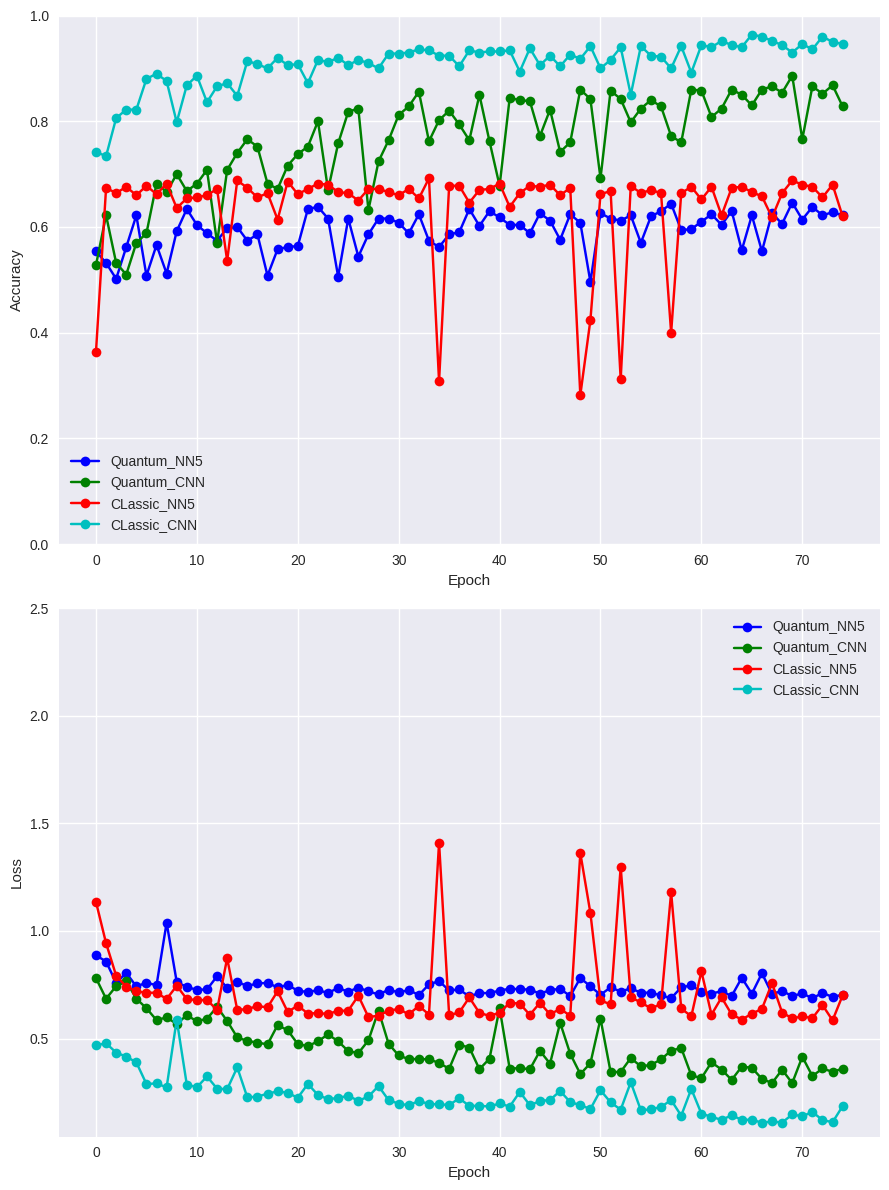

In [ ]:
NN5_CNN_history_amp_list = [q_history_NN5_amp, q_history_CNN_amp, c_history_NN5, c_history_CNN]
NN5_CNN_labels_amp = ["Quantum_NN5", "Quantum_CNN", "CLassic_NN5", "CLassic_CNN"]
plot_comparison_four_plots(NN5_CNN_history_amp_list, NN5_CNN_labels_amp)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


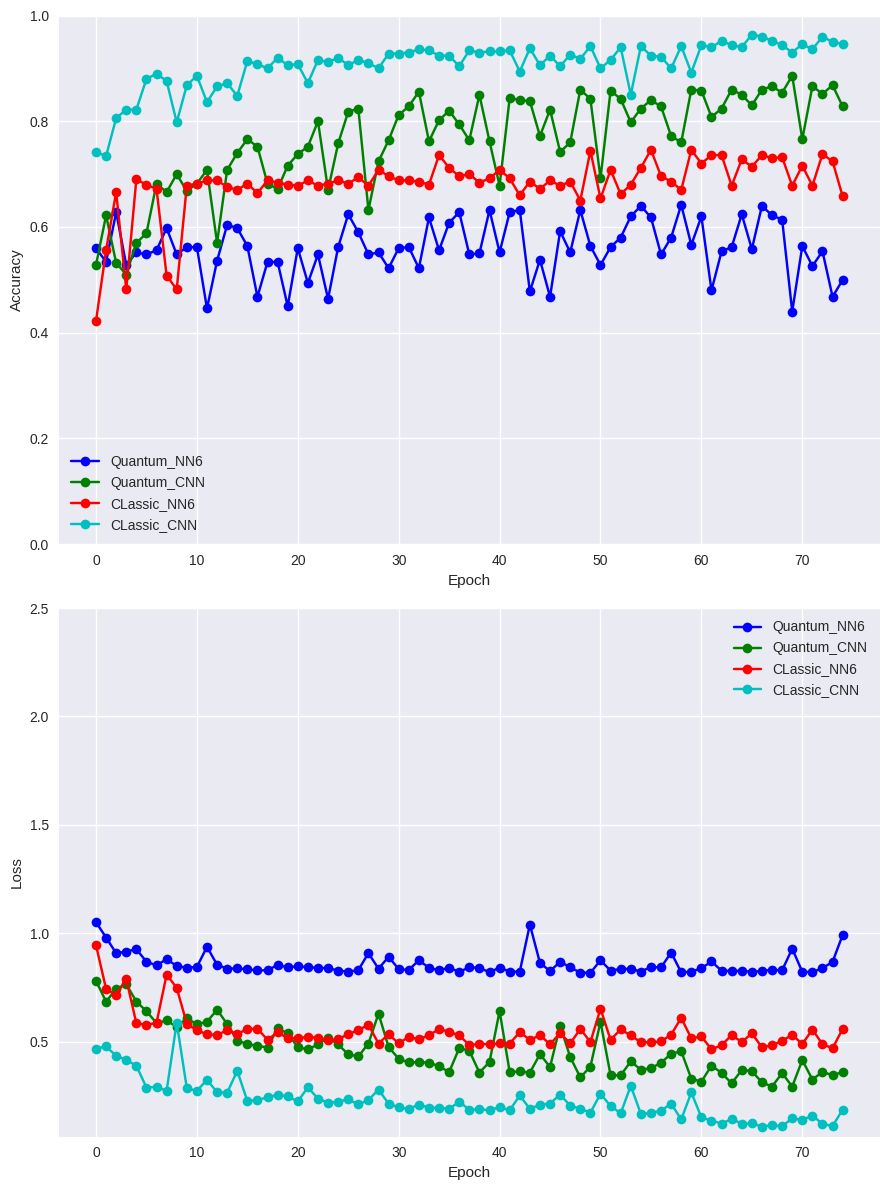

In [ ]:
NN6_CNN_history_amp_list = [q_history_NN6_amp, q_history_CNN_amp, c_history_NN6, c_history_CNN]
NN6_CNN_labels_amp = ["Quantum_NN6", "Quantum_CNN", "CLassic_NN6", "CLassic_CNN"]
plot_comparison_four_plots(NN6_CNN_history_amp_list, NN6_CNN_labels_amp)

#Graphs_basis


<ipython-input-168-052b3a70d6f4>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


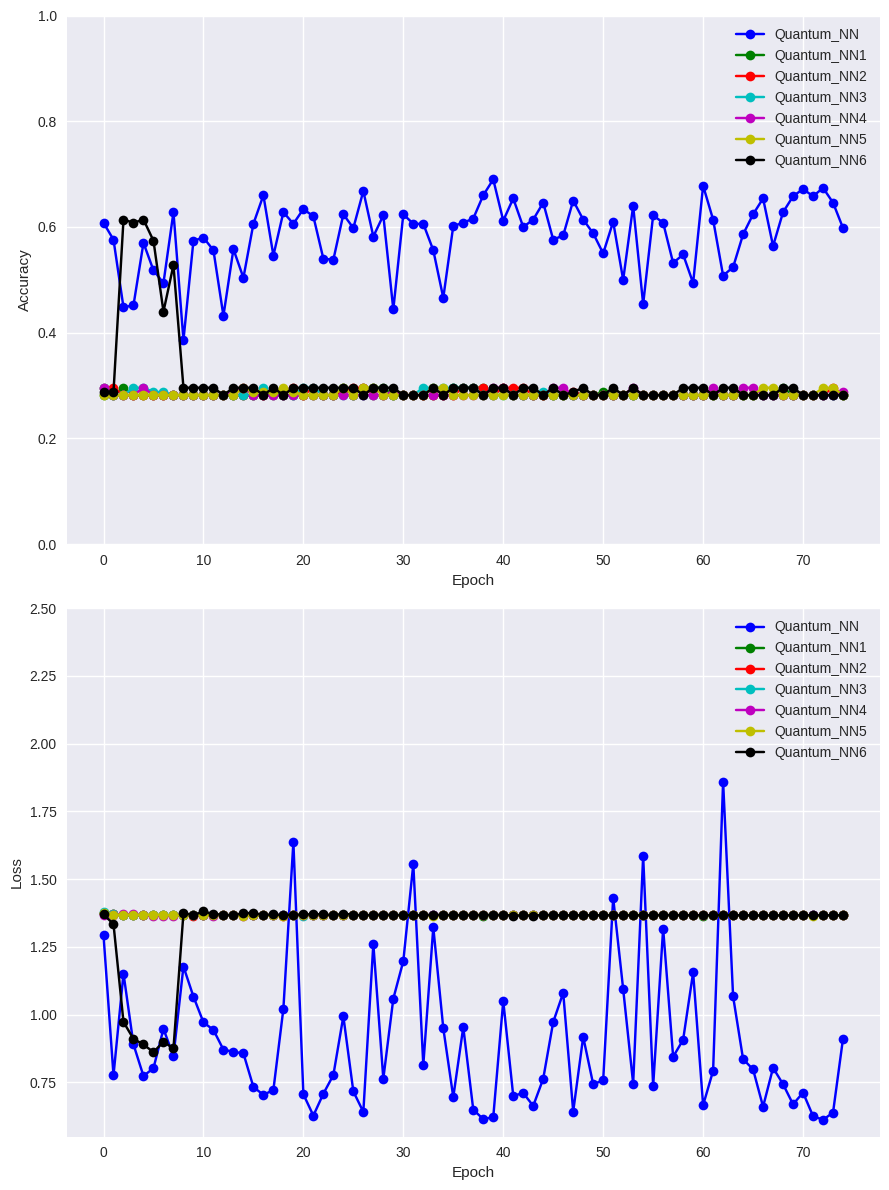

In [ ]:
Q_NN_history_basis_list = [q_history_NN_basis, q_history_NN1_basis, q_history_NN2_basis, q_history_NN3_basis, q_history_NN4_basis, q_history_NN5_basis, q_history_NN6_basis]
Q_NN_labels_basis = ["Quantum_NN", "Quantum_NN1", "Quantum_NN2", "Quantum_NN3", "Quantum_NN4", "Quantum_NN5", "Quantum_NN6"]
plot_comparison_seven_plots(Q_NN_history_basis_list, Q_NN_labels_basis)

<ipython-input-171-a8e4a9cffd47>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


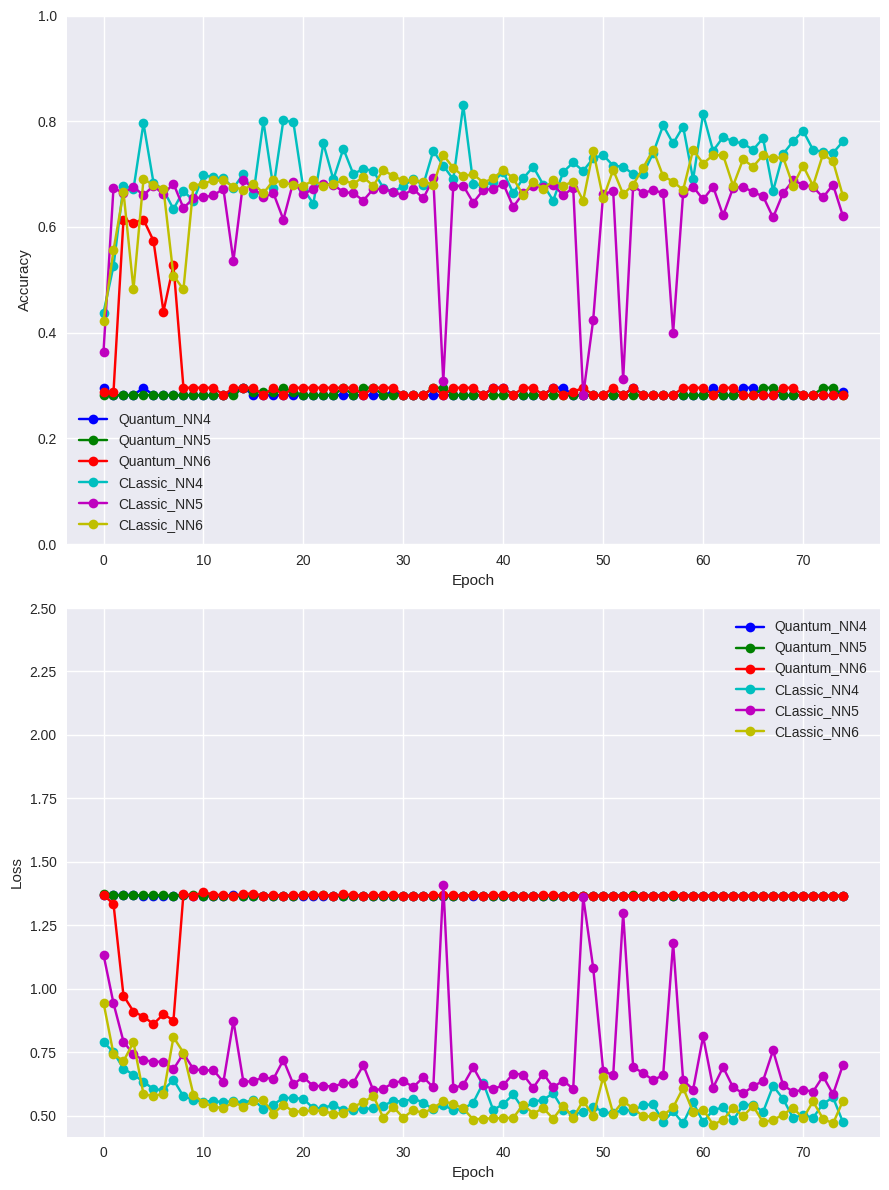

In [ ]:
NN_history_basis_list = [q_history_NN4_basis, q_history_NN5_basis, q_history_NN6_basis, c_history_NN4, c_history_NN5, c_history_NN6]
NN_labels_basis = ["Quantum_NN4", "Quantum_NN5", "Quantum_NN6", "CLassic_NN4", "CLassic_NN5", "CLassic_NN6"]
plot_comparison_six_plots(NN_history_basis_list, NN_labels_basis)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


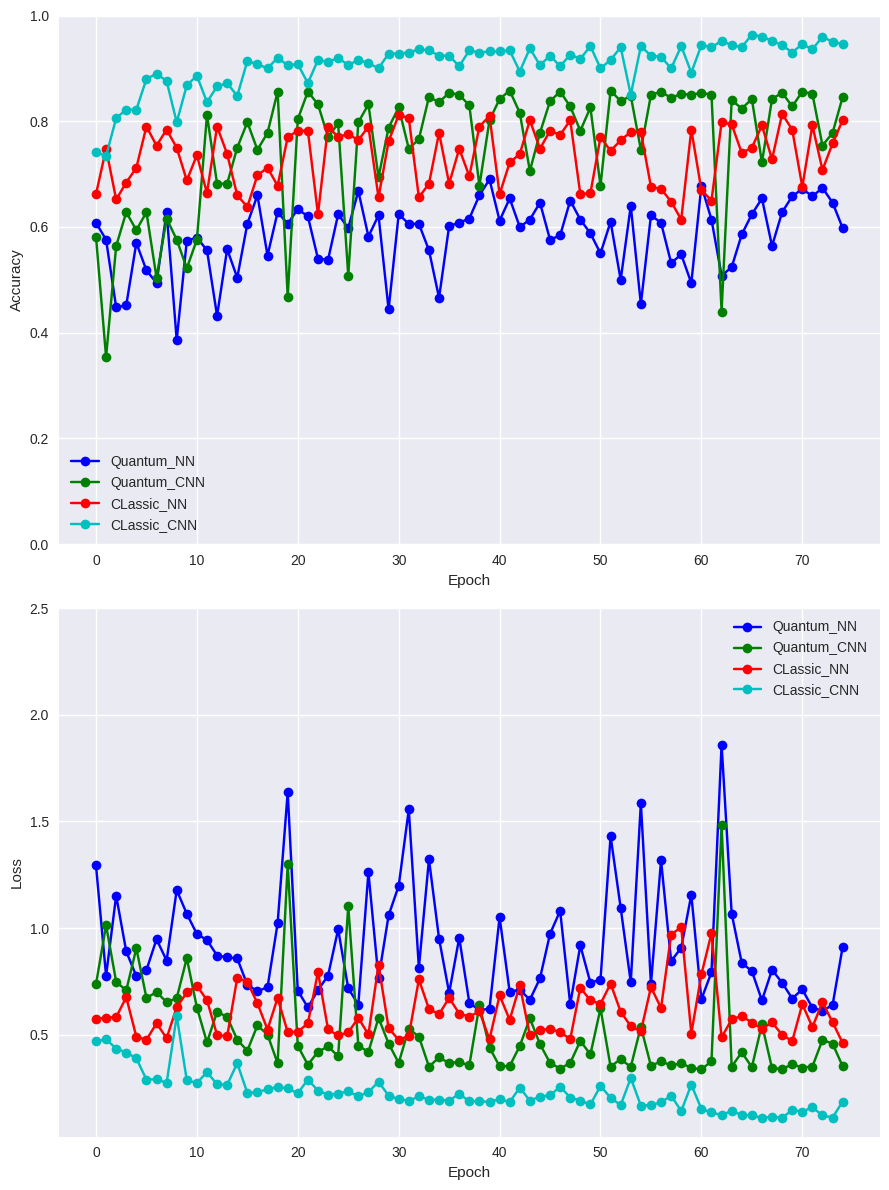

In [ ]:
NN_CNN_history_basis_list = [q_history_NN_basis, q_history_CNN_basis, c_history_NN, c_history_CNN]
NN_CNN_labels_basis = ["Quantum_NN", "Quantum_CNN", "CLassic_NN", "CLassic_CNN"]
plot_comparison_four_plots(NN_CNN_history_basis_list, NN_CNN_labels_basis)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


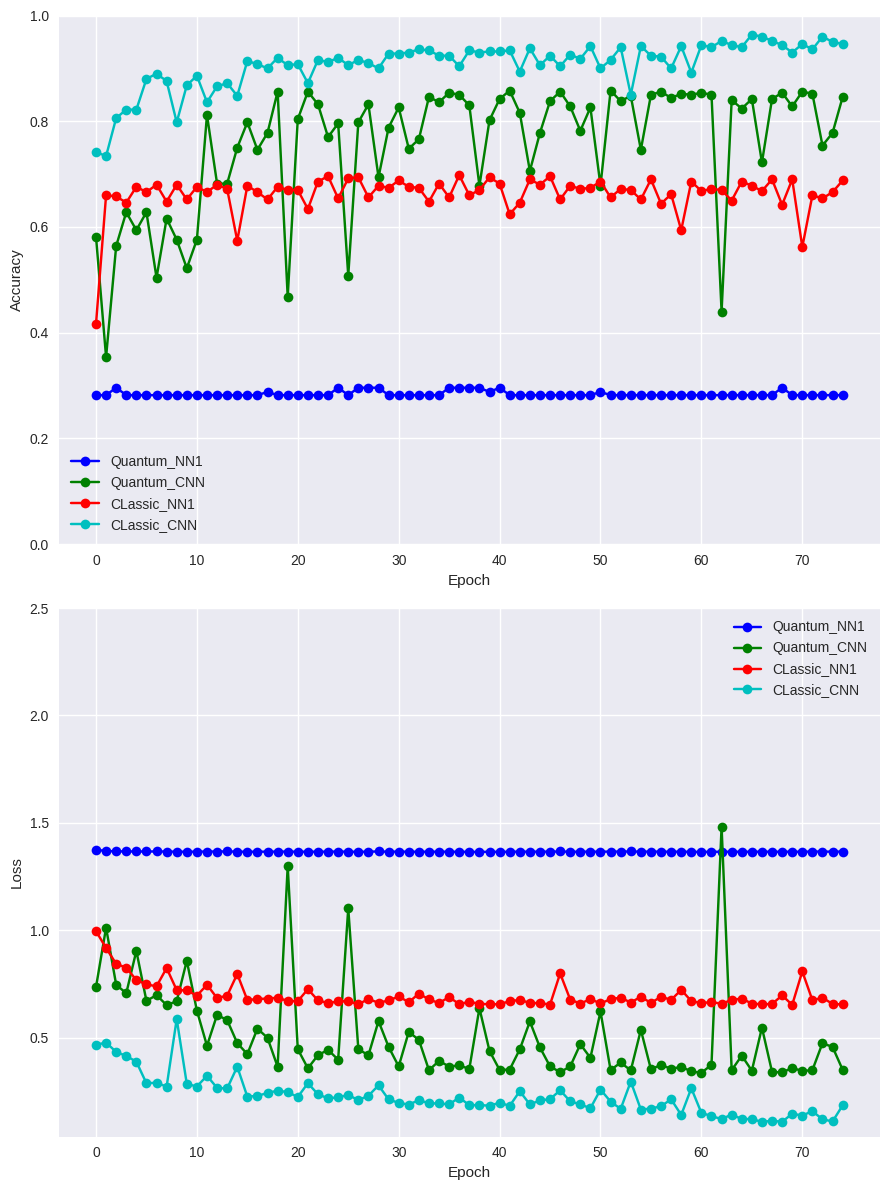

In [ ]:
NN1_CNN_history_basis_list = [q_history_NN1_basis, q_history_CNN_basis, c_history_NN1, c_history_CNN]
NN1_CNN_labels_basis = ["Quantum_NN1", "Quantum_CNN", "CLassic_NN1", "CLassic_CNN"]
plot_comparison_four_plots(NN1_CNN_history_basis_list, NN1_CNN_labels_basis)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


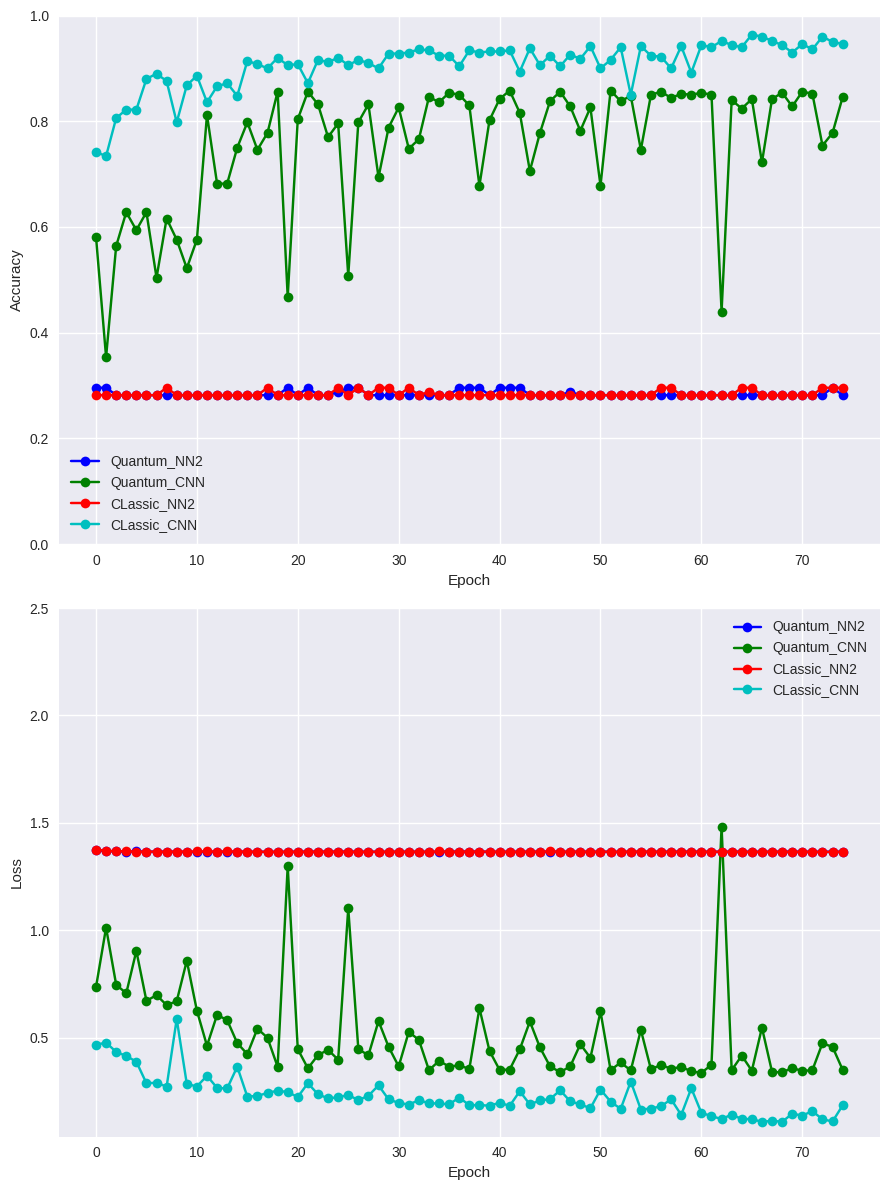

In [ ]:
NN2_CNN_history_basis_list = [q_history_NN2_basis, q_history_CNN_basis, c_history_NN2, c_history_CNN]
NN2_CNN_labels_basis = ["Quantum_NN2", "Quantum_CNN", "CLassic_NN2", "CLassic_CNN"]
plot_comparison_four_plots(NN2_CNN_history_basis_list, NN2_CNN_labels_basis)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


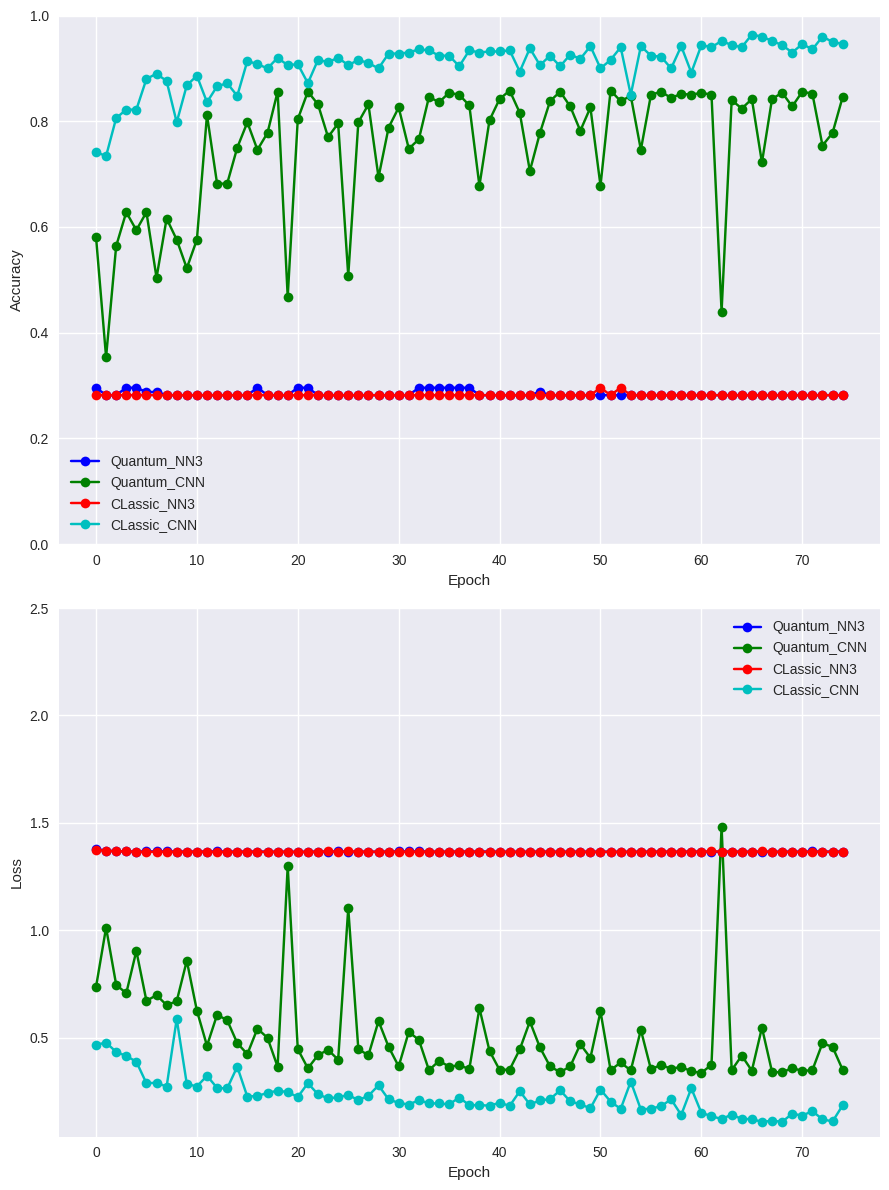

In [ ]:
NN3_CNN_history_basis_list = [q_history_NN3_basis, q_history_CNN_basis, c_history_NN3, c_history_CNN]
NN3_CNN_labels_basis = ["Quantum_NN3", "Quantum_CNN", "CLassic_NN3", "CLassic_CNN"]
plot_comparison_four_plots(NN3_CNN_history_basis_list, NN3_CNN_labels_basis)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


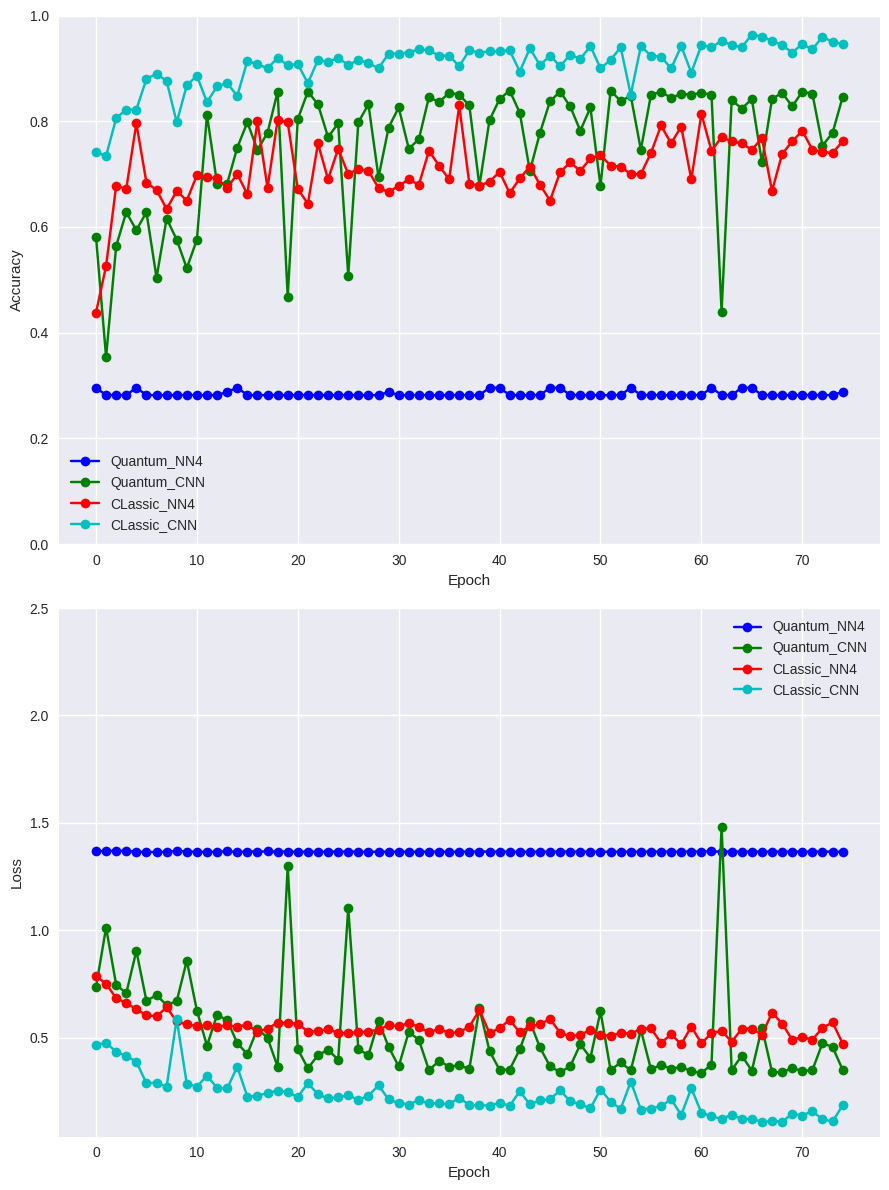

In [ ]:
NN4_CNN_history_basis_list = [q_history_NN4_basis, q_history_CNN_basis, c_history_NN4, c_history_CNN]
NN4_CNN_labels_basis = ["Quantum_NN4", "Quantum_CNN", "CLassic_NN4", "CLassic_CNN"]
plot_comparison_four_plots(NN4_CNN_history_basis_list, NN4_CNN_labels_basis)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


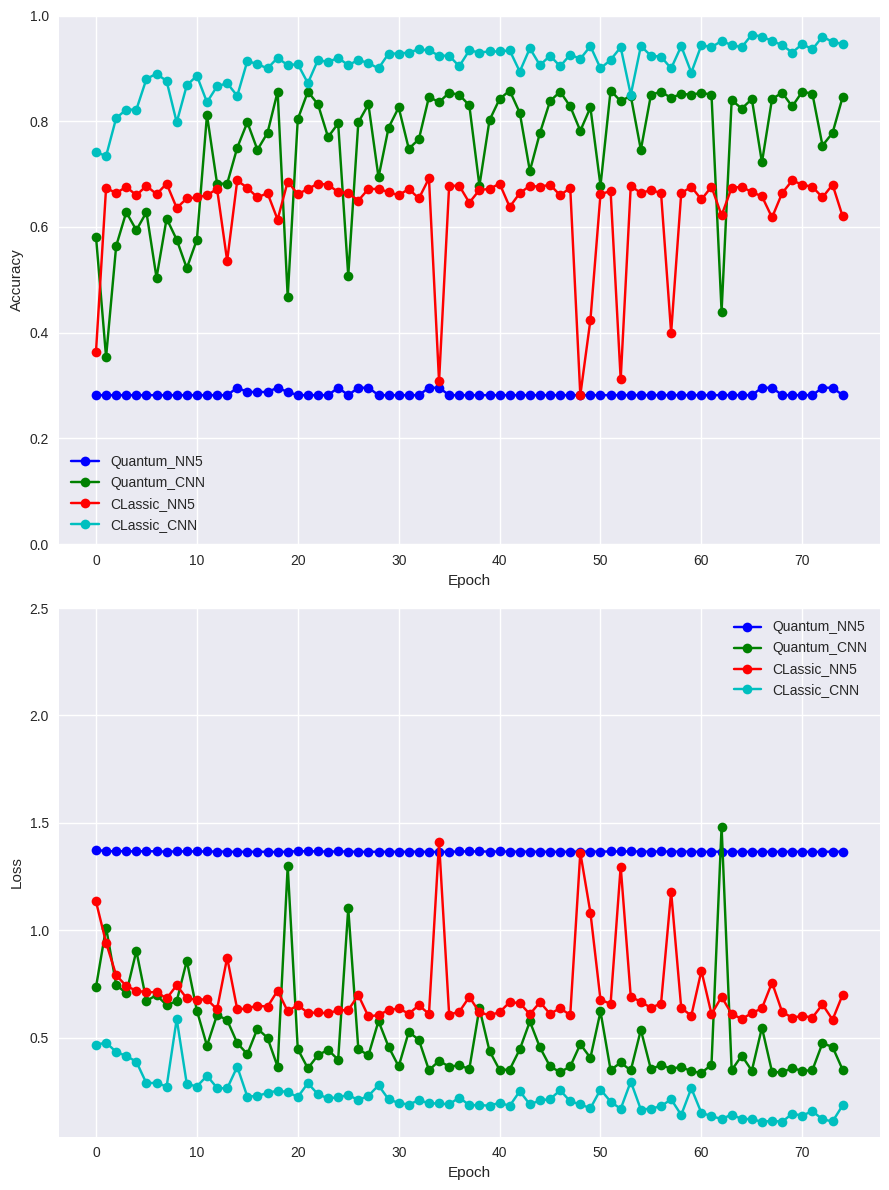

In [ ]:
NN5_CNN_history_basis_list = [q_history_NN5_basis, q_history_CNN_basis, c_history_NN5, c_history_CNN]
NN5_CNN_labels_basis = ["Quantum_NN5", "Quantum_CNN", "CLassic_NN5", "CLassic_CNN"]
plot_comparison_four_plots(NN5_CNN_history_basis_list, NN5_CNN_labels_basis)

<ipython-input-176-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


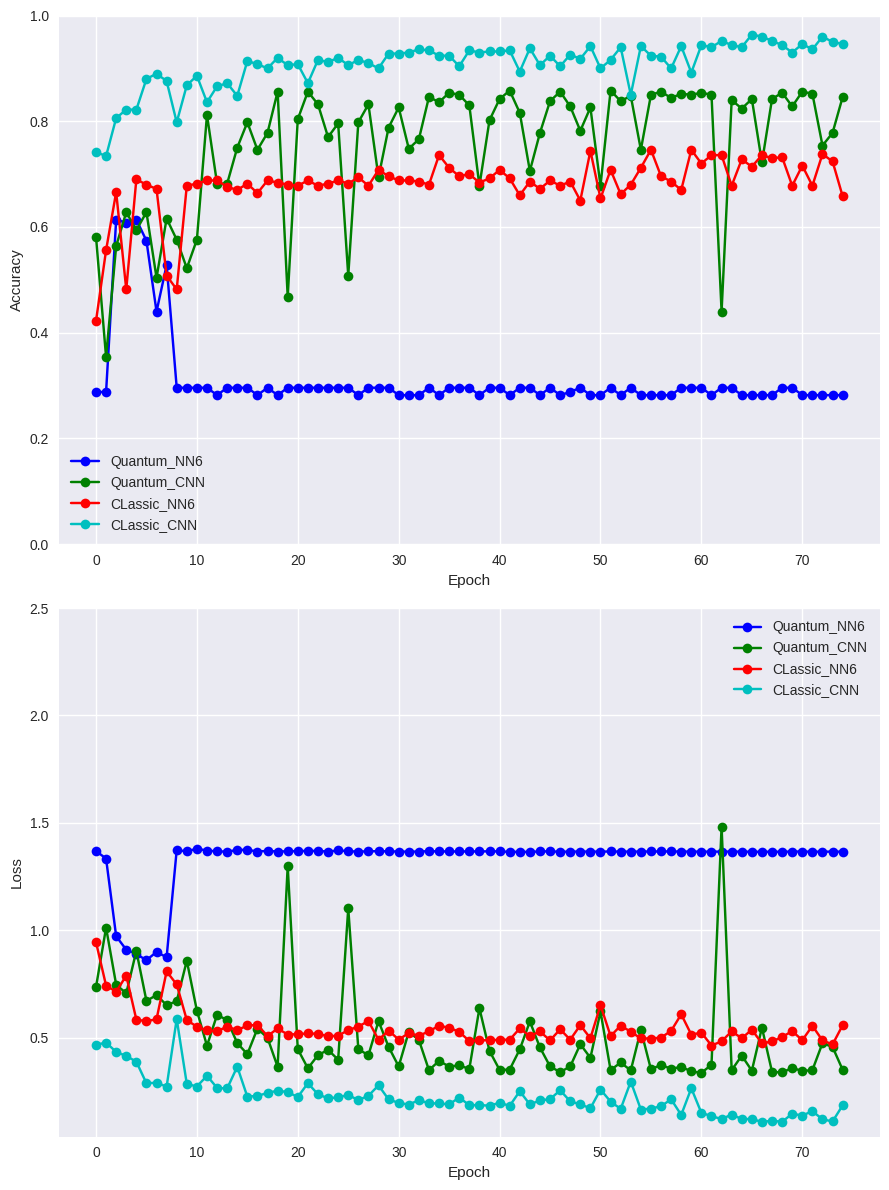

In [ ]:
NN6_CNN_history_basis_list = [q_history_NN6_basis, q_history_CNN_basis, c_history_NN6, c_history_CNN]
NN6_CNN_labels_basis = ["Quantum_NN6", "Quantum_CNN", "CLassic_NN6", "CLassic_CNN"]
plot_comparison_four_plots(NN6_CNN_history_basis_list, NN6_CNN_labels_basis)